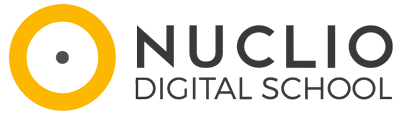

## **Proyecto Health Analytics para el estudio de la salud pública**

**DESCRIPCIÓN DEL PROYECTO**


Análisis en países desarrollados y subdesarrollados de la relación entre la esperanza de vida, las principales causas de muerte, el gasto en salud, el PIB per cápita, tasas de vacunación, niveles de pobreza, y las tasas de homicidios y suicidios en diferentes países. Este proyecto busca entender cómo los factores socioeconómicos y de salud pública influyen en la calidad y expectativa de vida a nivel global. Además, los resultados del análisis se complementarán con la implementación de un modelo simple que ayude a entender los factores de vida que impactan en la esperanza de vida de un país,  y diseñar un dashboard para la WHO con los principales resultados del análisis. 


### 1) Import libraries

In [628]:
# Manipulación y análisis de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Calcular el coeficiente de correlación Pearson (r)
# Obtener el p valor asociado
import scipy.stats as stats 

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### 2) Paths & directories

In [629]:
data_folder = 'data/'

# Formato CSV
annual_number_of_deaths_by_cause_path = data_folder + 'annual_number_of_deaths_by_cause.csv'
death_rate_from_suicides_gho_path = data_folder + 'death_rate_from_suicides_gho.csv'
gdp_per_capita_penn_world_table_path = data_folder + 'gdp_per_capita_penn_world_table.csv'
global_vaccination_coverage_path = data_folder + 'global_vaccination_coverage.csv'
homicide_rate_unodc_path = data_folder + 'homicide_rate_unodc.csv'
life_expectancy_path = data_folder + 'life_expectancy.csv'
poverty_explorer_path = data_folder + 'poverty_explorer.csv'
public_healthcare_spending_share_gdp_path = data_folder + 'public_healthcare_spending_share_gdp.csv'
composite_indices_complete_time_path = data_folder + 'HDR23-24_Composite_indices_complete_time_series.csv'

# Formato xsls
human_developement_index_path = data_folder + 'Trends in the Human Development Index, 1990-2022.xlsx'

### 3) Quick data exploration 

#### 3.1 Dataset for deaths

In [630]:
# Dataset for deaths: Datos anuales sobre el número de muertes desglosadas por causa
print("Dataset for deaths ")
df_deaths = pd.read_csv(annual_number_of_deaths_by_cause_path)
print(f'Shape of the dataset for deaths: {df_deaths.shape}')

print(f'\nNumber of countries in the data: {df_deaths["Code"].nunique()}')
print(f'Number of years available in the data: {df_deaths["Year"].nunique()}')

display(df_deaths.head())


Dataset for deaths 
Shape of the dataset for deaths: (6840, 34)

Number of countries in the data: 205
Number of years available in the data: 30


Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   Deaths - Meningitis - Sex: Both - Age: All Ages (Number)  \
0                                               2159          
1                                               2218          
2                                               2475          
3                                               2812          
4                                               3027          

   Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number)  \
0                                               1116                                       
1                                               1136                                       
2                                               1162                                       
3                                               1187                                       
4                                               1211                                       

   Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)  \
0                                                371                   
1                                                374                   
2                                                378                   
3                                                384                   
4                                                391                   

   Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number)  \
0                                               2087                        
1                                               2153                        
2                                               2441                        
3                                               2837                        
4                                               3081                        

   Deaths - Malaria - Sex: Both - Age: All Ages (Number)  \
0                                                 93       
1                                                189       
2                                                239       
3                                                108       
4                                                211       

   Deaths - Drowning - Sex: Both - Age: All Ages (Number)  \
0                                               1370        
1                                               1391        
2                                               1514        
3                                               1687        
4                                               1809        

   Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)  \
0                                               1538                      
1                                               2001                      
2                                               2299                      
3                                               2589                      
4                                               2849                      

   Deaths - Maternal disorders - Sex: Both - Age: All Ages (Number)  \
0                                               2655                  
1                                               2885                  
2                                               3315                  
3                                               3671                  
4                                               3863                  

   Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)  \
0                                                 34        
1                                                 41        
2                                                 48        
3                                                 56        
4                                                 63        

   Deaths - Drug use disorders -

#### 3.2 Dataset for suicides

In [631]:
# Dataset for suicides: Tasa de suicidios
print("Dataset for suicides ")
df_suicides = pd.read_csv(death_rate_from_suicides_gho_path)
print(f'Shape of the dataset for deaths: {df_suicides.shape}')

print(f'\nNumber of countries in the data: {df_suicides["Code"].nunique()}')
print(f'Number of years available in the data: {df_suicides["Year"].nunique()}')

display(df_suicides.head())

Dataset for suicides 
Shape of the dataset for deaths: (3880, 4)

Number of countries in the data: 184
Number of years available in the data: 20


Entity Code  Year  Age-standardized suicide rate - Sex: both sexes
0  Afghanistan  AFG  2000                                             7.71
1  Afghanistan  AFG  2001                                             7.89
2  Afghanistan  AFG  2002                                             7.85
3  Afghanistan  AFG  2003                                             7.72
4  Afghanistan  AFG  2004                                             7.77

#### 3.3 Dataset for GDP_per_capita

In [632]:
# Dataset for GDP_per_capita: PIB per cápita, a partir de la base de datos Penn World Table
print("Dataset for GDP")
df_gdp = pd.read_csv(gdp_per_capita_penn_world_table_path)
print(f'Shape of the dataset for GDP: {df_gdp.shape}')

print(f'\nNumber of countries in the data: {df_gdp["Code"].nunique()}')
print(f'Number of years available in the data: {df_gdp["Year"].nunique()}')

display(df_gdp.head())

Dataset for GDP
Shape of the dataset for GDP: (10108, 4)

Number of countries in the data: 182
Number of years available in the data: 70


Entity Code  Year  GDP per capita (output, multiple price benchmarks)
0  Albania  ALB  1971                                          3159.8088 
1  Albania  ALB  1972                                          3214.6665 
2  Albania  ALB  1973                                          3267.8481 
3  Albania  ALB  1974                                          3330.0708 
4  Albania  ALB  1975                                          3385.2730

#### 3.4 Dataset for vaccination

In [633]:
# Dataset for vaccination: global_vaccination_coverage
print("Dataset for vaccination")
df_vaccination = pd.read_csv(global_vaccination_coverage_path)
print(f'Shape of the dataset for vaccination: {df_vaccination.shape}')

print(f'\nNumber of countries in the data: {df_vaccination["Code"].nunique()}')
print(f'Number of years available in the data: {df_vaccination["Year"].nunique()}')

display(df_vaccination.head())


Dataset for vaccination
Shape of the dataset for vaccination: (7897, 14)

Number of countries in the data: 196
Number of years available in the data: 42


Entity Code  Year  BCG (% of one-year-olds immunized)  \
0  Afghanistan  AFG  1982                                10.0   
1  Afghanistan  AFG  1983                                10.0   
2  Afghanistan  AFG  1984                                11.0   
3  Afghanistan  AFG  1985                                17.0   
4  Afghanistan  AFG  1986                                18.0   

   HepB3 (% of one-year-olds immunized)  Hib3 (% of one-year-olds immunized)  \
0                                   NaN                                  NaN   
1                                   NaN                                  NaN   
2                                   NaN                                  NaN   
3                                   NaN                                  NaN   
4                                   NaN                                  NaN   

   IPV1 (% of one-year-olds immunized)  MCV1 (% of one-year-olds immunized)  \
0                                  NaN                                  8.0   
1                                  NaN                                  9.0   
2                                  NaN                                 14.0   
3                                  NaN                                 14.0   
4                                  NaN                                 14.0   

   PCV3 (% of one-year-olds immunized)  Pol3 (% of one-year-olds immunized)  \
0                                  NaN                                  5.0   
1                                  NaN                                  5.0   
2                                  NaN                                 16.0   
3                                  NaN                                 15.0   
4                                  NaN                                 11.0   

   RCV1 (% of one-year-olds immunized)  RotaC (% of one-year-olds immunized)  \
0                                  NaN                                   NaN   
1                                  NaN                                   NaN   
2                                  NaN                                   NaN   
3                                  NaN                                   NaN   
4                                  NaN                                   NaN   

   YFV (% of one-year-olds immunized)  DTP3 (% of one-year-olds immunized)  
0                                 NaN                                  5.0  
1                                 NaN                                  5.0  
2                                 NaN                                 16.0  
3                                 NaN                                 15.0  
4                                 NaN                                 11.0

#### 3.5 Dataset for homicides

In [634]:
# Dataset for homicides: homicide_rate_unodc
print("Dataset for homicides")
df_homicides = pd.read_csv(homicide_rate_unodc_path)
print(f'Shape of the dataset for homicides: {df_homicides.shape}')

print(f'\nNumber of countries in the data: {df_homicides["Code"].nunique()}')
print(f'Number of years available in the data: {df_homicides["Year"].nunique()}')

display(df_homicides.head())

Dataset for homicides
Shape of the dataset for homicides: (4204, 4)

Number of countries in the data: 201
Number of years available in the data: 32


Entity Code  Year  \
0  Afghanistan  AFG  2009   
1  Afghanistan  AFG  2010   
2  Afghanistan  AFG  2011   
3  Afghanistan  AFG  2012   
4  Afghanistan  AFG  2015   

   Homicide rate per 100,000 population - Both sexes - All ages  
0                                           4.071527             
1                                           3.487093             
2                                           4.208668             
3                                           6.393913             
4                                           9.975262

#### 3.6 Dataset for life_expectancy

In [635]:
# Dataset for life_expectancy: life_expectancy
print("Dataset for life expectancies")
df_life_expec = pd.read_csv(life_expectancy_path)
print(f'Shape of the dataset for life expectancies: {df_life_expec.shape}')

#print(f'\nNumber of countries in the data: {df_life_expec["Code"].nunique()}')
#print(f'Number of years available in the data: {df_life_expec["Year"].nunique()}')

display(df_life_expec.head())

Dataset for life expectancies
Shape of the dataset for life expectancies: (20755, 4)


Entity Code  Year  Period life expectancy at birth - Sex: all - Age: 0
0  Afghanistan  AFG  1950                                            27.7275  
1  Afghanistan  AFG  1951                                            27.9634  
2  Afghanistan  AFG  1952                                            28.4456  
3  Afghanistan  AFG  1953                                            28.9304  
4  Afghanistan  AFG  1954                                            29.2258

#### 3.7 Dataset for poverty

In [636]:
# Dataset for poverty: Datos sobre pobreza
print("Dataset for poverty")
df_poverty = pd.read_csv(poverty_explorer_path)
print(f'Shape of the dataset for poverty: {df_poverty.shape}')

print(f'\nNumber of countries in the data: {df_poverty["Country"].nunique()}')
print(f'Number of years available in the data: {df_poverty["Year"].nunique()}')


display(df_poverty.head())

Dataset for poverty
Shape of the dataset for poverty: (2602, 109)

Number of countries in the data: 192
Number of years available in the data: 60


Country  Year  Share below $1 a day  Share below $2.15 a day  \
0  Albania  1996              0.057416                 0.534846   
1  Albania  2002              0.046371                 1.092647   
2  Albania  2005              0.000000                 0.591086   
3  Albania  2008              0.000000                 0.199925   
4  Albania  2012              0.024101                 0.620691   

   Share below $3.65 a day  Share below $6.85 a day  Share below $10 a day  \
0                 8.898443                47.879143              75.623880   
1                11.388324                52.090965              76.705050   
2                 7.289305                40.428430              68.453090   
3                 3.902613                33.431850              62.768870   
4                 4.805442                36.667750              65.062386   

   Share below $20 a day  Share below $30 a day  Share below $40 a day  \
0              98.702095               99.89742              99.951650   
1              96.528860               98.94813              99.762024   
2              95.405670               98.85736              99.546940   
3              94.582830               98.50923              99.344450   
4              95.520160               99.07353              99.742485   

   Number below $1 a day  Number below $2.15 a day  Number below $3.65 a day  \
0                   1819                     16944                    281906   
1                   1415                     33337                    347459   
2                      0                     17800                    219516   
3                      0                      5892                    115022   
4                    699                     18003                    139377   

   Number below $6.85 a day  Number below $10 a day  Number below $20 a day  \
0                   1516827                 2395790                 3126915   
1                   1589301                 2340279                 2945105   
2                   1217497                 2061456                 2873129   
3                    985342                 1849996                 2787653   
4                   1063512                 1887070                 2770468   

   Number below $30 a day  Number below $40 a day  \
0                 3164783                 3166501   
1                 3018917                 3043749   
2                 2977077                 2997843   
3                 2903376                 2927993   
4                 2873530                 2892932   

   40% of median - share of population below poverty line  \
0                                           2.768821        
1                                           3.212283        
2                                           4.095002        
3                                           2.118535        
4                                           3.510522        

   50% of median - share of population below poverty line  \
0                                           7.548123        
1                                           8.406373        
2                                           8.991532        
3                                           7.227715        
4                                           7.753112        

   60% of median - share of population below poverty line  \
0                                          14.802514        
1                                          16.020554        
2                                          16.675770        
3                                          14.137155        
4                                          14.795234        

   40% of median - total number of people below poverty line  \
0                                              87717           
1                                              98007           
2                                             123320           
3                                              62440  

#### 3.8 Dataset for public healthcare spending

In [637]:
# Dataset for public healthcare spending: Porcentaje del PIB destinado al gasto en sanidad pública
print("Dataset for public healthcare spending")
df_public_health_spend = pd.read_csv(public_healthcare_spending_share_gdp_path)
print(f'Shape of the dataset for poverty: {df_public_health_spend.shape}')

print(f'\nNumber of countries in the data: {df_public_health_spend["Code"].nunique()}')
print(f'Number of years available in the data: {df_public_health_spend["Year"].nunique()}')


display(df_public_health_spend.head())

Dataset for public healthcare spending
Shape of the dataset for poverty: (4014, 4)

Number of countries in the data: 191
Number of years available in the data: 20


Entity Code  Year  \
0  Afghanistan  AFG  2002   
1  Afghanistan  AFG  2003   
2  Afghanistan  AFG  2004   
3  Afghanistan  AFG  2005   
4  Afghanistan  AFG  2006   

   Domestic general government health expenditure (% of GDP)  
0                                           0.084181          
1                                           0.650963          
2                                           0.542926          
3                                           0.529184          
4                                           0.497840

#### 3.9 Dataset for Composite indices complete time

In [638]:
# Dataset for IDH: Todos los índices compuestos y componentes de series temporales (1990-2022)
print("Dataset for Composite indices complete time")
df_composite_indices_complete_time = pd.read_csv(composite_indices_complete_time_path, encoding='latin-1')
print(f'Shape of the dataset for deaths: {df_composite_indices_complete_time.shape}')

print(f'\nNumber of countries in the data: {df_composite_indices_complete_time["country"].nunique()}')

display(df_composite_indices_complete_time.head())

Dataset for Composite indices complete time
Shape of the dataset for deaths: (206, 1076)

Number of countries in the data: 206


iso3      country    hdicode region  hdi_rank_2022  hdi_1990  hdi_1991  \
0  AFG  Afghanistan        Low     SA          182.0     0.284     0.292   
1  ALB      Albania       High    ECA           74.0     0.649     0.632   
2  DZA      Algeria       High     AS           93.0     0.593     0.596   
3  AND      Andorra  Very High    NaN           35.0       NaN       NaN   
4  AGO       Angola     Medium    SSA          150.0       NaN       NaN   

   hdi_1992  hdi_1993  hdi_1994  hdi_1995  hdi_1996  hdi_1997  hdi_1998  \
0     0.299     0.307     0.300     0.318     0.326     0.330     0.329   
1     0.616     0.618     0.623     0.632     0.644     0.641     0.656   
2     0.601     0.602     0.603     0.607     0.618     0.626     0.635   
3       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

   hdi_1999  hdi_2000  hdi_2001  hdi_2002  hdi_2003  hdi_2004  hdi_2005  \
0     0.337     0.340     0.344     0.368     0.379     0.395     0.402   
1     0.668     0.678     0.687     0.692     0.701     0.707     0.720   
2     0.644     0.652     0.659     0.668     0.675     0.683     0.690   
3       NaN     0.815     0.823     0.828     0.836     0.828     0.828   
4     0.369     0.380     0.390     0.406     0.424     0.437     0.451   

   hdi_2006  hdi_2007  hdi_2008  hdi_2009  hdi_2010  hdi_2011  hdi_2012  \
0     0.410     0.426     0.431     0.441     0.449     0.457     0.467   
1     0.728     0.740     0.747     0.752     0.766     0.779     0.789   
2     0.696     0.701     0.709     0.716     0.721     0.725     0.726   
3     0.842     0.851     0.857     0.859     0.863     0.867     0.867   
4     0.463     0.480     0.492     0.506     0.516     0.533     0.545   

   hdi_2013  hdi_2014  hdi_2015  hdi_2016  hdi_2017  hdi_2018  hdi_2019  \
0     0.475     0.480     0.479     0.483     0.485     0.486     0.492   
1     0.793     0.797     0.797     0.795     0.796     0.797     0.800   
2     0.729     0.732     0.736     0.738     0.738     0.740     0.742   
3     0.851     0.854     0.856     0.859     0.860     0.863     0.865   
4     0.555     0.565     0.591     0.595     0.597     0.598     0.597   

   hdi_2020  hdi_2021  hdi_2022  le_1990  le_1991  le_1992  le_1993  le_1994  \
0     0.488     0.473     0.462   45.967   46.663   47.596   51.466   51.495   
1     0.784     0.785     0.789   73.144   73.378   73.715   73.939   74.131   
2     0.730     0.740     0.745   67.416   67.688   67.757   67.719   67.361   
3     0.843     0.855     0.884   78.406   77.981   80.324   78.663   82.638   
4     0.594     0.590     0.591   41.893   43.813   42.209   42.101   43.422   

   le_1995  le_1996  le_1997  le_1998  le_1999  le_2000  le_2001  le_2002  \
0   52.544   53.243   53.634   52.943   54.846   55.298   55.798   56.454   
1   74.362   74.592   73.904   74.990   75.183   75.404   75.639   75.890   
2   67.454   68.749   69.171   69.451   70.032   70.478   70.823   71.230   
3   78.962   80.334   80.944   79.426   81.317   80.919   81.686   82.237   
4   45.849   46.033   46.306   45.057   45.386   46.024   46.590   47.386   

   le_2003  le_2004  le_2005  le_2006  le_2007  le_2008  le_2009  le_2010  \
0   57.344   57.944   58.361   58.684   59.111   59.852   60.364   60.851   
1   76.142   76.376   76.621   76.816   77.549   77.653   77.781   77.936   
2   71.287   71.762   72.061   72.334   72.602   72.941   73.620   73.808   
3   83.921   80.084   81.760   82.966   82.659   82.698   82.752   82.816   
4   49.617   50.592   51.570   52.369   53.642   54.633   55.752   56.726   

   le_2011  le_2012  le_2013  le_2014  le_2015  le_2016  le_2017  le_2018  \
0   61.419   61.923   62.417   62.545   62.659   63.136   63.016   63.081   
1   78.092   78.064   78.123   78.407   78.644   78.860   79.047   79.184   
2   74.123   74.202   74.615   75.110   75.622   75.732   75.743   76.066   
3   82.897   82.917   82.9

#### 3.10 Dataset for human developement index

In [639]:
# Dataset for deaths: Datos anuales sobre el número de muertes desglosadas por causa
print("Dataset for human developement index")
df_human_developement_index = pd.read_excel(human_developement_index_path)
print(f'Shape of the dataset for deaths: {df_human_developement_index.shape}')

print(f'\nNumber of countries in the data: {df_human_developement_index["Country"].nunique()}')

display(df_human_developement_index.head())

Dataset for human developement index
Shape of the dataset for deaths: (193, 15)

Number of countries in the data: 193


HDI rank                 Country HDI Value 1990 HDI Value 2000  \
0         1             Switzerland           0.85          0.885   
1         2                  Norway          0.845          0.914   
2         3                 Iceland          0.834          0.895   
3         4  Hong Kong, China (SAR)          0.739          0.831   
4         5                 Denmark          0.839           0.89   

  HDI Value 2010 HDI Value 2015 HDI Value 2019 HDI Value 2020 HDI Value 2021  \
0           0.94          0.952           0.96          0.957          0.965   
1          0.938          0.952          0.961          0.963          0.964   
2          0.927          0.948          0.958          0.955          0.957   
3          0.914          0.936          0.953          0.955          0.959   
4          0.913          0.936          0.946          0.946          0.947   

   HDI Value 2022 Change in HDI rank 2015-2022  \
0           0.967                            0   
1           0.966                           -1   
2           0.959                            0   
3           0.956                            2   
4           0.952                            1   

  AVG annual HDI growth (%) 1990-2000 AVG annual HDI growth (%) 2000-2010  \
0                            0.404328                            0.604744   
1                            0.788028                             0.25953   
2                            0.708401                            0.351916   
3                            1.180229                            0.956554   
4                            0.591852                             0.25547   

  AVG annual HDI growth (%) 2010-2022 AVG annual HDI growth (%) 1990-2022  
0                            0.236267                             0.40382  
1                            0.245416                            0.419086  
2                            0.283213                            0.437384  
3                            0.375096                            0.807808  
4                            0.349185                            0.395638

### 4) Funciones

In [640]:
def exploracion_inicial(df, tipo = None):
    if tipo == 'version_lite':
        print("Calculamos cuántas filas y columnas hay en el conjunto de datos")
        num_filas, num_columnas = df.shape
        print("\tHay {:,} filas y {:,} columnas.".format(num_filas, num_columnas))

        print("Mostramos las primeras dos filas del conjunto de datos")
        display(df.head(2))
        print('\n########################################################################################')
    else:
        print("Calculamos cuántas filas y columnas hay en el conjunto de datos")
        num_filas, num_columnas = df.shape
        print("\tHay {:,} filas y {:,} columnas.".format(num_filas, num_columnas))
        print('\n########################################################################################')

        print("Mostramos las primeras cinco filas del conjunto de datos")
        display(df.head())
        print('\n########################################################################################')

        print("Estas son las últimas cinco filas del conjunto de datos:")
        display(df.tail())
        print('\n########################################################################################')

        print("Obtenemos una muestra aleatoria de filas del conjunto de datos con una semilla para obtener el mismo resultado")
        display(df.sample(n = 5))
        print('\n########################################################################################')

        print("Identificamos las columnas del conjunto de datos")
        for i in list(df.columns):
            print('\t - ' + i)
        print('\n########################################################################################')

        print("Identificamos el tipo de datos de cada columna")
        print(df.dtypes)
        print('\n########################################################################################')

        print("Mostramos el total de columnas que hay de cada tipo de datos")
        print(df.dtypes.value_counts())
        print('\n########################################################################################')

        print("Obtenemos información más completa sobre la estructura y el contenido del DataFrame")
        print(df.info())
        print('\n########################################################################################')

        print("Mostramos valores únicos tiene cada columna")
        print(df.nunique())
        print('\n########################################################################################')

        print("Estas son las estadísticas descriptivas básicas de todas las columnas:")
        display(df.describe(include = 'all').fillna(''))
        print('\n########################################################################################')

        print("Observamos los valores nulos en el conjunto de datos")
        print(df.isnull().sum().sort_values(ascending = False))
        print('\n########################################################################################')

        print("Calculamos el porcentaje de valores nulos en cada columna")
        print(round((df.isnull().sum()/len(df)*100), 2).sort_values(ascending = False))
        print('\n########################################################################################')

In [641]:
def renombrar_columnas(df, mapeo_columnas):
    df = df.rename(columns=mapeo_columnas)
    return df

## 5) Analisis Exploratorio de datos

#### 5.1 DF DEATHS

In [642]:
exploracion_inicial(df_deaths)

Calculamos cuántas filas y columnas hay en el conjunto de datos
	Hay 6,840 filas y 34 columnas.

########################################################################################
Mostramos las primeras cinco filas del conjunto de datos


Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   Deaths - Meningitis - Sex: Both - Age: All Ages (Number)  \
0                                               2159          
1                                               2218          
2                                               2475          
3                                               2812          
4                                               3027          

   Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number)  \
0                                               1116                                       
1                                               1136                                       
2                                               1162                                       
3                                               1187                                       
4                                               1211                                       

   Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)  \
0                                                371                   
1                                                374                   
2                                                378                   
3                                                384                   
4                                                391                   

   Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number)  \
0                                               2087                        
1                                               2153                        
2                                               2441                        
3                                               2837                        
4                                               3081                        

   Deaths - Malaria - Sex: Both - Age: All Ages (Number)  \
0                                                 93       
1                                                189       
2                                                239       
3                                                108       
4                                                211       

   Deaths - Drowning - Sex: Both - Age: All Ages (Number)  \
0                                               1370        
1                                               1391        
2                                               1514        
3                                               1687        
4                                               1809        

   Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)  \
0                                               1538                      
1                                               2001                      
2                                               2299                      
3                                               2589                      
4                                               2849                      

   Deaths - Maternal disorders - Sex: Both - Age: All Ages (Number)  \
0                                               2655                  
1                                               2885                  
2                                               3315                  
3                                               3671                  
4                                               3863                  

   Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)  \
0                                                 34        
1                                                 41        
2                                                 48        
3                                                 56        
4                                                 63        

   Deaths - Drug use disorders -


########################################################################################
Estas son las últimas cinco filas del conjunto de datos:


Entity Code  Year  \
6835  Zimbabwe  ZWE  2015   
6836  Zimbabwe  ZWE  2016   
6837  Zimbabwe  ZWE  2017   
6838  Zimbabwe  ZWE  2018   
6839  Zimbabwe  ZWE  2019   

      Deaths - Meningitis - Sex: Both - Age: All Ages (Number)  \
6835                                               1439          
6836                                               1457          
6837                                               1460          
6838                                               1450          
6839                                               1450          

      Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number)  \
6835                                                754                                       
6836                                                767                                       
6837                                                781                                       
6838                                                795                                       
6839                                                812                                       

      Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)  \
6835                                                215                   
6836                                                219                   
6837                                                223                   
6838                                                227                   
6839                                                232                   

      Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number)  \
6835                                               3019                        
6836                                               3056                        
6837                                               2990                        
6838                                               2918                        
6839                                               2884                        

      Deaths - Malaria - Sex: Both - Age: All Ages (Number)  \
6835                                               2518       
6836                                               2050       
6837                                               2116       
6838                                               2088       
6839                                               2068       

      Deaths - Drowning - Sex: Both - Age: All Ages (Number)  \
6835                                                770        
6836                                                801        
6837                                                818        
6838                                                825        
6839                                                827        

      Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)  \
6835                                               1302                      
6836                                               1342                      
6837                                               1363                      
6838                                               1396                      
6839                                               1434                      

      Deaths - Maternal disorders - Sex: Both - Age: All Ages (Number)  \
6835                                               1355                  
6836                                               1338                  
6837                                               1312                  
6838                                               1294                  
6839                                               1294                  

      Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)  \
6835                                              29162        
6836                                              27141        
6837                                              24846        


########################################################################################
Obtenemos una muestra aleatoria de filas del conjunto de datos con una semilla para obtener el mismo resultado


Entity Code  Year  \
4670        Peru  PER  2010   
2080     Finland  FIN  2000   
2523      Guyana  GUY  1993   
2270     Germany  DEU  2010   
470   Bangladesh  BGD  2010   

      Deaths - Meningitis - Sex: Both - Age: All Ages (Number)  \
4670                                                193          
2080                                                 29          
2523                                                 19          
2270                                                260          
470                                                3663          

      Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number)  \
4670                                               4822                                       
2080                                               1843                                       
2523                                                 47                                       
2270                                              37332                                       
470                                                7658                                       

      Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)  \
4670                                               1186                   
2080                                                406                   
2523                                                 15                   
2270                                              10424                   
470                                                2899                   

      Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number)  \
4670                                               1416                        
2080                                                  9                        
2523                                                120                        
2270                                                508                        
470                                                8793                        

      Deaths - Malaria - Sex: Both - Age: All Ages (Number)  \
4670                                                  6       
2080                                                  0       
2523                                                201       
2270                                                  0       
470                                                4993       

      Deaths - Drowning - Sex: Both - Age: All Ages (Number)  \
4670                                                781        
2080                                                159        
2523                                                 57        
2270                                                461        
470                                               17169        

      Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)  \
4670                                               1154                      
2080                                                157                      
2523                                                111                      
2270                                                665                      
470                                                3576                      

      Deaths - Maternal disorders - Sex: Both - Age: All Ages (Number)  \
4670                                                781                  
2080                                                  4                  
2523                                                 27                  
2270                                                 42                  
470                                                6938                  

      Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)  \
4670                                               2052        
2080                                                 11        
2523                                                1


########################################################################################
Identificamos las columnas del conjunto de datos
	 - Entity
	 - Code
	 - Year
	 - Deaths - Meningitis - Sex: Both - Age: All Ages (Number)
	 - Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number)
	 - Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)
	 - Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number)
	 - Deaths - Malaria - Sex: Both - Age: All Ages (Number)
	 - Deaths - Drowning - Sex: Both - Age: All Ages (Number)
	 - Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)
	 - Deaths - Maternal disorders - Sex: Both - Age: All Ages (Number)
	 - Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)
	 - Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)
	 - Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number)
	 - Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number)
	 - Deaths -

Entity  Code      Year  \
count          6840  6150    6840.0   
unique          228   205             
top     Afghanistan   AFG             
freq             30    30             
mean                         2004.5   
std                        8.656074   
min                          1990.0   
25%                          1997.0   
50%                          2004.5   
75%                          2012.0   
max                          2019.0   

       Deaths - Meningitis - Sex: Both - Age: All Ages (Number)  \
count                                              6840.0         
unique                                                            
top                                                               
freq                                                              
mean                                          8213.149561         
std                                          34982.933895         
min                                                   0.0         
25%                                                  19.0         
50%                                                 150.5         
75%                                               1622.25         
max                                              432524.0         

       Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number)  \
count                                              6840.0                                      
unique                                                                                         
top                                                                                            
freq                                                                                           
mean                                         27363.188158                                      
std                                         111314.606169                                      
min                                                   0.0                                      
25%                                                128.75                                      
50%                                                 845.5                                      
75%                                                4251.0                                      
max                                             1623276.0                                      

       Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)  \
count                                              6840.0                  
unique                                                                     
top                                                                        
freq                                                                       
mean                                          6493.627339                  
std                                          25767.447063                  
min                                                   0.0                  
25%                                                  37.0                  
50%                                                 209.0                  
75%                                                 984.0                  
max                                              362907.0                  

       Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number)  \
count                                              6840.0                       
unique                                                                          
top                                                                             
freq                                                                            
mean                                         11006.353947                       
std                                            48289.6871                       
min                                                   0.0                       
25%                      


########################################################################################
Observamos los valores nulos en el conjunto de datos
Code                                                                                        690
Entity                                                                                        0
Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number)                          0
Deaths - Exposure to forces of nature - Sex: Both - Age: All Ages (Number)                    0
Deaths - Diarrheal diseases - Sex: Both - Age: All Ages (Number)                              0
Deaths - Environmental heat and cold exposure - Sex: Both - Age: All Ages (Number)            0
Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)                                       0
Deaths - Conflict and terrorism - Sex: Both - Age: All Ages (Number)                          0
Deaths - Diabetes mellitus - Sex: Both - Age: All Ages (Number)                          

##### 5.1.1 Nulos: identificación y tratamiento

In [643]:
# Comprobamo a que paises corresponden los nulos de la columna Code
df_deaths.groupby('Entity')['Code'].apply(lambda x: x.isnull().sum())

Entity
Afghanistan                            0
African Region (WHO)                  30
Albania                                0
Algeria                                0
American Samoa                         0
Andorra                                0
Angola                                 0
Antigua and Barbuda                    0
Argentina                              0
Armenia                                0
Australia                              0
Austria                                0
Azerbaijan                             0
Bahamas                                0
Bahrain                                0
Bangladesh                             0
Barbados                               0
Belarus                                0
Belgium                                0
Belize                                 0
Benin                                  0
Bermuda                                0
Bhutan                                 0
Bolivia                                0
Bosnia an

Tras verificar a qué paises pertenecen los códigos nulos, vemos que pertenecen a grupos regionales, económicos o políticos.

La lista de los nulos en "Code" es: 

        African Region (WHO)
        East Asia & Pacific (WB) 
        Eastern Mediterranean Region (WHO)
        Europe & Central Asia (WB)      
        European Region (WHO) 
        G20
        Latin America & Caribbean (WB)
        Middle East & North Africa (WB)  
        North America (WB) 
        Northern Ireland 
        OECD Countries 
        Region of the Americas (WHO) 
        Scotland
        South Asia (WB) 
        South-East Asia Region (WHO)
        Sub-Saharan Africa (WB)
        Western Pacific Region (WHO)  
        World Bank High Income
        World Bank Low Income
        World Bank Lower Middle Income
        World Bank Upper Middle Income

Estos pueden ser agrupaciones o categorías supra-nacionales usadas por organizaciones internacionales como:

* Organización Mundial de la Salud (WHO).
* Banco Mundial (WB).
* Organización para la Cooperación y el Desarrollo Económico (OECD).
* G20 (Grupo de los 20 principales economías del mundo).
* Escocia/north irland: forma parte de Reino Unido, ya que no se trata de un país soberano independiente sino de nación constitutiva 

Así que hemos consensuado de que en caso de trabajar con estos, lo haremos directamente con el nombre que tienen en la columna "Entity". 

+++ Hemos decidido fijar el foco del estudio en un análisis país por país, por lo tanto, dejamos de lado estas regiones puesto que en ella se cuentan de nuevo.
Aun que a priori, las vayamos a dejar fuera de nuesto análisis, lo que haremos es cread dos DF: 

* df_deaths_paises: en este dejaremos solo los paises
* df_deaths_regiones: este nos servirá para almacenar dichas regiones sin los paises

In [644]:
# Creamos el DataFrame para almacenar los países
df_deaths_paises = df_deaths[df_deaths['Code'].notnull()]

In [645]:
# Comprobamos que no haya ningun nulo en la columna 'Code'
df_deaths_paises['Code'].isnull().sum()

0

In [646]:
# Creamos el DataFrame para almacenar las regiones antes mencionadas
df_deaths_regiones = df_deaths[df_deaths['Code'].isnull()]

In [647]:
# Comprobamos que hay el mismo numero de nulos que en el DF original (df_deaths)
df_deaths_regiones['Code'].isnull().sum()

690

In [648]:
# Contabilizamos las filas de los DataFrames para comprobar que no perdemos datos
len(df_deaths) == (len(df_deaths_paises) + len(df_deaths_regiones))

True

##### 5.1.2 Normalización del nombre de las columnas

In [649]:
# Creamos un diccionario con los nombres antiguos como "key" y los nuevos como "values"
mapeo_deaths = {
    "Entity": "entidad",
    "Code": "codigo",
    "Year": "año",
    "Deaths - Meningitis - Sex: Both - Age: All Ages (Number)": "meningitis",
    "Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number)": "alzheimer",
    "Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)": "parkinson",
    "Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number)": "deficiencias_nutricionales",
    "Deaths - Malaria - Sex: Both - Age: All Ages (Number)": "malaria",
    "Deaths - Drowning - Sex: Both - Age: All Ages (Number)": "ahogamiento",
    "Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)": "violencia_interpersonal",
    "Deaths - Maternal disorders - Sex: Both - Age: All Ages (Number)": "transtornos_maternos",
    "Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)": "VIH_SIDA",
    "Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)": "transtornos_drogas",
    "Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number)": "tuberculosis",
    "Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number)": "enf_cardiovasculares",
    "Deaths - Lower respiratory infections - Sex: Both - Age: All Ages (Number)": "infecciones_respiratorias_leves",
    "Deaths - Neonatal disorders - Sex: Both - Age: All Ages (Number)": "transtornos_neonatales",
    "Deaths - Alcohol use disorders - Sex: Both - Age: All Ages (Number)": "alcohol",
    "Deaths - Self-harm - Sex: Both - Age: All Ages (Number)": "autolesiones",
    "Deaths - Exposure to forces of nature - Sex: Both - Age: All Ages (Number)": "fuerzas_naturaleza",
    "Deaths - Diarrheal diseases - Sex: Both - Age: All Ages (Number)": "enfermedades_diarreicas",
    "Deaths - Environmental heat and cold exposure - Sex: Both - Age: All Ages (Number)": "temperatura_ambiental",
    "Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)": "muertes",
    "Deaths - Conflict and terrorism - Sex: Both - Age: All Ages (Number)": "conflictos-y_terrorismo",
    "Deaths - Diabetes mellitus - Sex: Both - Age: All Ages (Number)": "diabetes_mellitus",
    "Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number)": "enfermedad_renal_cronica",
    "Deaths - Poisonings - Sex: Both - Age: All Ages (Number)": "envenenamientos",
    "Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number)": "desnutricion_energético_proteica",
    "Deaths - Road injuries - Sex: Both - Age: All Ages (Number)": "lesiones_accidentes_trafico",
    "Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number)": "enfermedades_respiratorias_crónicas",
    "Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number)": "cirrosis_enferemedades_higado",
    "Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number)": "enf_digestivas",
    "Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)": "incendios_calor_sustancias_calientes",
    "Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number)": "hepatitis_aguda"
}

In [650]:
# Llamamos a la función de cambio de nombre y le pasamos el DataFrame a actualizar y el diccionario que debe tomar en cuenta
df_deaths_paises = renombrar_columnas(df_deaths_paises, mapeo_deaths) 
df_deaths_regiones = renombrar_columnas(df_deaths_regiones, mapeo_deaths) 

In [651]:
# Comrpobamos que el cambio se haya realizado correctamente
df_deaths_paises.columns

Index(['entidad', 'codigo', 'año', 'meningitis', 'alzheimer', 'parkinson',
       'deficiencias_nutricionales', 'malaria', 'ahogamiento',
       'violencia_interpersonal', 'transtornos_maternos', 'VIH_SIDA',
       'transtornos_drogas', 'tuberculosis', 'enf_cardiovasculares',
       'infecciones_respiratorias_leves', 'transtornos_neonatales', 'alcohol',
       'autolesiones', 'fuerzas_naturaleza', 'enfermedades_diarreicas',
       'temperatura_ambiental', 'muertes', 'conflictos-y_terrorismo',
       'diabetes_mellitus', 'enfermedad_renal_cronica', 'envenenamientos',
       'desnutricion_energético_proteica', 'lesiones_accidentes_trafico',
       'enfermedades_respiratorias_crónicas', 'cirrosis_enferemedades_higado',
       'enf_digestivas', 'incendios_calor_sustancias_calientes',
       'hepatitis_aguda'],
      dtype='object')

In [652]:
df_deaths_paises.head()

entidad codigo   año  meningitis  alzheimer  parkinson  \
0  Afghanistan    AFG  1990        2159       1116        371   
1  Afghanistan    AFG  1991        2218       1136        374   
2  Afghanistan    AFG  1992        2475       1162        378   
3  Afghanistan    AFG  1993        2812       1187        384   
4  Afghanistan    AFG  1994        3027       1211        391   

   deficiencias_nutricionales  malaria  ahogamiento  violencia_interpersonal  \
0                        2087       93         1370                     1538   
1                        2153      189         1391                     2001   
2                        2441      239         1514                     2299   
3                        2837      108         1687                     2589   
4                        3081      211         1809                     2849   

   transtornos_maternos  VIH_SIDA  transtornos_drogas  tuberculosis  \
0                  2655        34                  93          4661   
1                  2885        41                 102          4743   
2                  3315        48                 118          4976   
3                  3671        56                 132          5254   
4                  3863        63                 142          5470   

   enf_cardiovasculares  infecciones_respiratorias_leves  \
0                 44899                            23741   
1                 45492                            24504   
2                 46557                            27404   
3                 47951                            31116   
4                 49308                            33390   

   transtornos_neonatales  alcohol  autolesiones  fuerzas_naturaleza  \
0                   15612       72           696                   0   
1                   17128       75           751                1347   
2                   20060       80           855                 614   
3                   22335       85           943                 225   
4                   23288       88           993                 160   

   enfermedades_diarreicas  temperatura_ambiental  muertes  \
0                     4235                    175    11580   
1                     4927                    113    11796   
2                     6123                     38    12218   
3                     8174                     41    12634   
4                     8215                     44    12914   

   conflictos-y_terrorismo  diabetes_mellitus  enfermedad_renal_cronica  \
0                     1490               2108                      3709   
1                     3370               2120                      3724   
2                     4344               2153                      3776   
3                     4096               2195                      3862   
4                     8959               2231                      3932   

   envenenamientos  desnutricion_energético_proteica  \
0              338                              2054   
1              351                              2119   
2              386                              2404   
3              425                              2797   
4              451                              3038   

   lesiones_accidentes_trafico  enfermedades_respiratorias_crónicas  \
0                         4154                                 5945   
1                         4472                                 6050   
2                         5106                                 6223   
3                         5681                                 6445   
4                         6001                                 6664   

   cirrosis_enferemedades_higado  enf_digestivas  \
0                           2673            5005   
1                           2728            5120   
2                           2830            5335   
3                           2943            5568   
4                           3027            5739   

   incendios_

##### 5.1.3 Analisis Exploratorio DF PAISES

In [653]:
# Realizamos la exploración de datos del DataFrame "df_deaths_paises"
exploracion_inicial(df_deaths_paises)

Calculamos cuántas filas y columnas hay en el conjunto de datos
	Hay 6,150 filas y 34 columnas.

########################################################################################
Mostramos las primeras cinco filas del conjunto de datos


entidad codigo   año  meningitis  alzheimer  parkinson  \
0  Afghanistan    AFG  1990        2159       1116        371   
1  Afghanistan    AFG  1991        2218       1136        374   
2  Afghanistan    AFG  1992        2475       1162        378   
3  Afghanistan    AFG  1993        2812       1187        384   
4  Afghanistan    AFG  1994        3027       1211        391   

   deficiencias_nutricionales  malaria  ahogamiento  violencia_interpersonal  \
0                        2087       93         1370                     1538   
1                        2153      189         1391                     2001   
2                        2441      239         1514                     2299   
3                        2837      108         1687                     2589   
4                        3081      211         1809                     2849   

   transtornos_maternos  VIH_SIDA  transtornos_drogas  tuberculosis  \
0                  2655        34                  93          4661   
1                  2885        41                 102          4743   
2                  3315        48                 118          4976   
3                  3671        56                 132          5254   
4                  3863        63                 142          5470   

   enf_cardiovasculares  infecciones_respiratorias_leves  \
0                 44899                            23741   
1                 45492                            24504   
2                 46557                            27404   
3                 47951                            31116   
4                 49308                            33390   

   transtornos_neonatales  alcohol  autolesiones  fuerzas_naturaleza  \
0                   15612       72           696                   0   
1                   17128       75           751                1347   
2                   20060       80           855                 614   
3                   22335       85           943                 225   
4                   23288       88           993                 160   

   enfermedades_diarreicas  temperatura_ambiental  muertes  \
0                     4235                    175    11580   
1                     4927                    113    11796   
2                     6123                     38    12218   
3                     8174                     41    12634   
4                     8215                     44    12914   

   conflictos-y_terrorismo  diabetes_mellitus  enfermedad_renal_cronica  \
0                     1490               2108                      3709   
1                     3370               2120                      3724   
2                     4344               2153                      3776   
3                     4096               2195                      3862   
4                     8959               2231                      3932   

   envenenamientos  desnutricion_energético_proteica  \
0              338                              2054   
1              351                              2119   
2              386                              2404   
3              425                              2797   
4              451                              3038   

   lesiones_accidentes_trafico  enfermedades_respiratorias_crónicas  \
0                         4154                                 5945   
1                         4472                                 6050   
2                         5106                                 6223   
3                         5681                                 6445   
4                         6001                                 6664   

   cirrosis_enferemedades_higado  enf_digestivas  \
0                           2673            5005   
1                           2728            5120   
2                           2830            5335   
3                           2943            5568   
4                           3027            5739   

   incendios_


########################################################################################
Estas son las últimas cinco filas del conjunto de datos:


entidad codigo   año  meningitis  alzheimer  parkinson  \
6835  Zimbabwe    ZWE  2015        1439        754        215   
6836  Zimbabwe    ZWE  2016        1457        767        219   
6837  Zimbabwe    ZWE  2017        1460        781        223   
6838  Zimbabwe    ZWE  2018        1450        795        227   
6839  Zimbabwe    ZWE  2019        1450        812        232   

      deficiencias_nutricionales  malaria  ahogamiento  \
6835                        3019     2518          770   
6836                        3056     2050          801   
6837                        2990     2116          818   
6838                        2918     2088          825   
6839                        2884     2068          827   

      violencia_interpersonal  transtornos_maternos  VIH_SIDA  \
6835                     1302                  1355     29162   
6836                     1342                  1338     27141   
6837                     1363                  1312     24846   
6838                     1396                  1294     22106   
6839                     1434                  1294     20722   

      transtornos_drogas  tuberculosis  enf_cardiovasculares  \
6835                 104         11214                 16649   
6836                 110         10998                 16937   
6837                 115         10762                 17187   
6838                 121         10545                 17460   
6839                 127         10465                 17810   

      infecciones_respiratorias_leves  transtornos_neonatales  alcohol  \
6835                            12974                    9278       48   
6836                            13024                    9065       49   
6837                            12961                    8901       50   
6838                            12860                    8697       51   
6839                            12897                    8609       53   

      autolesiones  fuerzas_naturaleza  enfermedades_diarreicas  \
6835          2235                  16                     5102   
6836          2296                  31                     5002   
6837          2338                 251                     4948   
6838          2372                   0                     4745   
6839          2403                 660                     4635   

      temperatura_ambiental  muertes  conflictos-y_terrorismo  \
6835                     37    11161                       13   
6836                     37    11465                        6   
6837                     37    11744                        5   
6838                     37    12038                        9   
6839                     37    12353                       11   

      diabetes_mellitus  enfermedad_renal_cronica  envenenamientos  \
6835               3176                      2108              381   
6836               3259                      2160              393   
6837               3313                      2196              398   
6838               3381                      2240              400   
6839               3460                      2292              405   

      desnutricion_energético_proteica  lesiones_accidentes_trafico  \
6835                              2990                         2373   
6836                              3027                         2436   
6837                              2962                         2473   
6838                              2890                         2509   
6839                              2855                         2554   

      enfermedades_respiratorias_crónicas  cirrosis_enferemedades_higado  \
6835                                 2751                           1956   
6836                                 2788                           1962   
6837                                 2818                           2007   
6838                                 2849                           2030   
6839                    


########################################################################################
Obtenemos una muestra aleatoria de filas del conjunto de datos con una semilla para obtener el mismo resultado


entidad    codigo   año  meningitis  alzheimer  parkinson  \
717         Bolivia       BOL  2017         142       1312        529   
1321  Cote d'Ivoire       CIV  1991        2946        358        129   
5859         Taiwan       TWN  1999         186       2759        856   
581          Belize       BLZ  2001           4         23          6   
6605          World  OWID_WRL  1995      410088     675206     168976   

      deficiencias_nutricionales  malaria  ahogamiento  \
717                          913        0          477   
1321                        2089    22495          517   
5859                         121        0         1037   
581                           13        0           19   
6605                      723386   862940       437488   

      violencia_interpersonal  transtornos_maternos  VIH_SIDA  \
717                       624                   582       772   
1321                     1106                  1717     14508   
5859                      852                    31        67   
581                        53                     3        57   
6605                   444969                290718    939400   

      transtornos_drogas  tuberculosis  enf_cardiovasculares  \
717                   53          1613                 15127   
1321                  17          5778                 10578   
5859                 204          1917                 29395   
581                    1            15                   313   
6605               80010       1739497              13135903   

      infecciones_respiratorias_leves  transtornos_neonatales  alcohol  \
717                              6566                    4185      353   
1321                            17486                   18904      104   
5859                             4774                     838      157   
581                                90                      76        5   
6605                          3150488                 2874948   156766   

      autolesiones  fuerzas_naturaleza  enfermedades_diarreicas  \
717            736                   0                      724   
1321           966                   0                    12645   
5859          3039                2352                       24   
581             17                  30                       14   
6605        826232               19174                  2674486   

      temperatura_ambiental  muertes  conflictos-y_terrorismo  \
717                      21    13150                        0   
1321                     73     4731                        0   
5859                     14    31244                        0   
581                       0      161                        0   
6605                  72653  6405941                    67252   

      diabetes_mellitus  enfermedad_renal_cronica  envenenamientos  \
717                3532                      4131               72   
1321               1241                      1640              260   
5859               9272                      3936              280   
581                  82                        49                2   
6605             774357                    684135            90395   

      desnutricion_energético_proteica  lesiones_accidentes_trafico  \
717                                830                         2037   
1321                              2018                         2009   
5859                               116                         5979   
581                                 12                           64   
6605                            641362                      1163463   

      enfermedades_respiratorias_crónicas  cirrosis_enferemedades_higado  \
717                                  3424                           3142   
1321                                 2364                           2387   
5859                                 6680                           7016   
581                                    41                


########################################################################################
Identificamos las columnas del conjunto de datos
	 - entidad
	 - codigo
	 - año
	 - meningitis
	 - alzheimer
	 - parkinson
	 - deficiencias_nutricionales
	 - malaria
	 - ahogamiento
	 - violencia_interpersonal
	 - transtornos_maternos
	 - VIH_SIDA
	 - transtornos_drogas
	 - tuberculosis
	 - enf_cardiovasculares
	 - infecciones_respiratorias_leves
	 - transtornos_neonatales
	 - alcohol
	 - autolesiones
	 - fuerzas_naturaleza
	 - enfermedades_diarreicas
	 - temperatura_ambiental
	 - muertes
	 - conflictos-y_terrorismo
	 - diabetes_mellitus
	 - enfermedad_renal_cronica
	 - envenenamientos
	 - desnutricion_energético_proteica
	 - lesiones_accidentes_trafico
	 - enfermedades_respiratorias_crónicas
	 - cirrosis_enferemedades_higado
	 - enf_digestivas
	 - incendios_calor_sustancias_calientes
	 - hepatitis_aguda

########################################################################################
Iden

entidad codigo       año    meningitis     alzheimer  \
count          6150   6150    6150.0        6150.0        6150.0   
unique          205    205                                         
top     Afghanistan    AFG                                         
freq             30     30                                         
mean                          2004.5   3423.639675   9683.673496   
std                         8.656145  25578.692671  74540.530288   
min                           1990.0           0.0           0.0   
25%                           1997.0          16.0         91.25   
50%                           2004.5         112.0         674.5   
75%                           2012.0        886.75        2500.0   
max                           2019.0      432524.0     1623276.0   

           parkinson deficiencias_nutricionales       malaria   ahogamiento  \
count         6150.0                     6150.0        6150.0        6150.0   
unique                                                                        
top                                                                           
freq                                                                          
mean     2335.548943                4486.367154   8242.927154   3351.127805   
std     17821.571447               35677.646036  61813.290367  25942.498643   
min              0.0                        0.0           0.0           0.0   
25%             27.0                        9.0           0.0         34.25   
50%            166.0                      121.0           0.0         179.0   
75%           618.75                    1201.75        426.75         707.0   
max         362907.0                   757152.0      961129.0      460665.0   

       violencia_interpersonal transtornos_maternos      VIH_SIDA  \
count                   6150.0               6150.0        6150.0   
unique                                                              
top                                                                 
freq                                                                
mean               4151.457236          2513.731057  11831.072033   
std               30357.542437         19020.454835   91564.00099   
min                        0.0                  0.0           0.0   
25%                       41.0                  5.0          11.0   
50%                      273.0                 55.0         139.0   
75%                     885.75               750.75        1957.5   
max                   463129.0             302586.0     1844490.0   

       transtornos_drogas   tuberculosis enf_cardiovasculares  \
count              6150.0         6150.0               6150.0   
unique                                                          
top                                                             
freq                                                            
mean           863.911707   14913.983089         145645.79626   
std           6878.515628  114046.254367       1082683.279332   
min                   0.0            0.0                  4.0   
25%                   3.0          35.25               2065.5   
50%                  21.0          424.0              11902.5   
75%                 132.0         3024.5             43722.25   
max              128083.0      1808478.0           18562510.0   

       infecciones_respiratorias_leves transtornos_neonatales       alcohol  \
count                           6150.0                 6150.0        6150.0   
unique                                                                        
top                                                                           
freq                                                                          
mean                      27250.711707           25001.596911   1567.466992   
std                      200526.756338           187616.47195  11738.165596   
min                                0.0                    0.0           0.0   
25% 


########################################################################################
Observamos los valores nulos en el conjunto de datos
entidad                                 0
enfermedad_renal_cronica                0
fuerzas_naturaleza                      0
enfermedades_diarreicas                 0
temperatura_ambiental                   0
muertes                                 0
conflictos-y_terrorismo                 0
diabetes_mellitus                       0
envenenamientos                         0
codigo                                  0
desnutricion_energético_proteica        0
lesiones_accidentes_trafico             0
enfermedades_respiratorias_crónicas     0
cirrosis_enferemedades_higado           0
enf_digestivas                          0
incendios_calor_sustancias_calientes    0
autolesiones                            0
alcohol                                 0
transtornos_neonatales                  0
infecciones_respiratorias_leves         0
enf_cardiovascula

#### 5.2 DF Suicides

In [654]:
exploracion_inicial(df_suicides)

Calculamos cuántas filas y columnas hay en el conjunto de datos
	Hay 3,880 filas y 4 columnas.

########################################################################################
Mostramos las primeras cinco filas del conjunto de datos


Entity Code  Year  Age-standardized suicide rate - Sex: both sexes
0  Afghanistan  AFG  2000                                             7.71
1  Afghanistan  AFG  2001                                             7.89
2  Afghanistan  AFG  2002                                             7.85
3  Afghanistan  AFG  2003                                             7.72
4  Afghanistan  AFG  2004                                             7.77


########################################################################################
Estas son las últimas cinco filas del conjunto de datos:


Entity Code  Year  Age-standardized suicide rate - Sex: both sexes
3875  Zimbabwe  ZWE  2015                                          30.7352
3876  Zimbabwe  ZWE  2016                                          28.6973
3877  Zimbabwe  ZWE  2017                                          25.8514
3878  Zimbabwe  ZWE  2018                                          23.8676
3879  Zimbabwe  ZWE  2019                                          23.6286


########################################################################################
Obtenemos una muestra aleatoria de filas del conjunto de datos con una semilla para obtener el mismo resultado


Entity Code  Year  Age-standardized suicide rate - Sex: both sexes
3562   Uganda  UGA  2002                                          20.4827
3689  Uruguay  URY  2009                                          13.3725
577   Burundi  BDI  2017                                          12.4632
1237     Fiji  FJI  2017                                           9.9100
1357  Germany  DEU  2017                                           8.3400


########################################################################################
Identificamos las columnas del conjunto de datos
	 - Entity
	 - Code
	 - Year
	 - Age-standardized suicide rate - Sex: both sexes

########################################################################################
Identificamos el tipo de datos de cada columna
Entity                                              object
Code                                                object
Year                                                 int64
Age-standardized suicide rate - Sex: both sexes    float64
dtype: object

########################################################################################
Mostramos el total de columnas que hay de cada tipo de datos
object     2
int64      1
float64    1
Name: count, dtype: int64

########################################################################################
Obtenemos información más completa sobre la estructura y el contenido del DataFrame
<cl

Entity  Code      Year  \
count          3880  3680    3880.0   
unique          194   184             
top     Afghanistan   AFG             
freq             20    20             
mean                         2009.5   
std                        5.767025   
min                          2000.0   
25%                         2004.75   
50%                          2009.5   
75%                         2014.25   
max                          2019.0   

       Age-standardized suicide rate - Sex: both sexes  
count                                           3880.0  
unique                                                  
top                                                     
freq                                                    
mean                                         11.711984  
std                                            9.58546  
min                                                0.0  
25%                                             5.8075  
50%                                                9.9  
75%                                           14.60265  
max                                           116.1953


########################################################################################
Observamos los valores nulos en el conjunto de datos
Code                                               200
Entity                                               0
Year                                                 0
Age-standardized suicide rate - Sex: both sexes      0
dtype: int64

########################################################################################
Calculamos el porcentaje de valores nulos en cada columna
Code                                               5.15
Entity                                             0.00
Year                                               0.00
Age-standardized suicide rate - Sex: both sexes    0.00
dtype: float64

########################################################################################


##### 5.2.1 Nulos: identificación y tratamiento

In [655]:
# Identificamos a qué pais/región pertenecen los nulos
df_suicides.groupby('Entity')['Code'].apply(lambda x: x.isnull().sum())

Entity
Afghanistan                          0
Africa                              20
Albania                              0
Algeria                              0
Americas                            20
Angola                               0
Antigua and Barbuda                  0
Argentina                            0
Armenia                              0
Australia                            0
Austria                              0
Azerbaijan                           0
Bahamas                              0
Bahrain                              0
Bangladesh                           0
Barbados                             0
Belarus                              0
Belgium                              0
Belize                               0
Benin                                0
Bhutan                               0
Bolivia                              0
Bosnia and Herzegovina               0
Botswana                             0
Brazil                               0
Brunei            

Como hemos observado en el dataset "df_deaths" los nulos corresponden a grupos/agregaciones que usa la ONU para agrupar países de acuerdo a su ubicación continental o subcontinental. 

De modo que podemos afirmar lo siguiente: 

* No son paises individuales
* Duplican información puesto que paises que ya aparecen en nuestra tabla forman parte de esas regiones. 

Procedemos exactamente de la misma manera que en el primer dataset y procedemos a crear una tabla de regiones y otra de paises.

In [656]:
# Creamos el DataFrame para almacenar los países
df_suicides_paises = df_suicides[df_suicides['Code'].notnull()]

In [657]:
# Verificamos que no hay ningún nulo en la columna ['codigo']
df_suicides_paises['Code'].isnull().sum()

0

In [658]:
# Creamos el DataFrame para almacenar las regiones antes mencionadas
df_suicides_regiones = df_suicides[df_suicides['Code'].isnull()]

In [659]:
# Verificamos que tenemos los 200 nulos en la columna ['codigo']
df_suicides_regiones['Code'].isnull().sum()

200

##### 5.2.2 Normalización del nombre de las columnas

In [660]:
mapeo_suicides = {
    "Entity": "entidad",
	"Code": "codigo",
	"Year": "año",
	"Age-standardized suicide rate - Sex: both sexes": "ratio_por_suicidios"
}

In [661]:
# Tratamos el renombre de las columnas con la funcion creada anteriormente
df_suicides_paises = renombrar_columnas(df_suicides_paises, mapeo_suicides)
df_suicides_regiones = renombrar_columnas(df_suicides_regiones, mapeo_suicides)

In [662]:
# Comprobamos el resultado del renombre
df_suicides_paises.columns

Index(['entidad', 'codigo', 'año', 'ratio_por_suicidios'], dtype='object')

In [663]:
# Comprobamos el resultado del renombre
df_suicides_regiones.columns

Index(['entidad', 'codigo', 'año', 'ratio_por_suicidios'], dtype='object')

##### 5.2.3 Análisis exploratorio de df_suicides_paises

In [664]:
exploracion_inicial(df_suicides_paises)

Calculamos cuántas filas y columnas hay en el conjunto de datos
	Hay 3,680 filas y 4 columnas.

########################################################################################
Mostramos las primeras cinco filas del conjunto de datos


entidad codigo   año  ratio_por_suicidios
0  Afghanistan    AFG  2000                 7.71
1  Afghanistan    AFG  2001                 7.89
2  Afghanistan    AFG  2002                 7.85
3  Afghanistan    AFG  2003                 7.72
4  Afghanistan    AFG  2004                 7.77


########################################################################################
Estas son las últimas cinco filas del conjunto de datos:


entidad codigo   año  ratio_por_suicidios
3875  Zimbabwe    ZWE  2015              30.7352
3876  Zimbabwe    ZWE  2016              28.6973
3877  Zimbabwe    ZWE  2017              25.8514
3878  Zimbabwe    ZWE  2018              23.8676
3879  Zimbabwe    ZWE  2019              23.6286


########################################################################################
Obtenemos una muestra aleatoria de filas del conjunto de datos con una semilla para obtener el mismo resultado


entidad codigo   año  ratio_por_suicidios
2031  Lithuania    LTU  2011              31.8499
3086   Slovakia    SVK  2006              12.2289
360      Belize    BLZ  2000              10.0134
1940    Lebanon    LBN  2000               2.9900
206     Austria    AUT  2006              12.4933


########################################################################################
Identificamos las columnas del conjunto de datos
	 - entidad
	 - codigo
	 - año
	 - ratio_por_suicidios

########################################################################################
Identificamos el tipo de datos de cada columna
entidad                 object
codigo                  object
año                      int64
ratio_por_suicidios    float64
dtype: object

########################################################################################
Mostramos el total de columnas que hay de cada tipo de datos
object     2
int64      1
float64    1
Name: count, dtype: int64

########################################################################################
Obtenemos información más completa sobre la estructura y el contenido del DataFrame
<class 'pandas.core.frame.DataFrame'>
Index: 3680 entries, 0 to 3879
Data columns (total 4 columns):
 #   Column               Non-Null Count

entidad codigo       año ratio_por_suicidios
count          3680   3680    3680.0              3680.0
unique          184    184                              
top     Afghanistan    AFG                              
freq             20     20                              
mean                          2009.5           11.741173
std                         5.767065            9.820774
min                           2000.0                 0.0
25%                          2004.75              5.5875
50%                           2009.5               9.765
75%                          2014.25             14.8499
max                           2019.0            116.1953


########################################################################################
Observamos los valores nulos en el conjunto de datos
entidad                0
codigo                 0
año                    0
ratio_por_suicidios    0
dtype: int64

########################################################################################
Calculamos el porcentaje de valores nulos en cada columna
entidad                0.0
codigo                 0.0
año                    0.0
ratio_por_suicidios    0.0
dtype: float64

########################################################################################


#### 5.3 DF GDP_per_capita

In [665]:
exploracion_inicial(df_gdp)

Calculamos cuántas filas y columnas hay en el conjunto de datos
	Hay 10,108 filas y 4 columnas.

########################################################################################
Mostramos las primeras cinco filas del conjunto de datos


Entity Code  Year  GDP per capita (output, multiple price benchmarks)
0  Albania  ALB  1971                                          3159.8088 
1  Albania  ALB  1972                                          3214.6665 
2  Albania  ALB  1973                                          3267.8481 
3  Albania  ALB  1974                                          3330.0708 
4  Albania  ALB  1975                                          3385.2730


########################################################################################
Estas son las últimas cinco filas del conjunto de datos:


Entity Code  Year  GDP per capita (output, multiple price benchmarks)
10103  Zimbabwe  ZWE  2015                                          2880.9058 
10104  Zimbabwe  ZWE  2016                                          2919.6170 
10105  Zimbabwe  ZWE  2017                                          3112.8750 
10106  Zimbabwe  ZWE  2018                                          3007.2370 
10107  Zimbabwe  ZWE  2019                                          2787.6590


########################################################################################
Obtenemos una muestra aleatoria de filas del conjunto de datos con una semilla para obtener el mismo resultado


Entity Code  Year  \
3604         Georgia  GEO  2004   
5483       Lithuania  LTU  1995   
9658  United Kingdom  GBR  1995   
1601        Cameroon  CMR  1965   
4038   Guinea-Bissau  GNB  2008   

      GDP per capita (output, multiple price benchmarks)  
3604                                          5438.0920   
5483                                          9495.1790   
9658                                         28073.4000   
1601                                          1748.8477   
4038                                          1503.4553


########################################################################################
Identificamos las columnas del conjunto de datos
	 - Entity
	 - Code
	 - Year
	 - GDP per capita (output, multiple price benchmarks)

########################################################################################
Identificamos el tipo de datos de cada columna
Entity                                                 object
Code                                                   object
Year                                                    int64
GDP per capita (output, multiple price benchmarks)    float64
dtype: object

########################################################################################
Mostramos el total de columnas que hay de cada tipo de datos
object     2
int64      1
float64    1
Name: count, dtype: int64

########################################################################################
Obtenemos información más completa sobre la estructura y el contenido de

Entity   Code         Year  \
count      10108  10108      10108.0   
unique       182    182                
top     Ethiopia    ETH                
freq          70     70                
mean                     1989.576078   
std                         18.56453   
min                           1950.0   
25%                           1975.0   
50%                           1991.0   
75%                           2005.0   
max                           2019.0   

       GDP per capita (output, multiple price benchmarks)  
count                                             10108.0  
unique                                                     
top                                                        
freq                                                       
mean                                         13121.751931  
std                                          17131.658623  
min                                             246.74171  
25%                                           2617.814225  
50%                                             6723.8973  
75%                                              16650.07  
max                                             169200.27


########################################################################################
Observamos los valores nulos en el conjunto de datos
Entity                                                0
Code                                                  0
Year                                                  0
GDP per capita (output, multiple price benchmarks)    0
dtype: int64

########################################################################################
Calculamos el porcentaje de valores nulos en cada columna
Entity                                                0.0
Code                                                  0.0
Year                                                  0.0
GDP per capita (output, multiple price benchmarks)    0.0
dtype: float64

########################################################################################


##### 5.3.1 Nulos: identificación y tratamiento

En este caso no se aprecian valores nulos, por lo tanto vamos a crear un DF auxiliar para no tratar los datos del DF original

In [666]:
df_gdp_aux = df_gdp

##### 5.3.2 Normalización del nombre de las columnas

In [667]:
mapeo_gdp = {
    "Entity": "entidad",
	"Code": "codigo",
	"Year": "año",
	"GDP per capita (output, multiple price benchmarks)": "gdp_per_capita"
}

In [668]:
df_gdp_aux = renombrar_columnas(df_gdp_aux, mapeo_gdp)

In [669]:
# Comprobamos la modificiacion de las columnas
df_gdp_aux.columns

Index(['entidad', 'codigo', 'año', 'gdp_per_capita'], dtype='object')

##### 5.3.3 Análisis exploratorio de df_gdp_aux

In [670]:
exploracion_inicial(df_gdp_aux)

Calculamos cuántas filas y columnas hay en el conjunto de datos
	Hay 10,108 filas y 4 columnas.

########################################################################################
Mostramos las primeras cinco filas del conjunto de datos


entidad codigo   año  gdp_per_capita
0  Albania    ALB  1971       3159.8088
1  Albania    ALB  1972       3214.6665
2  Albania    ALB  1973       3267.8481
3  Albania    ALB  1974       3330.0708
4  Albania    ALB  1975       3385.2730


########################################################################################
Estas son las últimas cinco filas del conjunto de datos:


entidad codigo   año  gdp_per_capita
10103  Zimbabwe    ZWE  2015       2880.9058
10104  Zimbabwe    ZWE  2016       2919.6170
10105  Zimbabwe    ZWE  2017       3112.8750
10106  Zimbabwe    ZWE  2018       3007.2370
10107  Zimbabwe    ZWE  2019       2787.6590


########################################################################################
Obtenemos una muestra aleatoria de filas del conjunto de datos con una semilla para obtener el mismo resultado


entidad codigo   año  gdp_per_capita
2819   Dominican Republic    DOM  1977       4339.6826
9259  Trinidad and Tobago    TTO  1951       6583.6310
9882            Venezuela    VEN  1988       8765.0510
6624                Nepal    NPL  2019       3631.0178
2878              Ecuador    ECU  1966       4687.9688


########################################################################################
Identificamos las columnas del conjunto de datos
	 - entidad
	 - codigo
	 - año
	 - gdp_per_capita

########################################################################################
Identificamos el tipo de datos de cada columna
entidad            object
codigo             object
año                 int64
gdp_per_capita    float64
dtype: object

########################################################################################
Mostramos el total de columnas que hay de cada tipo de datos
object     2
int64      1
float64    1
Name: count, dtype: int64

########################################################################################
Obtenemos información más completa sobre la estructura y el contenido del DataFrame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10108 entries, 0 to 10107
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------  

entidad codigo          año gdp_per_capita
count      10108  10108      10108.0        10108.0
unique       182    182                            
top     Ethiopia    ETH                            
freq          70     70                            
mean                     1989.576078   13121.751931
std                         18.56453   17131.658623
min                           1950.0      246.74171
25%                           1975.0    2617.814225
50%                           1991.0      6723.8973
75%                           2005.0       16650.07
max                           2019.0      169200.27


########################################################################################
Observamos los valores nulos en el conjunto de datos
entidad           0
codigo            0
año               0
gdp_per_capita    0
dtype: int64

########################################################################################
Calculamos el porcentaje de valores nulos en cada columna
entidad           0.0
codigo            0.0
año               0.0
gdp_per_capita    0.0
dtype: float64

########################################################################################


#### 5.4 DF Vaccination

In [671]:
exploracion_inicial(df_vaccination)

Calculamos cuántas filas y columnas hay en el conjunto de datos
	Hay 7,897 filas y 14 columnas.

########################################################################################
Mostramos las primeras cinco filas del conjunto de datos


Entity Code  Year  BCG (% of one-year-olds immunized)  \
0  Afghanistan  AFG  1982                                10.0   
1  Afghanistan  AFG  1983                                10.0   
2  Afghanistan  AFG  1984                                11.0   
3  Afghanistan  AFG  1985                                17.0   
4  Afghanistan  AFG  1986                                18.0   

   HepB3 (% of one-year-olds immunized)  Hib3 (% of one-year-olds immunized)  \
0                                   NaN                                  NaN   
1                                   NaN                                  NaN   
2                                   NaN                                  NaN   
3                                   NaN                                  NaN   
4                                   NaN                                  NaN   

   IPV1 (% of one-year-olds immunized)  MCV1 (% of one-year-olds immunized)  \
0                                  NaN                                  8.0   
1                                  NaN                                  9.0   
2                                  NaN                                 14.0   
3                                  NaN                                 14.0   
4                                  NaN                                 14.0   

   PCV3 (% of one-year-olds immunized)  Pol3 (% of one-year-olds immunized)  \
0                                  NaN                                  5.0   
1                                  NaN                                  5.0   
2                                  NaN                                 16.0   
3                                  NaN                                 15.0   
4                                  NaN                                 11.0   

   RCV1 (% of one-year-olds immunized)  RotaC (% of one-year-olds immunized)  \
0                                  NaN                                   NaN   
1                                  NaN                                   NaN   
2                                  NaN                                   NaN   
3                                  NaN                                   NaN   
4                                  NaN                                   NaN   

   YFV (% of one-year-olds immunized)  DTP3 (% of one-year-olds immunized)  
0                                 NaN                                  5.0  
1                                 NaN                                  5.0  
2                                 NaN                                 16.0  
3                                 NaN                                 15.0  
4                                 NaN                                 11.0


########################################################################################
Estas son las últimas cinco filas del conjunto de datos:


Entity Code  Year  BCG (% of one-year-olds immunized)  \
7892  Zimbabwe  ZWE  2017                                95.0   
7893  Zimbabwe  ZWE  2018                                95.0   
7894  Zimbabwe  ZWE  2019                                95.0   
7895  Zimbabwe  ZWE  2020                                88.0   
7896  Zimbabwe  ZWE  2021                                88.0   

      HepB3 (% of one-year-olds immunized)  \
7892                                  89.0   
7893                                  89.0   
7894                                  90.0   
7895                                  86.0   
7896                                  86.0   

      Hib3 (% of one-year-olds immunized)  \
7892                                 89.0   
7893                                 89.0   
7894                                 90.0   
7895                                 86.0   
7896                                 86.0   

      IPV1 (% of one-year-olds immunized)  \
7892                                  NaN   
7893                                  NaN   
7894                                 65.0   
7895                                 86.0   
7896                                 86.0   

      MCV1 (% of one-year-olds immunized)  \
7892                                 90.0   
7893                                 88.0   
7894                                 85.0   
7895                                 85.0   
7896                                 85.0   

      PCV3 (% of one-year-olds immunized)  \
7892                                 89.0   
7893                                 89.0   
7894                                 90.0   
7895                                 86.0   
7896                                 86.0   

      Pol3 (% of one-year-olds immunized)  \
7892                                 89.0   
7893                                 89.0   
7894                                 90.0   
7895                                 86.0   
7896                                 86.0   

      RCV1 (% of one-year-olds immunized)  \
7892                                 90.0   
7893                                 88.0   
7894                                 85.0   
7895                                 85.0   
7896                                 85.0   

      RotaC (% of one-year-olds immunized)  \
7892                                  91.0   
7893                                  90.0   
7894                                  92.0   
7895                                  88.0   
7896                                  88.0   

      YFV (% of one-year-olds immunized)  DTP3 (% of one-year-olds immunized)  
7892                                 NaN                                 89.0  
7893                                 NaN                                 89.0  
7894                                 NaN                                 90.0  
7895                                 NaN                                 86.0  
7896                                 NaN                                 86.0


########################################################################################
Obtenemos una muestra aleatoria de filas del conjunto de datos con una semilla para obtener el mismo resultado


Entity Code  Year  BCG (% of one-year-olds immunized)  \
955       Brazil  BRA  2002                                99.0   
1122     Burundi  BDI  2007                                97.0   
4705  Mozambique  MOZ  1998                                81.0   
6021       Samoa  WSM  1996                                98.0   
3144     Hungary  HUN  2014                                99.0   

      HepB3 (% of one-year-olds immunized)  \
955                                   92.0   
1122                                  99.0   
4705                                   NaN   
6021                                  98.0   
3144                                   NaN   

      Hib3 (% of one-year-olds immunized)  \
955                                  93.0   
1122                                 99.0   
4705                                  NaN   
6021                                  NaN   
3144                                 99.0   

      IPV1 (% of one-year-olds immunized)  \
955                                   NaN   
1122                                  NaN   
4705                                  NaN   
6021                                  NaN   
3144                                  NaN   

      MCV1 (% of one-year-olds immunized)  \
955                                  96.0   
1122                                 88.0   
4705                                 64.0   
6021                                 96.0   
3144                                 99.0   

      PCV3 (% of one-year-olds immunized)  \
955                                   NaN   
1122                                  NaN   
4705                                  NaN   
6021                                  NaN   
3144                                 93.0   

      Pol3 (% of one-year-olds immunized)  \
955                                  99.0   
1122                                 93.0   
4705                                 62.0   
6021                                 95.0   
3144                                 99.0   

      RCV1 (% of one-year-olds immunized)  \
955                                  96.0   
1122                                  NaN   
4705                                  NaN   
6021                                  NaN   
3144                                 99.0   

      RotaC (% of one-year-olds immunized)  \
955                                    NaN   
1122                                   NaN   
4705                                   NaN   
6021                                   NaN   
3144                                   NaN   

      YFV (% of one-year-olds immunized)  DTP3 (% of one-year-olds immunized)  
955                                 20.0                                 99.0  
1122                                 NaN                                 99.0  
4705                                 NaN                                 65.0  
6021                                 NaN                                 95.0  
3144                                 NaN                                 99.0


########################################################################################
Identificamos las columnas del conjunto de datos
	 - Entity
	 - Code
	 - Year
	 - BCG (% of one-year-olds immunized)
	 - HepB3 (% of one-year-olds immunized)
	 - Hib3 (% of one-year-olds immunized)
	 - IPV1 (% of one-year-olds immunized)
	 - MCV1 (% of one-year-olds immunized)
	 - PCV3 (% of one-year-olds immunized)
	 - Pol3 (% of one-year-olds immunized)
	 - RCV1 (% of one-year-olds immunized)
	 - RotaC (% of one-year-olds immunized)
	 - YFV (% of one-year-olds immunized)
	 - DTP3 (% of one-year-olds immunized)

########################################################################################
Identificamos el tipo de datos de cada columna
Entity                                   object
Code                                     object
Year                                      int64
BCG (% of one-year-olds immunized)      float64
HepB3 (% of one-year-olds immunized)    float64
Hib3 (% of one-

Entity  Code         Year BCG (% of one-year-olds immunized)  \
count          7897  7645       7897.0                             6497.0   
unique          202   196                                                   
top     Afghanistan   AFG                                                   
freq             42    42                                                   
mean                       2001.586299                          84.010312   
std                           11.76932                          20.009474   
min                             1980.0                                0.0   
25%                             1992.0                               79.0   
50%                             2002.0                               92.0   
75%                             2012.0                               98.0   
max                             2021.0                               99.0   

       HepB3 (% of one-year-olds immunized)  \
count                                4436.0   
unique                                        
top                                           
freq                                          
mean                              82.326195   
std                               21.924247   
min                                     0.0   
25%                                    77.0   
50%                                    91.0   
75%                                    96.0   
max                                    99.0   

       Hib3 (% of one-year-olds immunized)  \
count                               3629.0   
unique                                       
top                                          
freq                                         
mean                              83.14825   
std                              22.032865   
min                                    0.0   
25%                                   80.0   
50%                                   92.0   
75%                                   96.0   
max                                   99.0   

       IPV1 (% of one-year-olds immunized)  \
count                               1297.0   
unique                                       
top                                          
freq                                         
mean                             82.730146   
std                               22.68534   
min                                    0.0   
25%                                   76.0   
50%                                   94.0   
75%                                   98.0   
max                                   99.0   

       MCV1 (% of one-year-olds immunized)  \
count                               7728.0   
unique                                       
top                                          
freq                                         
mean                             78.443323   
std                              21.895398   
min                                    0.0   
25%                                   68.0   
50%                                   87.0   
75%                                   95.0   
max                                   99.0   

       PCV3 (% of one-year-olds immunized)  \
count                               1497.0   
unique                                       
top                                          
freq                                         
mean                             77.035404   
std                              24.897693   
min                                    0.0   
25%                                   69.0   
50%                                   87.0   
75%                                   94.0   
max                                   99.0   

       Pol3 (% of one-year-olds immunized)  \
count                               7855.0   
unique                                       
top                                          
freq                                         
mean                             80.095226   
std                               2


########################################################################################
Observamos los valores nulos en el conjunto de datos
YFV (% of one-year-olds immunized)      7073
RotaC (% of one-year-olds immunized)    6858
IPV1 (% of one-year-olds immunized)     6600
PCV3 (% of one-year-olds immunized)     6400
Hib3 (% of one-year-olds immunized)     4268
RCV1 (% of one-year-olds immunized)     3699
HepB3 (% of one-year-olds immunized)    3461
BCG (% of one-year-olds immunized)      1400
Code                                     252
MCV1 (% of one-year-olds immunized)      169
DTP3 (% of one-year-olds immunized)       43
Pol3 (% of one-year-olds immunized)       42
Entity                                     0
Year                                       0
dtype: int64

########################################################################################
Calculamos el porcentaje de valores nulos en cada columna
YFV (% of one-year-olds immunized)      89.57
RotaC (% of one-year

In [672]:
df_vaccination.head(75)

Entity Code  Year  BCG (% of one-year-olds immunized)  \
0            Afghanistan  AFG  1982                                10.0   
1            Afghanistan  AFG  1983                                10.0   
2            Afghanistan  AFG  1984                                11.0   
3            Afghanistan  AFG  1985                                17.0   
4            Afghanistan  AFG  1986                                18.0   
5            Afghanistan  AFG  1987                                27.0   
6            Afghanistan  AFG  1988                                40.0   
7            Afghanistan  AFG  1989                                38.0   
8            Afghanistan  AFG  1990                                30.0   
9            Afghanistan  AFG  1991                                21.0   
10           Afghanistan  AFG  1992                                19.0   
11           Afghanistan  AFG  1993                                17.0   
12           Afghanistan  AFG  1994                                15.0   
13           Afghanistan  AFG  1995                                31.0   
14           Afghanistan  AFG  1996                                47.0   
15           Afghanistan  AFG  1997                                43.0   
16           Afghanistan  AFG  1998                                35.0   
17           Afghanistan  AFG  1999                                38.0   
18           Afghanistan  AFG  2000                                30.0   
19           Afghanistan  AFG  2001                                43.0   
20           Afghanistan  AFG  2002                                46.0   
21           Afghanistan  AFG  2003                                44.0   
22           Afghanistan  AFG  2004                                51.0   
23           Afghanistan  AFG  2005                                57.0   
24           Afghanistan  AFG  2006                                60.0   
25           Afghanistan  AFG  2007                                60.0   
26           Afghanistan  AFG  2008                                66.0   
27           Afghanistan  AFG  2009                                64.0   
28           Afghanistan  AFG  2010                                68.0   
29           Afghanistan  AFG  2011                                71.0   
30           Afghanistan  AFG  2012                                78.0   
31           Afghanistan  AFG  2013                                72.0   
32           Afghanistan  AFG  2014                                74.0   
33           Afghanistan  AFG  2015                                76.0   
34           Afghanistan  AFG  2016                                78.0   
35           Afghanistan  AFG  2017                                84.0   
36           Afghanistan  AFG  2018                                89.0   
37           Afghanistan  AFG  2019                                86.0   
38           Afghanistan  AFG  2020                                87.0   
39           Afghanistan  AFG  2021                                84.0   
40           Afghanistan  AFG  1980                                 NaN   
41           Afghanistan  AFG  1981                                 NaN   
42  African Region (WHO)  NaN  1980                                 9.0   
43  African Region (WHO)  NaN  1981                                24.0   
44  African Region (WHO)  NaN  1982                                25.0   
45  African Region (WHO)  NaN  1983                                32.0   
46  African Region (WHO)  NaN  1984                                35.0   
47  African Region (WHO)  NaN  1985                                46.0   
48  African Region (WHO)  NaN  1986                                52.0   
49  African Region (WHO)  NaN  1987                                59.0   
50  African Region (WHO)  NaN  1988                                61.0   
51  African Region (WHO)  NaN  1989                                67.0   
52  African Region (WHO)  NaN  1990        

##### 5.4.1 Nulos: identificación y tratamiento

In [673]:
df_vaccination.groupby('Entity')['Code'].apply(lambda x: x.isnull().sum())

Entity
Afghanistan                            0
African Region (WHO)                  42
Albania                                0
Algeria                                0
Andorra                                0
Angola                                 0
Antigua and Barbuda                    0
Argentina                              0
Armenia                                0
Australia                              0
Austria                                0
Azerbaijan                             0
Bahamas                                0
Bahrain                                0
Bangladesh                             0
Barbados                               0
Belarus                                0
Belgium                                0
Belize                                 0
Benin                                  0
Bhutan                                 0
Bolivia                                0
Bosnia and Herzegovina                 0
Botswana                               0
Brazil   

In [674]:
df_vaccination_paises = df_vaccination[df_vaccination['Code'].notnull()]
df_vaccination_regiones = df_vaccination[df_vaccination['Code'].isnull()]

In [675]:
df_vaccination_paises['Code'].isnull().sum()

0

In [676]:
df_vaccination_regiones['Code'].isnull().sum()

252

##### 5.4.2 Normalización del nombre de las columnas

In [677]:
mapeo_vacunacion = {
    "Entity": "entidad",
	"Code": "codigo",
	"Year": "año",
    "BCG (% of one-year-olds immunized)": "tuberculosis", 
	"HepB3 (% of one-year-olds immunized)": "hepatitis_B",
	"Hib3 (% of one-year-olds immunized)": "haemophilus_influenzae_tipo_b",
	"IPV1 (% of one-year-olds immunized)": "polio_primera_dosis",
	"MCV1 (% of one-year-olds immunized)": "sarampion_primera_dosis",
	"PCV3 (% of one-year-olds immunized)": "vacuna_antineumocócica",
	"Pol3 (% of one-year-olds immunized)": "polio",
	"RCV1 (% of one-year-olds immunized)": "rubéola",
	"RotaC (% of one-year-olds immunized)": "rotavirus",
	"YFV (% of one-year-olds immunized)": "fiebre_amarilla",
	"DTP3 (% of one-year-olds immunized)": "DTP3",
}

In [678]:
df_vaccination_paises = renombrar_columnas(df_vaccination_paises, mapeo_vacunacion)
df_vaccination_regiones = renombrar_columnas(df_vaccination_regiones, mapeo_vacunacion)

In [ ]:
df_vaccination_paises.head(0)

entidad codigo   año  tuberculosis  hepatitis_B  \
0  Afghanistan    AFG  1982          10.0          NaN   
1  Afghanistan    AFG  1983          10.0          NaN   
2  Afghanistan    AFG  1984          11.0          NaN   
3  Afghanistan    AFG  1985          17.0          NaN   
4  Afghanistan    AFG  1986          18.0          NaN   
5  Afghanistan    AFG  1987          27.0          NaN   
6  Afghanistan    AFG  1988          40.0          NaN   
7  Afghanistan    AFG  1989          38.0          NaN   
8  Afghanistan    AFG  1990          30.0          NaN   
9  Afghanistan    AFG  1991          21.0          NaN   

   haemophilus_influenzae_tipo_b  polio_primera_dosis  \
0                            NaN                  NaN   
1                            NaN                  NaN   
2                            NaN                  NaN   
3                            NaN                  NaN   
4                            NaN                  NaN   
5                            NaN                  NaN   
6                            NaN                  NaN   
7                            NaN                  NaN   
8                            NaN                  NaN   
9                            NaN                  NaN   

   sarampion_primera_dosis  vacuna_antineumocócica  polio  rubéola  rotavirus  \
0                      8.0                     NaN    5.0      NaN        NaN   
1                      9.0                     NaN    5.0      NaN        NaN   
2                     14.0                     NaN   16.0      NaN        NaN   
3                     14.0                     NaN   15.0      NaN        NaN   
4                     14.0                     NaN   11.0      NaN        NaN   
5                     31.0                     NaN   25.0      NaN        NaN   
6                     34.0                     NaN   35.0      NaN        NaN   
7                     22.0                     NaN   33.0      NaN        NaN   
8                     20.0                     NaN   25.0      NaN        NaN   
9                     19.0                     NaN   23.0      NaN        NaN   

   fiebre_amarilla  DTP3  
0              NaN   5.0  
1              NaN   5.0  
2              NaN  16.0  
3              NaN  15.0  
4              NaN  11.0  
5              NaN  25.0  
6              NaN  35.0  
7              NaN  33.0  
8              NaN  25.0  
9              NaN  23.0

In [842]:
df_vaccination_regiones.head(0)

Empty DataFrame
Columns: [entidad, codigo, año, tuberculosis, hepatitis_B, haemophilus_influenzae_tipo_b, polio_primera_dosis, sarampion_primera_dosis, vacuna_antineumocócica, polio, rubéola, rotavirus, fiebre_amarilla, DTP3]
Index: []

##### 5.4.3 Análisis exploratorio de df_vaccination_paises

In [681]:
df_vaccination_paises.groupby(['entidad'])['tuberculosis'].apply(lambda x: x.isnull().sum())

entidad
Afghanistan                          2
Albania                              0
Algeria                              4
Andorra                             25
Angola                               0
Antigua and Barbuda                 42
Argentina                            0
Armenia                              0
Australia                           42
Austria                             32
Azerbaijan                           0
Bahamas                             42
Bahrain                             42
Bangladesh                           0
Barbados                            42
Belarus                              0
Belgium                             42
Belize                               0
Benin                                0
Bhutan                               0
Bolivia                              0
Bosnia and Herzegovina               0
Botswana                             0
Brazil                               0
Brunei                               0
Bulgaria         

In [682]:
df_vaccination_paises.groupby(['entidad'])['hepatitis_B'].apply(lambda x: x.isnull().sum())

entidad
Afghanistan                         27
Albania                             14
Algeria                             23
Andorra                              0
Angola                              24
Antigua and Barbuda                 21
Argentina                           22
Armenia                              8
Australia                           21
Austria                             20
Azerbaijan                          10
Bahamas                             21
Bahrain                             12
Bangladesh                          22
Barbados                            21
Belarus                              8
Belgium                             17
Belize                              20
Benin                               17
Bhutan                              16
Bolivia                             20
Bosnia and Herzegovina              12
Botswana                            15
Brazil                              14
Brunei                              10
Bulgaria         

In [683]:
df_vaccination_paises.groupby(['entidad'])['haemophilus_influenzae_tipo_b'].apply(lambda x: x.isnull().sum())

entidad
Afghanistan                         29
Albania                             29
Algeria                             27
Andorra                              1
Angola                              24
Antigua and Barbuda                 21
Argentina                           18
Armenia                             18
Australia                           17
Austria                             19
Azerbaijan                          19
Bahamas                             19
Bahrain                             18
Bangladesh                          28
Barbados                            21
Belarus                             16
Belgium                             13
Belize                              21
Benin                               20
Bhutan                              32
Bolivia                             20
Bosnia and Herzegovina              12
Botswana                            31
Brazil                              20
Brunei                              22
Bulgaria         

In [684]:
df_vaccination_paises.groupby(['entidad'])['polio_primera_dosis'].apply(lambda x: x.isnull().sum())

entidad
Afghanistan                         36
Albania                             35
Algeria                             34
Andorra                             18
Angola                              35
Antigua and Barbuda                 35
Argentina                           36
Armenia                             24
Australia                           35
Austria                             36
Azerbaijan                          24
Bahamas                             35
Bahrain                             35
Bangladesh                          34
Barbados                            36
Belarus                             23
Belgium                             35
Belize                              35
Benin                               30
Bhutan                              35
Bolivia                             36
Bosnia and Herzegovina              23
Botswana                            35
Brazil                              35
Brunei                              35
Bulgaria         

In [685]:
df_vaccination_paises.groupby(['entidad'])['sarampion_primera_dosis'].apply(lambda x: x.isnull().sum())

entidad
Afghanistan                          1
Albania                              0
Algeria                              4
Andorra                              0
Angola                               0
Antigua and Barbuda                  3
Argentina                            0
Armenia                              0
Australia                            3
Austria                              1
Azerbaijan                           0
Bahamas                              2
Bahrain                              0
Bangladesh                           1
Barbados                             0
Belarus                              0
Belgium                              1
Belize                               0
Benin                                0
Bhutan                               0
Bolivia                              0
Bosnia and Herzegovina               0
Botswana                             0
Brazil                               0
Brunei                               0
Bulgaria         

In [686]:
df_vaccination_paises.groupby(['entidad'])['vacuna_antineumocócica'].apply(lambda x: x.isnull().sum())

entidad
Afghanistan                         34
Albania                             31
Algeria                             35
Andorra                             17
Angola                              30
Antigua and Barbuda                 42
Argentina                           32
Armenia                             23
Australia                           28
Austria                             42
Azerbaijan                          22
Bahamas                             29
Bahrain                             28
Bangladesh                          34
Barbados                            29
Belarus                             30
Belgium                             32
Belize                              42
Benin                               26
Bhutan                              39
Bolivia                             34
Bosnia and Herzegovina              30
Botswana                            32
Brazil                              30
Brunei                              42
Bulgaria         

In [687]:
df_vaccination_paises.groupby(['entidad'])['polio'].apply(lambda x: x.isnull().sum())

entidad
Afghanistan                         1
Albania                             0
Algeria                             0
Andorra                             0
Angola                              2
Antigua and Barbuda                 0
Argentina                           0
Armenia                             0
Australia                           0
Austria                             0
Azerbaijan                          0
Bahamas                             0
Bahrain                             0
Bangladesh                          0
Barbados                            0
Belarus                             0
Belgium                             0
Belize                              0
Benin                               0
Bhutan                              0
Bolivia                             0
Bosnia and Herzegovina              0
Botswana                            0
Brazil                              0
Brunei                              0
Bulgaria                            0
Burk

In [688]:
df_vaccination_paises.groupby(['entidad'])['rubéola'].apply(lambda x: x.isnull().sum())

entidad
Afghanistan                         42
Albania                             21
Algeria                             36
Andorra                              0
Angola                              35
Antigua and Barbuda                  8
Argentina                           17
Armenia                             10
Australia                            3
Austria                              1
Azerbaijan                          11
Bahamas                             11
Bahrain                              0
Bangladesh                          31
Barbados                             2
Belarus                              4
Belgium                              5
Belize                              16
Benin                               34
Bhutan                              26
Bolivia                             20
Bosnia and Herzegovina               0
Botswana                            36
Brazil                              20
Brunei                               4
Bulgaria         

In [689]:
df_vaccination_paises.groupby(['entidad'])['rotavirus'].apply(lambda x: x.isnull().sum())

entidad
Afghanistan                         38
Albania                             40
Algeria                             41
Andorra                             25
Angola                              31
Antigua and Barbuda                 42
Argentina                           35
Armenia                             21
Australia                           28
Austria                             28
Azerbaijan                          30
Bahamas                             36
Bahrain                             28
Bangladesh                          41
Barbados                            42
Belarus                             30
Belgium                             32
Belize                              42
Benin                               35
Bhutan                              42
Bolivia                             28
Bosnia and Herzegovina              30
Botswana                            32
Brazil                              26
Brunei                              42
Bulgaria         

In [690]:
df_vaccination_paises.groupby(['entidad'])['fiebre_amarilla'].apply(lambda x: x.isnull().sum())

entidad
Afghanistan                         42
Albania                             42
Algeria                             41
Andorra                             25
Angola                              14
Antigua and Barbuda                 42
Argentina                           29
Armenia                             30
Australia                           42
Austria                             42
Azerbaijan                          30
Bahamas                             42
Bahrain                             42
Bangladesh                          41
Barbados                            42
Belarus                             30
Belgium                             42
Belize                              42
Benin                               17
Bhutan                              42
Bolivia                             24
Bosnia and Herzegovina              30
Botswana                            42
Brazil                              18
Brunei                              42
Bulgaria         

In [691]:
df_vaccination_paises.groupby(['entidad'])['DTP3'].apply(lambda x: x.isnull().sum())

entidad
Afghanistan                         0
Albania                             0
Algeria                             4
Andorra                             0
Angola                              0
Antigua and Barbuda                 0
Argentina                           0
Armenia                             0
Australia                           0
Austria                             0
Azerbaijan                          0
Bahamas                             0
Bahrain                             0
Bangladesh                          0
Barbados                            0
Belarus                             0
Belgium                             0
Belize                              0
Benin                               0
Bhutan                              0
Bolivia                             0
Bosnia and Herzegovina              0
Botswana                            0
Brazil                              0
Brunei                              0
Bulgaria                            0
Burk

#### 5.5 DF Homicidios

In [692]:
exploracion_inicial(df_homicides)

Calculamos cuántas filas y columnas hay en el conjunto de datos
	Hay 4,204 filas y 4 columnas.

########################################################################################
Mostramos las primeras cinco filas del conjunto de datos


Entity Code  Year  \
0  Afghanistan  AFG  2009   
1  Afghanistan  AFG  2010   
2  Afghanistan  AFG  2011   
3  Afghanistan  AFG  2012   
4  Afghanistan  AFG  2015   

   Homicide rate per 100,000 population - Both sexes - All ages  
0                                           4.071527             
1                                           3.487093             
2                                           4.208668             
3                                           6.393913             
4                                           9.975262


########################################################################################
Estas son las últimas cinco filas del conjunto de datos:


Entity Code  Year  \
4199  Zimbabwe  ZWE  2012   
4200  Zimbabwe  ZWE  2018   
4201  Zimbabwe  ZWE  2019   
4202  Zimbabwe  ZWE  2020   
4203  Zimbabwe  ZWE  2021   

      Homicide rate per 100,000 population - Both sexes - All ages  
4199                                           7.395217             
4200                                           4.876369             
4201                                           5.145035             
4202                                           4.977770             
4203                                           6.139985


########################################################################################
Obtenemos una muestra aleatoria de filas del conjunto de datos con una semilla para obtener el mismo resultado


Entity Code  Year  \
2702             New Zealand  NZL  1999   
1862                  Israel  ISR  1998   
86            American Samoa  ASM  2008   
2415                  Mexico  MEX  2000   
600   Bosnia and Herzegovina  BIH  2009   

      Homicide rate per 100,000 population - Both sexes - All ages  
2702                                           1.173864             
1862                                           2.504471             
86                                             5.367639             
2415                                          10.970289             
600                                            1.830959


########################################################################################
Identificamos las columnas del conjunto de datos
	 - Entity
	 - Code
	 - Year
	 - Homicide rate per 100,000 population - Both sexes - All ages

########################################################################################
Identificamos el tipo de datos de cada columna
Entity                                                           object
Code                                                             object
Year                                                              int64
Homicide rate per 100,000 population - Both sexes - All ages    float64
dtype: object

########################################################################################
Mostramos el total de columnas que hay de cada tipo de datos
object     2
int64      1
float64    1
Name: count, dtype: int64

########################################################################################
Obtenemos información 

Entity  Code         Year  \
count     4204  4028       4204.0   
unique     209   201                
top     Mexico   BGR                
freq        32    32                
mean                  2006.600856   
std                      8.712915   
min                        1990.0   
25%                        2000.0   
50%                        2007.0   
75%                        2014.0   
max                        2021.0   

       Homicide rate per 100,000 population - Both sexes - All ages  
count                                              4204.0            
unique                                                               
top                                                                  
freq                                                                 
mean                                             8.013034            
std                                             12.055301            
min                                                   0.0            
25%                                              1.331695            
50%                                              3.285863            
75%                                              9.409311            
max                                             138.77399


########################################################################################
Observamos los valores nulos en el conjunto de datos
Code                                                            176
Entity                                                            0
Year                                                              0
Homicide rate per 100,000 population - Both sexes - All ages      0
dtype: int64

########################################################################################
Calculamos el porcentaje de valores nulos en cada columna
Code                                                            4.19
Entity                                                          0.00
Year                                                            0.00
Homicide rate per 100,000 population - Both sexes - All ages    0.00
dtype: float64

########################################################################################


##### 5.5.1 Nulos: identificación y tratamiento

In [693]:
# Identificamos a qué pais/región pertenecen los nulos
df_homicides.groupby('Entity')['Code'].apply(lambda x: x.isnull().sum())

Entity
Afghanistan                          0
Africa (UN)                         22
Albania                              0
Algeria                              0
American Samoa                       0
Americas (UN)                       22
Andorra                              0
Angola                               0
Anguilla                             0
Antigua and Barbuda                  0
Argentina                            0
Armenia                              0
Aruba                                0
Asia (UN)                           22
Australia                            0
Austria                              0
Azerbaijan                           0
Bahamas                              0
Bahrain                              0
Bangladesh                           0
Barbados                             0
Belarus                              0
Belgium                              0
Belize                               0
Bermuda                              0
Bhutan            

Tal y como ocurría con el dataset "df_deaths"m los nulos corresponden a grupos/agregaciones que usa la ONU para agrupar países de acuerdo a su ubicación continental o subcontinental. 

De modo que podemos afirmar lo siguiente: 

* No son paises individuales
* Duplican información puesto que paises que ya aparecen en nuestra tabla forman parte de esas regiones. 

Procedemos exactamente de la misma manera que en el primer dataset y procedemos a crear una tabla de regiones y otra de paises. 

In [694]:
# Creamos el DataFrame para almacenar los países
df_homicides_paises = df_homicides[df_homicides['Code'].notnull()]

In [695]:
# Verificamos que no hay ningún nulo en la columna ['codigo']
df_homicides_paises['Code'].isnull().sum()

0

In [696]:
# Creamos el DataFrame para almacenar las regiones antes mencionadas
df_homicides_regiones = df_homicides[df_homicides['Code'].isnull()]

In [697]:
# Verificamos que tenemos los 176 nulos en la columna ['codigo']
df_homicides_regiones['Code'].isnull().sum()

176

##### 5.5.2 Normalización del nombre de las columnas

In [698]:
# Creamos un diccionario con los nombres antiguos como "key" y los nuevos como "values"
mapeo_homicides = {
    "Entity": "entidad",
	"Code": "codigo",
	"Year": "año",
	"Homicide rate per 100,000 population - Both sexes - All ages": "ratio_por_cien_mil"

}

In [699]:
df_homicides_paises = renombrar_columnas(df_homicides_paises, mapeo_homicides)
df_homicides_regiones = renombrar_columnas(df_homicides_regiones, mapeo_homicides)

In [700]:
df_homicides_paises.columns

Index(['entidad', 'codigo', 'año', 'ratio_por_cien_mil'], dtype='object')

In [701]:
df_homicides_regiones.columns

Index(['entidad', 'codigo', 'año', 'ratio_por_cien_mil'], dtype='object')

##### 5.5.3 Análisis exploratorio de df_homicides_paises

In [702]:
exploracion_inicial(df_homicides_paises)

Calculamos cuántas filas y columnas hay en el conjunto de datos
	Hay 4,028 filas y 4 columnas.

########################################################################################
Mostramos las primeras cinco filas del conjunto de datos


entidad codigo   año  ratio_por_cien_mil
0  Afghanistan    AFG  2009            4.071527
1  Afghanistan    AFG  2010            3.487093
2  Afghanistan    AFG  2011            4.208668
3  Afghanistan    AFG  2012            6.393913
4  Afghanistan    AFG  2015            9.975262


########################################################################################
Estas son las últimas cinco filas del conjunto de datos:


entidad codigo   año  ratio_por_cien_mil
4199  Zimbabwe    ZWE  2012            7.395217
4200  Zimbabwe    ZWE  2018            4.876369
4201  Zimbabwe    ZWE  2019            5.145035
4202  Zimbabwe    ZWE  2020            4.977770
4203  Zimbabwe    ZWE  2021            6.139985


########################################################################################
Obtenemos una muestra aleatoria de filas del conjunto de datos con una semilla para obtener el mismo resultado


entidad codigo   año  ratio_por_cien_mil
3578  South Korea    KOR  2019            0.573317
625        Brazil    BRA  1990           19.442558
3730   Tajikistan    TJK  1997            8.141154
2511     Mongolia    MNG  2020            6.222804
2517   Montenegro    MNE  2010            2.377013


########################################################################################
Identificamos las columnas del conjunto de datos
	 - entidad
	 - codigo
	 - año
	 - ratio_por_cien_mil

########################################################################################
Identificamos el tipo de datos de cada columna
entidad                object
codigo                 object
año                     int64
ratio_por_cien_mil    float64
dtype: object

########################################################################################
Mostramos el total de columnas que hay de cada tipo de datos
object     2
int64      1
float64    1
Name: count, dtype: int64

########################################################################################
Obtenemos información más completa sobre la estructura y el contenido del DataFrame
<class 'pandas.core.frame.DataFrame'>
Index: 4028 entries, 0 to 4203
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtyp

entidad codigo          año ratio_por_cien_mil
count       4028   4028       4028.0             4028.0
unique       201    201                                
top     Bulgaria    BGR                                
freq          32     32                                
mean                     2006.430487           8.070061
std                         8.762427          12.272516
min                           1990.0                0.0
25%                           1999.0           1.274714
50%                           2007.0           3.179135
75%                           2014.0           9.409311
max                           2021.0          138.77399


########################################################################################
Observamos los valores nulos en el conjunto de datos
entidad               0
codigo                0
año                   0
ratio_por_cien_mil    0
dtype: int64

########################################################################################
Calculamos el porcentaje de valores nulos en cada columna
entidad               0.0
codigo                0.0
año                   0.0
ratio_por_cien_mil    0.0
dtype: float64

########################################################################################


#### 5.6 DF life_expectancy

In [703]:
exploracion_inicial(df_life_expec)

Calculamos cuántas filas y columnas hay en el conjunto de datos
	Hay 20,755 filas y 4 columnas.

########################################################################################
Mostramos las primeras cinco filas del conjunto de datos


Entity Code  Year  Period life expectancy at birth - Sex: all - Age: 0
0  Afghanistan  AFG  1950                                            27.7275  
1  Afghanistan  AFG  1951                                            27.9634  
2  Afghanistan  AFG  1952                                            28.4456  
3  Afghanistan  AFG  1953                                            28.9304  
4  Afghanistan  AFG  1954                                            29.2258


########################################################################################
Estas son las últimas cinco filas del conjunto de datos:


Entity Code  Year  \
20750  Zimbabwe  ZWE  2017   
20751  Zimbabwe  ZWE  2018   
20752  Zimbabwe  ZWE  2019   
20753  Zimbabwe  ZWE  2020   
20754  Zimbabwe  ZWE  2021   

       Period life expectancy at birth - Sex: all - Age: 0  
20750                                            60.7095    
20751                                            61.4141    
20752                                            61.2925    
20753                                            61.1242    
20754                                            59.2531


########################################################################################
Obtenemos una muestra aleatoria de filas del conjunto de datos con una semilla para obtener el mismo resultado


Entity Code  Year  \
3353           Chad  TCD  1962   
5929           Fiji  FJI  1985   
6077        Finland  FIN  1989   
19052  Turkmenistan  TKM  2013   
11018         Macao  MAC  1983   

       Period life expectancy at birth - Sex: all - Age: 0  
3353                                             38.8348    
5929                                             64.5256    
6077                                             74.9686    
19052                                            68.7401    
11018                                            74.7031


########################################################################################
Identificamos las columnas del conjunto de datos
	 - Entity
	 - Code
	 - Year
	 - Period life expectancy at birth - Sex: all - Age: 0

########################################################################################
Identificamos el tipo de datos de cada columna
Entity                                                  object
Code                                                    object
Year                                                     int64
Period life expectancy at birth - Sex: all - Age: 0    float64
dtype: object

########################################################################################
Mostramos el total de columnas que hay de cada tipo de datos
object     2
int64      1
float64    1
Name: count, dtype: int64

########################################################################################
Obtenemos información más completa sobre la estructura y el conteni

Entity   Code         Year  \
count    20755  19061      20755.0   
unique     261    238                
top     Sweden    SWE                
freq       271    271                
mean                   1975.730234   
std                       38.42323   
min                         1543.0   
25%                         1961.0   
50%                         1981.0   
75%                         2001.0   
max                         2021.0   

       Period life expectancy at birth - Sex: all - Age: 0  
count                                             20755.0   
unique                                                      
top                                                         
freq                                                        
mean                                            61.617992   
std                                             12.917682   
min                                               11.9951   
25%                                              52.18585   
50%                                                 64.06   
75%                                              71.82225   
max                                               86.5424


########################################################################################
Observamos los valores nulos en el conjunto de datos
Code                                                   1694
Entity                                                    0
Year                                                      0
Period life expectancy at birth - Sex: all - Age: 0       0
dtype: int64

########################################################################################
Calculamos el porcentaje de valores nulos en cada columna
Code                                                   8.16
Entity                                                 0.00
Year                                                   0.00
Period life expectancy at birth - Sex: all - Age: 0    0.00
dtype: float64

########################################################################################


##### 5.6.1 Nulos: identificación y tratamiento

In [704]:
df_life_expec.groupby('Entity')['Code'].apply(lambda x: x.isnull().sum())

Entity
Afghanistan                                                      0
Africa                                                          74
Albania                                                          0
Algeria                                                          0
American Samoa                                                   0
Americas                                                        78
Andorra                                                          0
Angola                                                           0
Anguilla                                                         0
Antigua and Barbuda                                              0
Argentina                                                        0
Armenia                                                          0
Aruba                                                            0
Asia                                                            76
Australia                                              

Siguiendo el mismo razonamiento que con los demás DataSets, procedemos a separar el DataFrame en dos (paises y regiones/continentes)

In [705]:
# Creamos el DataFrame de paises
df_life_expec_paises = df_life_expec[df_life_expec['Code'].notnull()]

In [706]:
# Comprobamos que no haya cogido nulos en la columna 'Code' 
df_life_expec_paises.isnull().sum()

Entity                                                 0
Code                                                   0
Year                                                   0
Period life expectancy at birth - Sex: all - Age: 0    0
dtype: int64

In [707]:
# Creamos el DataFrame de regiones
df_life_expec_regiones = df_life_expec[df_life_expec['Code'].isnull()]

In [708]:
# Comprobamos que haya cogido todos nulos en la columna 'Code' 
df_life_expec_regiones.isnull().sum()

Entity                                                    0
Code                                                   1694
Year                                                      0
Period life expectancy at birth - Sex: all - Age: 0       0
dtype: int64

In [709]:
# Comprobamos el tamaño del df original
len(df_life_expec)

20755

In [710]:
# Comprobamos el tamaño del df de paises
len(df_life_expec_paises)

19061

In [711]:
# Comprobamos el tamaño del df de regiones
len(df_life_expec_regiones)

1694

In [712]:
# Comprobamos que el tamaño de nuestro df original es igual a la suma del total de los df de paises y regiones
len(df_life_expec) == len(df_life_expec_paises) + len(df_life_expec_regiones)

True

##### 5.6.2 Normalización del nombre de las columnas

In [713]:
mapeo_life_expentancy = {
	"Entity": "entidad",
	"Code": "codigo",
	"Year": "año",
	"Period life expectancy at birth - Sex: all - Age: 0": "periodo_espe_vida_nacim"
}

In [714]:
df_life_expec_paises = renombrar_columnas(df_life_expec_paises, mapeo_life_expentancy)
df_life_expec_regiones = renombrar_columnas(df_life_expec_regiones, mapeo_life_expentancy)

In [715]:
df_life_expec_paises.columns

Index(['entidad', 'codigo', 'año', 'periodo_espe_vida_nacim'], dtype='object')

In [716]:
df_life_expec_regiones.columns

Index(['entidad', 'codigo', 'año', 'periodo_espe_vida_nacim'], dtype='object')

##### 5.6.3 Análisis exploratorio df_life_expec_paises

In [717]:
exploracion_inicial(df_life_expec_paises)

Calculamos cuántas filas y columnas hay en el conjunto de datos
	Hay 19,061 filas y 4 columnas.

########################################################################################
Mostramos las primeras cinco filas del conjunto de datos


entidad codigo   año  periodo_espe_vida_nacim
0  Afghanistan    AFG  1950                  27.7275
1  Afghanistan    AFG  1951                  27.9634
2  Afghanistan    AFG  1952                  28.4456
3  Afghanistan    AFG  1953                  28.9304
4  Afghanistan    AFG  1954                  29.2258


########################################################################################
Estas son las últimas cinco filas del conjunto de datos:


entidad codigo   año  periodo_espe_vida_nacim
20750  Zimbabwe    ZWE  2017                  60.7095
20751  Zimbabwe    ZWE  2018                  61.4141
20752  Zimbabwe    ZWE  2019                  61.2925
20753  Zimbabwe    ZWE  2020                  61.1242
20754  Zimbabwe    ZWE  2021                  59.2531


########################################################################################
Obtenemos una muestra aleatoria de filas del conjunto de datos con una semilla para obtener el mismo resultado


entidad codigo   año  periodo_espe_vida_nacim
4444   Democratic Republic of Congo    COD  1989                  48.1700
18501                      Thailand    THA  1979                  63.2094
19229                        Uganda    UGA  1972                  46.9667
20458                Western Sahara    ESH  2020                  70.5218
1156                        Austria    AUT  1960                  68.7468


########################################################################################
Identificamos las columnas del conjunto de datos
	 - entidad
	 - codigo
	 - año
	 - periodo_espe_vida_nacim

########################################################################################
Identificamos el tipo de datos de cada columna
entidad                     object
codigo                      object
año                          int64
periodo_espe_vida_nacim    float64
dtype: object

########################################################################################
Mostramos el total de columnas que hay de cada tipo de datos
object     2
int64      1
float64    1
Name: count, dtype: int64

########################################################################################
Obtenemos información más completa sobre la estructura y el contenido del DataFrame
<class 'pandas.core.frame.DataFrame'>
Index: 19061 entries, 0 to 20754
Data columns (total 4 columns):
 #   Column       

entidad codigo        año periodo_espe_vida_nacim
count    19061  19061    19061.0                 19061.0
unique     238    238                                   
top     Sweden    SWE                                   
freq       271    271                                   
mean                   1976.0149               61.739615
std                    38.372912               13.016419
min                       1543.0                 11.9951
25%                       1961.0                 52.4685
50%                       1981.0                 64.3194
75%                       2001.0                 71.9678
max                       2021.0                 86.5424


########################################################################################
Observamos los valores nulos en el conjunto de datos
entidad                    0
codigo                     0
año                        0
periodo_espe_vida_nacim    0
dtype: int64

########################################################################################
Calculamos el porcentaje de valores nulos en cada columna
entidad                    0.0
codigo                     0.0
año                        0.0
periodo_espe_vida_nacim    0.0
dtype: float64

########################################################################################


#### 5.7 DF poverty

In [718]:
exploracion_inicial(df_poverty)

Calculamos cuántas filas y columnas hay en el conjunto de datos
	Hay 2,602 filas y 109 columnas.

########################################################################################
Mostramos las primeras cinco filas del conjunto de datos


Country  Year  Share below $1 a day  Share below $2.15 a day  \
0  Albania  1996              0.057416                 0.534846   
1  Albania  2002              0.046371                 1.092647   
2  Albania  2005              0.000000                 0.591086   
3  Albania  2008              0.000000                 0.199925   
4  Albania  2012              0.024101                 0.620691   

   Share below $3.65 a day  Share below $6.85 a day  Share below $10 a day  \
0                 8.898443                47.879143              75.623880   
1                11.388324                52.090965              76.705050   
2                 7.289305                40.428430              68.453090   
3                 3.902613                33.431850              62.768870   
4                 4.805442                36.667750              65.062386   

   Share below $20 a day  Share below $30 a day  Share below $40 a day  \
0              98.702095               99.89742              99.951650   
1              96.528860               98.94813              99.762024   
2              95.405670               98.85736              99.546940   
3              94.582830               98.50923              99.344450   
4              95.520160               99.07353              99.742485   

   Number below $1 a day  Number below $2.15 a day  Number below $3.65 a day  \
0                   1819                     16944                    281906   
1                   1415                     33337                    347459   
2                      0                     17800                    219516   
3                      0                      5892                    115022   
4                    699                     18003                    139377   

   Number below $6.85 a day  Number below $10 a day  Number below $20 a day  \
0                   1516827                 2395790                 3126915   
1                   1589301                 2340279                 2945105   
2                   1217497                 2061456                 2873129   
3                    985342                 1849996                 2787653   
4                   1063512                 1887070                 2770468   

   Number below $30 a day  Number below $40 a day  \
0                 3164783                 3166501   
1                 3018917                 3043749   
2                 2977077                 2997843   
3                 2903376                 2927993   
4                 2873530                 2892932   

   40% of median - share of population below poverty line  \
0                                           2.768821        
1                                           3.212283        
2                                           4.095002        
3                                           2.118535        
4                                           3.510522        

   50% of median - share of population below poverty line  \
0                                           7.548123        
1                                           8.406373        
2                                           8.991532        
3                                           7.227715        
4                                           7.753112        

   60% of median - share of population below poverty line  \
0                                          14.802514        
1                                          16.020554        
2                                          16.675770        
3                                          14.137155        
4                                          14.795234        

   40% of median - total number of people below poverty line  \
0                                              87717           
1                                              98007           
2                                             123320           
3                                              62440  


########################################################################################
Estas son las últimas cinco filas del conjunto de datos:


Country  Year  Share below $1 a day  Share below $2.15 a day  \
2597    Zambia  2010             30.247530                64.401900   
2598    Zambia  2015             32.625584                60.793095   
2599  Zimbabwe  2011              0.351729                21.580063   
2600  Zimbabwe  2017              2.398895                34.206043   
2601  Zimbabwe  2019              7.359053                39.754530   

      Share below $3.65 a day  Share below $6.85 a day  Share below $10 a day  \
2597                80.831720                92.508110               96.16853   
2598                78.000960                91.015350               95.33152   
2599                47.857143                77.945114               88.90532   
2600                61.583572                84.109024               92.46122   
2601                64.509860                85.016320               91.42378   

      Share below $20 a day  Share below $30 a day  Share below $40 a day  \
2597              99.148600               99.77003              99.913720   
2598              98.915600               99.54561              99.777664   
2599              97.352370               98.95621              99.509186   
2600              98.468330               99.41265              99.762436   
2601              97.476456               98.79906              99.511925   

      Number below $1 a day  Number below $2.15 a day  \
2597                4171765                   8882366   
2598                5301080                   9877802   
2599                  45815                   2810973   
2600                 353863                   5045768   
2601                1129954                   6104153   

      Number below $3.65 a day  Number below $6.85 a day  \
2597                  11148380                  12758799   
2598                  12673776                  14788384   
2599                   6233769                  10152963   
2600                   9084255                  12407007   
2601                   9905236                  13053922   

      Number below $10 a day  Number below $20 a day  Number below $30 a day  \
2597                13263646                13674660                13760368   
2598                15489685                16072035                16174400   
2599                11580615                12680910                12889822   
2600                13639047                14525163                14664460   
2601                14037763                14967128                15170208   

      Number below $40 a day  \
2597                13780186   
2598                16212104   
2599                12961853   
2600                14716057   
2601                15279665   

      40% of median - share of population below poverty line  \
2597                                          12.615243        
2598                                          17.311310        
2599                                           8.894941        
2600                                           5.165873        
2601                                           8.944666        

      50% of median - share of population below poverty line  \
2597                                          19.586287        
2598                                          24.430954        
2599                                          16.705880        
2600                                          12.817295        
2601                                          16.837408        

      60% of median - share of population below poverty line  \
2597                                          26.600600        
2598                                          31.159517        
2599                                          24.158878        
2600                                          21.430004        
2601                                          24.605364        

      40% of median - total number of people below poverty line  \
2597                          


########################################################################################
Obtenemos una muestra aleatoria de filas del conjunto de datos con una semilla para obtener el mismo resultado


Country  Year  Share below $1 a day  Share below $2.15 a day  \
266      Bulgaria  1997              0.077125                 0.540900   
994      Honduras  2014              2.632037                13.282177   
1324   Kyrgyzstan  2001              1.753928                33.356903   
1240        Italy  1989              0.000000                 0.000000   
1662  Netherlands  2006              0.020477                 0.045793   

      Share below $3.65 a day  Share below $6.85 a day  Share below $10 a day  \
266                  6.795752                53.368465              82.498660   
994                 28.788208                53.065388              69.656060   
1324                71.539400                95.032190              98.724594   
1240                 0.209936                 0.495828               2.226917   
1662                 0.110881                 0.232243               0.767987   

      Share below $20 a day  Share below $30 a day  Share below $40 a day  \
266               97.836470              99.482124               99.94141   
994               89.099190              94.742190               97.35186   
1324              99.924220             100.000000              100.00000   
1240              21.485514              46.473180               65.49776   
1662               4.594594              16.651472               36.52735   

      Number below $1 a day  Number below $2.15 a day  \
266                    6411                     44960   
994                  240248                   1212377   
1324                  86734                   1649532   
1240                      0                         0   
1662                   3347                      7485   

      Number below $3.65 a day  Number below $6.85 a day  \
266                     564868                   4436023   
994                    2627743                   4843727   
1324                   3537695                   4699437   
1240                    118974                    280994   
1662                     18125                     37963   

      Number below $10 a day  Number below $20 a day  Number below $30 a day  \
266                  6857345                 8132234                 8269022   
994                  6358098                 8132837                 8647921   
1324                 4882030                 4941353                 4945100   
1240                 1262033                12176223                26337178   
1662                  125536                  751037                 2721867   

      Number below $40 a day  \
266                  8307197   
994                  8886128   
1324                 4945100   
1240                37118745   
1662                 5970798   

      40% of median - share of population below poverty line  \
266                                            1.273175        
994                                           17.676443        
1324                                           2.278561        
1240                                           5.737926        
1662                                           3.432152        

      50% of median - share of population below poverty line  \
266                                            3.982594        
994                                           24.714245        
1324                                           7.173733        
1240                                          11.747738        
1662                                           7.769032        

      60% of median - share of population below poverty line  \
266                                            9.944536        
994                                           30.300146        
1324                                          13.758534        
1240                                          18.725100        
1662                                          13.672802        

      40% of median - total number of people below poverty line  \
266            


########################################################################################
Identificamos las columnas del conjunto de datos
	 - Country
	 - Year
	 - Share below $1 a day
	 - Share below $2.15 a day
	 - Share below $3.65 a day
	 - Share below $6.85 a day
	 - Share below $10 a day
	 - Share below $20 a day
	 - Share below $30 a day
	 - Share below $40 a day
	 - Number below $1 a day
	 - Number below $2.15 a day
	 - Number below $3.65 a day
	 - Number below $6.85 a day
	 - Number below $10 a day
	 - Number below $20 a day
	 - Number below $30 a day
	 - Number below $40 a day
	 - 40% of median - share of population below poverty line
	 - 50% of median - share of population below poverty line
	 - 60% of median - share of population below poverty line
	 - 40% of median - total number of people below poverty line
	 - 50% of median - total number of people below poverty line
	 - 60% of median - total number of people below poverty line
	 - Mean income or consumption per day
	 - 

Country         Year Share below $1 a day  \
count            2602       2602.0               2602.0   
unique            192                                     
top     United States                                     
freq               59                                     
mean                   2005.425826             2.972837   
std                      10.444378             7.028047   
min                         1963.0                  0.0   
25%                         1999.0             0.029548   
50%                         2007.0             0.344312   
75%                         2014.0             1.928456   
max                         2022.0             67.12873   

       Share below $2.15 a day Share below $3.65 a day  \
count                   2602.0                  2602.0   
unique                                                   
top                                                      
freq                                                     
mean                 11.584494               22.278238   
std                  18.719191               27.820263   
min                        0.0                     0.0   
25%                   0.249047                0.750724   
50%                      1.771                8.590034   
75%                  14.175411               36.920021   
max                   96.87142               99.999985   

       Share below $6.85 a day Share below $10 a day Share below $20 a day  \
count                   2602.0                2602.0                2602.0   
unique                                                                       
top                                                                          
freq                                                                         
mean                 37.969713              48.22549             66.262738   
std                  34.788476             36.727799              35.68027   
min                        0.0                   0.0              0.723412   
25%                   2.510355              5.808275             30.913912   
50%                  30.257582             51.135908              83.28563   
75%                  69.638908             85.206468             97.219242   
max                  99.999985             99.999985                 100.0   

       Share below $30 a day Share below $40 a day Number below $1 a day  \
count                 2602.0                2602.0                2602.0   
unique                                                                     
top                                                                        
freq                                                                       
mean               76.242978              83.25949        9329913.944274   
std                30.484415             24.019419       41407385.664469   
min                 5.955263             14.098875                   0.0   
25%                59.992347             77.095327               1929.75   
50%                92.488948              96.00829               62889.0   
75%                99.090163             99.577137            1034879.75   
max                    100.0                 100.0           478267868.0   

       Number below $2.15 a day Number below $3.65 a day  \
count                    2602.0                   2602.0   
unique                                                     
top                                                        
freq                                                       
mean            47388941.238278          90702751.309377   
std            190965282.552615         344919727.269693   
min                         0.0                      0.0   
25%                     21474.0                 96238.25   
50%                    380806.0                1065452.5   
75%                   5886133.0              13402492.25   
max                2020797536.0             3180138152.0   

       Number below $6.85 a day Numbe


########################################################################################
Observamos los valores nulos en el conjunto de datos
income_gap_ratio_100                                                  456
avg_shortfall_100                                                     456
decile1_avg                                                           298
decile3_avg                                                           298
decile3_share                                                         298
decile2_share                                                         298
decile1_share                                                         298
polarization                                                          298
gini                                                                  298
mld                                                                   298
decile6_share                                                         298
decile7_share                              

##### 5.7.1 Nulos: identificación y tratamiento

a- Creación de DataFrames en función de la medición de las columna

In [719]:
df_pobreza_extrema = df_poverty[['Country', 'Year', 'Share below $2.15 a day', 'Number below $2.15 a day', 'poverty_gap_index_215', 'avg_shortfall_215', 'total_shortfall_215']]

In [720]:
df_desigualdad = df_poverty[['Country', 'Year', 'gini', 'decile1_share', 'decile10_share', 'palma_ratio', 's80_s20_ratio', 'p90_p10_ratio']]

In [721]:
df_pobreza_relativa = df_poverty[['Country', 'Year', '50% of median - share of population below poverty line', 'poverty_gap_index_50_median', 'avg_shortfall_50_median']]

In [722]:
df_umbrales_de_ingresos = df_poverty[['Country', 'Year', 'Threshold income or consumption per day marking the poorest decile', 'Threshold income or consumption per day marking the richest decile']]

b- Identificación de las columnas que tienen nulos

In [723]:
df_pobreza_extrema.isnull().sum().sort_values(ascending = False)

avg_shortfall_215           177
Country                       0
Year                          0
Share below $2.15 a day       0
Number below $2.15 a day      0
poverty_gap_index_215         0
total_shortfall_215           0
dtype: int64

In [724]:
df_desigualdad.isnull().sum().sort_values()

Country             0
Year                0
p90_p10_ratio       6
gini              298
decile1_share     298
decile10_share    298
palma_ratio       298
s80_s20_ratio     298
dtype: int64

In [725]:
df_pobreza_relativa.isnull().sum().sort_values()

Country                                                   0
Year                                                      0
50% of median - share of population below poverty line    0
poverty_gap_index_50_median                               0
avg_shortfall_50_median                                   0
dtype: int64

In [726]:
df_umbrales_de_ingresos.isnull().sum().sort_values()

Country                                                               0
Year                                                                  0
Threshold income or consumption per day marking the poorest decile    5
Threshold income or consumption per day marking the richest decile    5
dtype: int64

In [727]:
df_nulos = df_umbrales_de_ingresos[df_umbrales_de_ingresos.isnull().any(axis=1)]

In [728]:
df_nulos

Country  Year  \
501   Cote d'Ivoire  1998   
502   Cote d'Ivoire  2002   
503   Cote d'Ivoire  2008   
1627     Montenegro  2013   
2031   Sierra Leone  1989   

      Threshold income or consumption per day marking the poorest decile  \
501                                                 NaN                    
502                                                 NaN                    
503                                                 NaN                    
1627                                                NaN                    
2031                                                NaN                    

      Threshold income or consumption per day marking the richest decile  
501                                                 NaN                   
502                                                 NaN                   
503                                                 NaN                   
1627                                                NaN                   
2031                                                NaN

c- Identificamoss a qué país correpoden los nulos de cada df

* Pobreza extrema

In [729]:
avg_shortfall_215 = df_pobreza_extrema[df_pobreza_extrema['avg_shortfall_215'].isnull()]

In [730]:
avg_shortfall_215.head(15)

Country  Year  Share below $2.15 a day  Number below $2.15 a day  \
10      Albania  2019                      0.0                         0   
87      Austria  1995                      0.0                         0   
88      Austria  1996                      0.0                         0   
92      Austria  2000                      0.0                         0   
115  Azerbaijan  2004                      0.0                         0   
116  Azerbaijan  2005                      0.0                         0   
144     Belarus  2013                      0.0                         0   
145     Belarus  2014                      0.0                         0   
146     Belarus  2015                      0.0                         0   
147     Belarus  2016                      0.0                         0   
148     Belarus  2017                      0.0                         0   
149     Belarus  2018                      0.0                         0   
150     Belarus  2019                      0.0                         0   
151     Belarus  2020                      0.0                         0   
263    Bulgaria  1992                      0.0                         0   

     poverty_gap_index_215  avg_shortfall_215  total_shortfall_215  
10                     0.0                NaN                  0.0  
87                     0.0                NaN                  0.0  
88                     0.0                NaN                  0.0  
92                     0.0                NaN                  0.0  
115                    0.0                NaN                  0.0  
116                    0.0                NaN                  0.0  
144                    0.0                NaN                  0.0  
145                    0.0                NaN                  0.0  
146                    0.0                NaN                  0.0  
147                    0.0                NaN                  0.0  
148                    0.0                NaN                  0.0  
149                    0.0                NaN                  0.0  
150                    0.0                NaN                  0.0  
151                    0.0                NaN                  0.0  
263                    0.0                NaN                  0.0

In [731]:
len(avg_shortfall_215)

177

* Desigualdad

In [732]:
p90_p10_ratio = df_desigualdad[df_desigualdad['p90_p10_ratio'].isnull()]

p90_p10_ratio.head(10)

Country  Year      gini  decile1_share  decile10_share  \
501      Cote d'Ivoire  1998  0.389600       2.558023       30.080942   
502      Cote d'Ivoire  2002  0.413400       2.302535       32.712135   
503      Cote d'Ivoire  2008  0.431837       1.844681       32.643270   
1627        Montenegro  2013  0.324429       3.011340       24.917364   
2031      Sierra Leone  1989       NaN            NaN             NaN   
2190  Suriname (urban)  1999  0.578514       0.000000       42.113514   

      palma_ratio  s80_s20_ratio  p90_p10_ratio  
501      1.750564       7.274782            NaN  
502      1.965332       8.000041            NaN  
503      2.184059       9.581001            NaN  
1627     1.235876       5.271331            NaN  
2031          NaN            NaN            NaN  
2190     5.792606      59.042950            NaN

In [733]:
len(p90_p10_ratio)

6

In [734]:
gini = df_desigualdad[df_desigualdad['gini'].isnull()]

gini.head(10)

Country  Year  gini  decile1_share  decile10_share  \
617  East Asia and Pacific (PIP)  1990   NaN            NaN             NaN   
618  East Asia and Pacific (PIP)  1991   NaN            NaN             NaN   
619  East Asia and Pacific (PIP)  1992   NaN            NaN             NaN   
620  East Asia and Pacific (PIP)  1993   NaN            NaN             NaN   
621  East Asia and Pacific (PIP)  1994   NaN            NaN             NaN   
622  East Asia and Pacific (PIP)  1995   NaN            NaN             NaN   
623  East Asia and Pacific (PIP)  1996   NaN            NaN             NaN   
624  East Asia and Pacific (PIP)  1997   NaN            NaN             NaN   
625  East Asia and Pacific (PIP)  1998   NaN            NaN             NaN   
626  East Asia and Pacific (PIP)  1999   NaN            NaN             NaN   

     palma_ratio  s80_s20_ratio  p90_p10_ratio  
617          NaN            NaN       5.000000  
618          NaN            NaN       5.132531  
619          NaN            NaN       5.317647  
620          NaN            NaN       5.454546  
621          NaN            NaN       5.531915  
622          NaN            NaN       5.600000  
623          NaN            NaN       5.714286  
624          NaN            NaN       5.961538  
625          NaN            NaN       6.237624  
626          NaN            NaN       6.285715

In [735]:
len(gini)

298

In [736]:
decile1_share = df_desigualdad[df_desigualdad['decile1_share'].isnull()]

decile1_share.head(10)

Country  Year  gini  decile1_share  decile10_share  \
617  East Asia and Pacific (PIP)  1990   NaN            NaN             NaN   
618  East Asia and Pacific (PIP)  1991   NaN            NaN             NaN   
619  East Asia and Pacific (PIP)  1992   NaN            NaN             NaN   
620  East Asia and Pacific (PIP)  1993   NaN            NaN             NaN   
621  East Asia and Pacific (PIP)  1994   NaN            NaN             NaN   
622  East Asia and Pacific (PIP)  1995   NaN            NaN             NaN   
623  East Asia and Pacific (PIP)  1996   NaN            NaN             NaN   
624  East Asia and Pacific (PIP)  1997   NaN            NaN             NaN   
625  East Asia and Pacific (PIP)  1998   NaN            NaN             NaN   
626  East Asia and Pacific (PIP)  1999   NaN            NaN             NaN   

     palma_ratio  s80_s20_ratio  p90_p10_ratio  
617          NaN            NaN       5.000000  
618          NaN            NaN       5.132531  
619          NaN            NaN       5.317647  
620          NaN            NaN       5.454546  
621          NaN            NaN       5.531915  
622          NaN            NaN       5.600000  
623          NaN            NaN       5.714286  
624          NaN            NaN       5.961538  
625          NaN            NaN       6.237624  
626          NaN            NaN       6.285715

In [737]:
len(decile1_share)

298

In [738]:
decile10_share = df_desigualdad[df_desigualdad['decile10_share'].isnull()]

decile10_share.head(10)

Country  Year  gini  decile1_share  decile10_share  \
617  East Asia and Pacific (PIP)  1990   NaN            NaN             NaN   
618  East Asia and Pacific (PIP)  1991   NaN            NaN             NaN   
619  East Asia and Pacific (PIP)  1992   NaN            NaN             NaN   
620  East Asia and Pacific (PIP)  1993   NaN            NaN             NaN   
621  East Asia and Pacific (PIP)  1994   NaN            NaN             NaN   
622  East Asia and Pacific (PIP)  1995   NaN            NaN             NaN   
623  East Asia and Pacific (PIP)  1996   NaN            NaN             NaN   
624  East Asia and Pacific (PIP)  1997   NaN            NaN             NaN   
625  East Asia and Pacific (PIP)  1998   NaN            NaN             NaN   
626  East Asia and Pacific (PIP)  1999   NaN            NaN             NaN   

     palma_ratio  s80_s20_ratio  p90_p10_ratio  
617          NaN            NaN       5.000000  
618          NaN            NaN       5.132531  
619          NaN            NaN       5.317647  
620          NaN            NaN       5.454546  
621          NaN            NaN       5.531915  
622          NaN            NaN       5.600000  
623          NaN            NaN       5.714286  
624          NaN            NaN       5.961538  
625          NaN            NaN       6.237624  
626          NaN            NaN       6.285715

In [739]:
len(decile10_share)

298

In [740]:
palma_ratio = df_desigualdad[df_desigualdad['palma_ratio'].isnull()]

palma_ratio.head(10)

Country  Year  gini  decile1_share  decile10_share  \
617  East Asia and Pacific (PIP)  1990   NaN            NaN             NaN   
618  East Asia and Pacific (PIP)  1991   NaN            NaN             NaN   
619  East Asia and Pacific (PIP)  1992   NaN            NaN             NaN   
620  East Asia and Pacific (PIP)  1993   NaN            NaN             NaN   
621  East Asia and Pacific (PIP)  1994   NaN            NaN             NaN   
622  East Asia and Pacific (PIP)  1995   NaN            NaN             NaN   
623  East Asia and Pacific (PIP)  1996   NaN            NaN             NaN   
624  East Asia and Pacific (PIP)  1997   NaN            NaN             NaN   
625  East Asia and Pacific (PIP)  1998   NaN            NaN             NaN   
626  East Asia and Pacific (PIP)  1999   NaN            NaN             NaN   

     palma_ratio  s80_s20_ratio  p90_p10_ratio  
617          NaN            NaN       5.000000  
618          NaN            NaN       5.132531  
619          NaN            NaN       5.317647  
620          NaN            NaN       5.454546  
621          NaN            NaN       5.531915  
622          NaN            NaN       5.600000  
623          NaN            NaN       5.714286  
624          NaN            NaN       5.961538  
625          NaN            NaN       6.237624  
626          NaN            NaN       6.285715

In [741]:
len(palma_ratio)

298

In [742]:
s80_s20_ratio = df_desigualdad[df_desigualdad['s80_s20_ratio'].isnull()]

s80_s20_ratio.head(10)

Country  Year  gini  decile1_share  decile10_share  \
617  East Asia and Pacific (PIP)  1990   NaN            NaN             NaN   
618  East Asia and Pacific (PIP)  1991   NaN            NaN             NaN   
619  East Asia and Pacific (PIP)  1992   NaN            NaN             NaN   
620  East Asia and Pacific (PIP)  1993   NaN            NaN             NaN   
621  East Asia and Pacific (PIP)  1994   NaN            NaN             NaN   
622  East Asia and Pacific (PIP)  1995   NaN            NaN             NaN   
623  East Asia and Pacific (PIP)  1996   NaN            NaN             NaN   
624  East Asia and Pacific (PIP)  1997   NaN            NaN             NaN   
625  East Asia and Pacific (PIP)  1998   NaN            NaN             NaN   
626  East Asia and Pacific (PIP)  1999   NaN            NaN             NaN   

     palma_ratio  s80_s20_ratio  p90_p10_ratio  
617          NaN            NaN       5.000000  
618          NaN            NaN       5.132531  
619          NaN            NaN       5.317647  
620          NaN            NaN       5.454546  
621          NaN            NaN       5.531915  
622          NaN            NaN       5.600000  
623          NaN            NaN       5.714286  
624          NaN            NaN       5.961538  
625          NaN            NaN       6.237624  
626          NaN            NaN       6.285715

In [743]:
len(s80_s20_ratio)

298

* Pobreza Relativa

In [744]:
# df_pobreza_relativa no tiene nulos, por lo tanto, aquí no hay datos por tratar

* Umbrales de ingresos

In [745]:
poorest_decile = df_umbrales_de_ingresos[df_umbrales_de_ingresos['Threshold income or consumption per day marking the poorest decile'].isnull()]

poorest_decile.head(10)

Country  Year  \
501   Cote d'Ivoire  1998   
502   Cote d'Ivoire  2002   
503   Cote d'Ivoire  2008   
1627     Montenegro  2013   
2031   Sierra Leone  1989   

      Threshold income or consumption per day marking the poorest decile  \
501                                                 NaN                    
502                                                 NaN                    
503                                                 NaN                    
1627                                                NaN                    
2031                                                NaN                    

      Threshold income or consumption per day marking the richest decile  
501                                                 NaN                   
502                                                 NaN                   
503                                                 NaN                   
1627                                                NaN                   
2031                                                NaN

In [746]:
len(poorest_decile)

5

In [747]:
richest_decile = df_umbrales_de_ingresos[df_umbrales_de_ingresos['Threshold income or consumption per day marking the richest decile'].isnull()]

richest_decile.head(10)

Country  Year  \
501   Cote d'Ivoire  1998   
502   Cote d'Ivoire  2002   
503   Cote d'Ivoire  2008   
1627     Montenegro  2013   
2031   Sierra Leone  1989   

      Threshold income or consumption per day marking the poorest decile  \
501                                                 NaN                    
502                                                 NaN                    
503                                                 NaN                    
1627                                                NaN                    
2031                                                NaN                    

      Threshold income or consumption per day marking the richest decile  
501                                                 NaN                   
502                                                 NaN                   
503                                                 NaN                   
1627                                                NaN                   
2031                                                NaN

In [748]:
len(richest_decile)

5

##### 5.7.2 Normalización del nombre de las columnas

- Probreza Extrema

In [749]:
mapeo_pobreza_extrema = {
    'Country': 'entidad',
    'Year': 'año', 
    'Share below $2.15 a day': 'menos_de_2.15_al_dia', 
    'Number below $2.15 a day': 'numero_personas_viven_con_menos_2.15_dia', 
    'poverty_gap_index_215': 'indice_brecha_pobreza_(2.15)', 
    'avg_shortfall_215': 'deficit_promedio_(2.15)', 
    'total_shortfall_215': 'deficit_total_(2.15)'
}

In [750]:
df_pobreza_extrema = renombrar_columnas(df_pobreza_extrema, mapeo_pobreza_extrema)

In [751]:
df_pobreza_extrema.columns

Index(['entidad', 'año', 'menos_de_2.15_al_dia',
       'numero_personas_viven_con_menos_2.15_dia',
       'indice_brecha_pobreza_(2.15)', 'deficit_promedio_(2.15)',
       'deficit_total_(2.15)'],
      dtype='object')

- Desigualdad

In [752]:
mapeo_desigualdad = {
    'Country': 'entidad',
    'Year': 'año',
    'gini': 'gini', 
    'decile1_share': 'participacion_decil_1', 
    'decile10_share': 'participacion_decil_10', 
    'palma_ratio': 'ratio_palma', 
    's80_s20_ratio': 'ratio_s80_s20',
    'p90_p10_ratio': 'ratio_p90_p10'
}

In [753]:
df_desigualdad = renombrar_columnas(df_desigualdad, mapeo_desigualdad)

In [754]:
df_desigualdad.columns

Index(['entidad', 'año', 'gini', 'participacion_decil_1',
       'participacion_decil_10', 'ratio_palma', 'ratio_s80_s20',
       'ratio_p90_p10'],
      dtype='object')

In [755]:
df_desigualdad.head(10)

entidad   año      gini  participacion_decil_1  participacion_decil_10  \
0  Albania  1996  0.270103               3.863286               21.215572   
1  Albania  2002  0.317390               3.494002               25.435638   
2  Albania  2005  0.305957               3.482536               24.341167   
3  Albania  2008  0.299847               3.733625               24.458311   
4  Albania  2012  0.289605               3.659527               22.934340   
5  Albania  2014  0.345989               2.853004               25.544321   
6  Albania  2015  0.327537               3.154479               24.779308   
7  Albania  2016  0.337363               2.969406               25.049555   
8  Albania  2017  0.330557               3.090529               24.612430   
9  Albania  2018  0.301483               3.169826               22.742311   

   ratio_palma  ratio_s80_s20  ratio_p90_p10  
0     0.928335       3.945872       3.566505  
1     1.215056       4.831625       3.995204  
2     1.142718       4.662236       3.874336  
3     1.114657       4.395911       3.574216  
4     1.041193       4.272574       3.630154  
5     1.376215       5.930923       5.188477  
6     1.248506       5.278242       4.604914  
7     1.306971       5.626880       4.925413  
8     1.259837       5.389502       4.632188  
9     1.083829       4.811264       4.258914

- Pobreza relativa

In [756]:
mapeo_pobreza_relativa = {
    'Country': 'pais',
    'Year': 'año',
    '50% of median - share of population below poverty line': '50prc_mediana_porcentaje_poblacion_debajo_linea_pobreza', 
    'poverty_gap_index_50_median': 'indice_brecha_pobreza_(50prc_mediana)', 
    'avg_shortfall_50_median': 'deficit_promedio_(50prc_mediana)'
}

In [757]:
df_pobreza_relativa = renombrar_columnas(df_pobreza_relativa, mapeo_pobreza_relativa)

In [758]:
df_pobreza_relativa.columns

Index(['pais', 'año',
       '50prc_mediana_porcentaje_poblacion_debajo_linea_pobreza',
       'indice_brecha_pobreza_(50prc_mediana)',
       'deficit_promedio_(50prc_mediana)'],
      dtype='object')

- Umbrales de ingreso

In [759]:
mapeo_umbrales_ingreso = {
    'Country': 'pais',
    'Year': 'año',
    'Threshold income or consumption per day marking the poorest decile': 'ingreso/consumo_por_dia_marca_decil_mas_pobre', 
    'Threshold income or consumption per day marking the richest decile': 'Ingreso/consumo_por_dia_marca_decil_mas_rico'
}

In [760]:
df_umbrales_de_ingresos = renombrar_columnas(df_umbrales_de_ingresos, mapeo_umbrales_ingreso)

In [761]:
df_umbrales_de_ingresos.columns

Index(['pais', 'año', 'ingreso/consumo_por_dia_marca_decil_mas_pobre',
       'Ingreso/consumo_por_dia_marca_decil_mas_rico'],
      dtype='object')

##### 5.7.3 Análisis exploratorio de los nuevos df

-  Probreza Extrema

In [762]:
exploracion_inicial(df_pobreza_extrema)

Calculamos cuántas filas y columnas hay en el conjunto de datos
	Hay 2,602 filas y 7 columnas.

########################################################################################
Mostramos las primeras cinco filas del conjunto de datos


entidad   año  menos_de_2.15_al_dia  \
0  Albania  1996              0.534846   
1  Albania  2002              1.092647   
2  Albania  2005              0.591086   
3  Albania  2008              0.199925   
4  Albania  2012              0.620691   

   numero_personas_viven_con_menos_2.15_dia  indice_brecha_pobreza_(2.15)  \
0                                     16944                      0.098215   
1                                     33337                      0.189435   
2                                     17800                      0.089723   
3                                      5892                      0.039641   
4                                     18003                      0.130893   

   deficit_promedio_(2.15)  deficit_total_(2.15)  
0                 0.394810             6689.6580  
1                 0.372748            12426.3060  
2                 0.326366             5809.3154  
3                 0.426332             2511.9475  
4                 0.453384             8162.2783


########################################################################################
Estas son las últimas cinco filas del conjunto de datos:


entidad   año  menos_de_2.15_al_dia  \
2597    Zambia  2010             64.401900   
2598    Zambia  2015             60.793095   
2599  Zimbabwe  2011             21.580063   
2600  Zimbabwe  2017             34.206043   
2601  Zimbabwe  2019             39.754530   

      numero_personas_viven_con_menos_2.15_dia  indice_brecha_pobreza_(2.15)  \
2597                                   8882366                     31.438282   
2598                                   9877802                     31.891315   
2599                                   2810973                      5.237777   
2600                                   5045768                      9.382419   
2601                                   6104153                     13.495234   

      deficit_promedio_(2.15)  deficit_total_(2.15)  
2597                 1.049539             9322389.0  
2598                 1.127864            11140815.0  
2599                 0.521834             1466862.4  
2600                 0.589726             2975621.8  
2601                 0.729848             4455101.5


########################################################################################
Obtenemos una muestra aleatoria de filas del conjunto de datos con una semilla para obtener el mismo resultado


entidad   año  menos_de_2.15_al_dia  \
1406  Lebanon  2011              0.000000   
569   Denmark  2004              0.314981   
1991   Rwanda  2010             59.205160   
761   Estonia  2018              0.248736   
1864     Peru  2012              6.078547   

      numero_personas_viven_con_menos_2.15_dia  indice_brecha_pobreza_(2.15)  \
1406                                         0                      0.000000   
569                                      17023                      0.221855   
1991                                   6103478                     22.842825   
761                                       3288                      0.198915   
1864                                   1808343                      1.811012   

      deficit_promedio_(2.15)  deficit_total_(2.15)  
1406                      NaN          0.000000e+00  
569                  1.514357          2.577889e+04  
1991                 0.829524          5.062979e+06  
761                  1.719480          5.653649e+03  
1864                 0.640560          1.158352e+06


########################################################################################
Identificamos las columnas del conjunto de datos
	 - entidad
	 - año
	 - menos_de_2.15_al_dia
	 - numero_personas_viven_con_menos_2.15_dia
	 - indice_brecha_pobreza_(2.15)
	 - deficit_promedio_(2.15)
	 - deficit_total_(2.15)

########################################################################################
Identificamos el tipo de datos de cada columna
entidad                                      object
año                                           int64
menos_de_2.15_al_dia                        float64
numero_personas_viven_con_menos_2.15_dia      int64
indice_brecha_pobreza_(2.15)                float64
deficit_promedio_(2.15)                     float64
deficit_total_(2.15)                        float64
dtype: object

########################################################################################
Mostramos el total de columnas que hay de cada tipo de datos
float64    4
int64 

entidad          año menos_de_2.15_al_dia  \
count            2602       2602.0               2602.0   
unique            192                                     
top     United States                                     
freq               59                                     
mean                   2005.425826            11.584494   
std                      10.444378            18.719191   
min                         1963.0                  0.0   
25%                         1999.0             0.249047   
50%                         2007.0                1.771   
75%                         2014.0            14.175411   
max                         2022.0             96.87142   

       numero_personas_viven_con_menos_2.15_dia indice_brecha_pobreza_(2.15)  \
count                                    2602.0                       2602.0   
unique                                                                         
top                                                                            
freq                                                                           
mean                            47388941.238278                      4.27934   
std                            190965282.552615                     7.995988   
min                                         0.0                          0.0   
25%                                     21474.0                     0.120533   
50%                                    380806.0                      0.62462   
75%                                   5886133.0                     4.411024   
max                                2020797536.0                    58.590275   

       deficit_promedio_(2.15) deficit_total_(2.15)  
count                   2425.0               2602.0  
unique                                               
top                                                  
freq                                                 
mean                  0.837409      33964416.800471  
std                   0.450843     140654740.722178  
min                   0.004426                  0.0  
25%                   0.482961           15282.9695  
50%                   0.750968            274879.14  
75%                   1.081105          4465077.625  
max                   2.152004         1597019300.0


########################################################################################
Observamos los valores nulos en el conjunto de datos
deficit_promedio_(2.15)                     177
entidad                                       0
año                                           0
menos_de_2.15_al_dia                          0
numero_personas_viven_con_menos_2.15_dia      0
indice_brecha_pobreza_(2.15)                  0
deficit_total_(2.15)                          0
dtype: int64

########################################################################################
Calculamos el porcentaje de valores nulos en cada columna
deficit_promedio_(2.15)                     6.8
entidad                                     0.0
año                                         0.0
menos_de_2.15_al_dia                        0.0
numero_personas_viven_con_menos_2.15_dia    0.0
indice_brecha_pobreza_(2.15)                0.0
deficit_total_(2.15)                        0.0
dtype: float64

########

- Desigualdad

In [763]:
exploracion_inicial(df_desigualdad)

Calculamos cuántas filas y columnas hay en el conjunto de datos
	Hay 2,602 filas y 8 columnas.

########################################################################################
Mostramos las primeras cinco filas del conjunto de datos


entidad   año      gini  participacion_decil_1  participacion_decil_10  \
0  Albania  1996  0.270103               3.863286               21.215572   
1  Albania  2002  0.317390               3.494002               25.435638   
2  Albania  2005  0.305957               3.482536               24.341167   
3  Albania  2008  0.299847               3.733625               24.458311   
4  Albania  2012  0.289605               3.659527               22.934340   

   ratio_palma  ratio_s80_s20  ratio_p90_p10  
0     0.928335       3.945872       3.566505  
1     1.215056       4.831625       3.995204  
2     1.142718       4.662236       3.874336  
3     1.114657       4.395911       3.574216  
4     1.041193       4.272574       3.630154


########################################################################################
Estas son las últimas cinco filas del conjunto de datos:


entidad   año      gini  participacion_decil_1  participacion_decil_10  \
2597    Zambia  2010  0.520347               1.576070               41.034912   
2598    Zambia  2015  0.559366               1.095506               43.453980   
2599  Zimbabwe  2011  0.431536               2.476378               33.830128   
2600  Zimbabwe  2017  0.443371               2.537848               34.807780   
2601  Zimbabwe  2019  0.502564               1.930185               40.625550   

      ratio_palma  ratio_s80_s20  ratio_p90_p10  
2597     3.557960      14.113775      10.120482  
2598     4.619834      19.600744      13.158383  
2599     2.207938       8.526847       6.642927  
2600     2.307360       8.569543       6.556821  
2601     3.199699      11.806920       8.212260


########################################################################################
Obtenemos una muestra aleatoria de filas del conjunto de datos con una semilla para obtener el mismo resultado


entidad   año      gini  participacion_decil_1  \
299              Canada  1973  0.349104               2.069632   
556             Czechia  2015  0.258674               3.851848   
1135  Indonesia (rural)  2012  0.329824               3.772446   
1118  Indonesia (rural)  1990  0.264551               4.447199   
2125              Spain  1995  0.357275               2.182011   

      participacion_decil_10  ratio_palma  ratio_s80_s20  ratio_p90_p10  
299                25.513256     1.379106       6.632579       5.398280  
556                22.129875     0.909174       3.718476       3.007884  
1135               26.865837     1.303997       4.863471       3.899758  
1118               22.633750     0.947569       3.668290       3.169778  
2125               26.855670     1.464682       6.607288       5.122831


########################################################################################
Identificamos las columnas del conjunto de datos
	 - entidad
	 - año
	 - gini
	 - participacion_decil_1
	 - participacion_decil_10
	 - ratio_palma
	 - ratio_s80_s20
	 - ratio_p90_p10

########################################################################################
Identificamos el tipo de datos de cada columna
entidad                    object
año                         int64
gini                      float64
participacion_decil_1     float64
participacion_decil_10    float64
ratio_palma               float64
ratio_s80_s20             float64
ratio_p90_p10             float64
dtype: object

########################################################################################
Mostramos el total de columnas que hay de cada tipo de datos
float64    6
object     1
int64      1
Name: count, dtype: int64

#######################################################################################

entidad          año      gini participacion_decil_1  \
count            2602       2602.0    2304.0                2304.0   
unique            192                                                
top     United States                                                
freq               59                                                
mean                   2005.425826  0.373165              2.656469   
std                      10.444378  0.087533              0.978219   
min                         1963.0   0.17792                   0.0   
25%                         1999.0  0.308036              1.921999   
50%                         2007.0  0.353398              2.744812   
75%                         2014.0  0.423752                3.4135   
max                         2022.0  0.657556               5.49408   

       participacion_decil_10 ratio_palma ratio_s80_s20 ratio_p90_p10  
count                  2304.0      2304.0        2304.0        2596.0  
unique                                                                 
top                                                                    
freq                                                                   
mean                29.242716    1.855568      8.069418      6.519033  
std                  6.635857    1.113696      5.876644      4.693938  
min                 16.985788    0.596408      2.430172      2.286241  
25%                 24.415839    1.146369      4.703693       3.93847  
50%                   27.3167    1.446343      6.081824      5.128627  
75%                 32.635646    2.110838      8.855296      7.445883  
max                  61.49114    8.343586      72.68173      96.66666


########################################################################################
Observamos los valores nulos en el conjunto de datos
gini                      298
participacion_decil_1     298
participacion_decil_10    298
ratio_palma               298
ratio_s80_s20             298
ratio_p90_p10               6
entidad                     0
año                         0
dtype: int64

########################################################################################
Calculamos el porcentaje de valores nulos en cada columna
gini                      11.45
participacion_decil_1     11.45
participacion_decil_10    11.45
ratio_palma               11.45
ratio_s80_s20             11.45
ratio_p90_p10              0.23
entidad                    0.00
año                        0.00
dtype: float64

########################################################################################


- Pobreza relativa

In [764]:
exploracion_inicial(df_pobreza_relativa)

Calculamos cuántas filas y columnas hay en el conjunto de datos
	Hay 2,602 filas y 5 columnas.

########################################################################################
Mostramos las primeras cinco filas del conjunto de datos


pais   año  50prc_mediana_porcentaje_poblacion_debajo_linea_pobreza  \
0  Albania  1996                                           7.548123         
1  Albania  2002                                           8.406373         
2  Albania  2005                                           8.991532         
3  Albania  2008                                           7.227715         
4  Albania  2012                                           7.753112         

   indice_brecha_pobreza_(50prc_mediana)  deficit_promedio_(50prc_mediana)  
0                               1.309217                          0.604653  
1                               1.563182                          0.621838  
2                               1.827905                          0.792816  
3                               1.194202                          0.693964  
4                               1.623401                          0.862716


########################################################################################
Estas son las últimas cinco filas del conjunto de datos:


pais   año  50prc_mediana_porcentaje_poblacion_debajo_linea_pobreza  \
2597    Zambia  2010                                          19.586287         
2598    Zambia  2015                                          24.430954         
2599  Zimbabwe  2011                                          16.705880         
2600  Zimbabwe  2017                                          12.817295         
2601  Zimbabwe  2019                                          16.837408         

      indice_brecha_pobreza_(50prc_mediana)  deficit_promedio_(50prc_mediana)  
2597                               5.824823                          0.228635  
2598                               8.846548                          0.291156  
2599                               3.676854                          0.418053  
2600                               2.322487                          0.260434  
2601                               4.060614                          0.320126


########################################################################################
Obtenemos una muestra aleatoria de filas del conjunto de datos con una semilla para obtener el mismo resultado


pais   año  \
1286  Kazakhstan  2004   
2564       World  1997   
825      Finland  2015   
291      Burundi  1998   
536       Cyprus  2016   

      50prc_mediana_porcentaje_poblacion_debajo_linea_pobreza  \
1286                                           9.120222         
2564                                          20.535828         
825                                            6.519127         
291                                           17.577251         
536                                            8.274818         

      indice_brecha_pobreza_(50prc_mediana)  deficit_promedio_(50prc_mediana)  
1286                               1.776926                          0.541835  
2564                               6.293827                          0.514887  
825                                1.394580                          5.139063  
291                                6.594936                          0.235242  
536                                1.616952                          3.689053


########################################################################################
Identificamos las columnas del conjunto de datos
	 - pais
	 - año
	 - 50prc_mediana_porcentaje_poblacion_debajo_linea_pobreza
	 - indice_brecha_pobreza_(50prc_mediana)
	 - deficit_promedio_(50prc_mediana)

########################################################################################
Identificamos el tipo de datos de cada columna
pais                                                        object
año                                                          int64
50prc_mediana_porcentaje_poblacion_debajo_linea_pobreza    float64
indice_brecha_pobreza_(50prc_mediana)                      float64
deficit_promedio_(50prc_mediana)                           float64
dtype: object

########################################################################################
Mostramos el total de columnas que hay de cada tipo de datos
float64    3
object     1
int64      1
Name: count, dtype: int64

##

pais          año  \
count            2602       2602.0   
unique            192                
top     United States                
freq               59                
mean                   2005.425826   
std                      10.444378   
min                         1963.0   
25%                         1999.0   
50%                         2007.0   
75%                         2014.0   
max                         2022.0   

       50prc_mediana_porcentaje_poblacion_debajo_linea_pobreza  \
count                                              2602.0        
unique                                                           
top                                                              
freq                                                             
mean                                            13.700192        
std                                              5.916963        
min                                              0.877564        
25%                                              9.070393        
50%                                             12.998587        
75%                                             18.248914        
max                                             50.479603        

       indice_brecha_pobreza_(50prc_mediana) deficit_promedio_(50prc_mediana)  
count                                 2602.0                           2602.0  
unique                                                                         
top                                                                            
freq                                                                           
mean                                4.262058                         2.452193  
std                                 2.994666                         2.428758  
min                                 0.078054                         0.065176  
25%                                 1.971824                         0.563474  
50%                                 3.380234                         1.429989  
75%                                 6.131768                         3.838673  
max                                 35.78639                          11.4198


########################################################################################
Observamos los valores nulos en el conjunto de datos
pais                                                       0
año                                                        0
50prc_mediana_porcentaje_poblacion_debajo_linea_pobreza    0
indice_brecha_pobreza_(50prc_mediana)                      0
deficit_promedio_(50prc_mediana)                           0
dtype: int64

########################################################################################
Calculamos el porcentaje de valores nulos en cada columna
pais                                                       0.0
año                                                        0.0
50prc_mediana_porcentaje_poblacion_debajo_linea_pobreza    0.0
indice_brecha_pobreza_(50prc_mediana)                      0.0
deficit_promedio_(50prc_mediana)                           0.0
dtype: float64

############################################################

- Umbrales de ingreso

In [765]:
exploracion_inicial(df_umbrales_de_ingresos)

Calculamos cuántas filas y columnas hay en el conjunto de datos
	Hay 2,602 filas y 4 columnas.

########################################################################################
Mostramos las primeras cinco filas del conjunto de datos


pais   año  ingreso/consumo_por_dia_marca_decil_mas_pobre  \
0  Albania  1996                                       3.691232   
1  Albania  2002                                       3.501889   
2  Albania  2005                                       3.983527   
3  Albania  2008                                       4.598464   
4  Albania  2012                                       4.410012   

   Ingreso/consumo_por_dia_marca_decil_mas_rico  
0                                     13.164797  
1                                     13.990763  
2                                     15.433521  
3                                     16.435902  
4                                     16.009024


########################################################################################
Estas son las últimas cinco filas del conjunto de datos:


pais   año  ingreso/consumo_por_dia_marca_decil_mas_pobre  \
2597    Zambia  2010                                       0.559508   
2598    Zambia  2015                                       0.481885   
2599  Zimbabwe  2011                                       1.588000   
2600  Zimbabwe  2017                                       1.344131   
2601  Zimbabwe  2019                                       1.098945   

      Ingreso/consumo_por_dia_marca_decil_mas_rico  
2597                                      5.662489  
2598                                      6.340823  
2599                                     10.548965  
2600                                      8.813227  
2601                                      9.024824


########################################################################################
Obtenemos una muestra aleatoria de filas del conjunto de datos con una semilla para obtener el mismo resultado


pais   año  \
2264                           Thailand  1999   
57                              Armenia  2005   
1490                           Malaysia  1989   
1777                           Pakistan  2007   
1748  Other high income countries (PIP)  1999   

      ingreso/consumo_por_dia_marca_decil_mas_pobre  \
2264                                       2.705211   
57                                         3.040228   
1490                                       3.195864   
1777                                       1.978426   
1748                                      16.300000   

      Ingreso/consumo_por_dia_marca_decil_mas_rico  
2264                                     17.102861  
57                                       11.762116  
1490                                     23.869337  
1777                                      6.504407  
1748                                     93.100000


########################################################################################
Identificamos las columnas del conjunto de datos
	 - pais
	 - año
	 - ingreso/consumo_por_dia_marca_decil_mas_pobre
	 - Ingreso/consumo_por_dia_marca_decil_mas_rico

########################################################################################
Identificamos el tipo de datos de cada columna
pais                                              object
año                                                int64
ingreso/consumo_por_dia_marca_decil_mas_pobre    float64
Ingreso/consumo_por_dia_marca_decil_mas_rico     float64
dtype: object

########################################################################################
Mostramos el total de columnas que hay de cada tipo de datos
float64    2
object     1
int64      1
Name: count, dtype: int64

########################################################################################
Obtenemos información más completa sobre la estructura y el 

pais          año  \
count            2602       2602.0   
unique            192                
top     United States                
freq               59                
mean                   2005.425826   
std                      10.444378   
min                         1963.0   
25%                         1999.0   
50%                         2007.0   
75%                         2014.0   
max                         2022.0   

       ingreso/consumo_por_dia_marca_decil_mas_pobre  \
count                                         2597.0   
unique                                                 
top                                                    
freq                                                   
mean                                        8.065574   
std                                         8.580566   
min                                              0.0   
25%                                         1.857547   
50%                                         3.911348   
75%                                        12.279906   
max                                        35.475777   

       Ingreso/consumo_por_dia_marca_decil_mas_rico  
count                                        2597.0  
unique                                               
top                                                  
freq                                                 
mean                                      38.480267  
std                                       33.422687  
min                                        1.330302  
25%                                       11.862831  
50%                                       26.190601  
75%                                       57.054565  
max                                       165.26044


########################################################################################
Observamos los valores nulos en el conjunto de datos
ingreso/consumo_por_dia_marca_decil_mas_pobre    5
Ingreso/consumo_por_dia_marca_decil_mas_rico     5
pais                                             0
año                                              0
dtype: int64

########################################################################################
Calculamos el porcentaje de valores nulos en cada columna
ingreso/consumo_por_dia_marca_decil_mas_pobre    0.19
Ingreso/consumo_por_dia_marca_decil_mas_rico     0.19
pais                                             0.00
año                                              0.00
dtype: float64

########################################################################################


#### 5.8 DF public healthcare spending

In [766]:
exploracion_inicial(df_public_health_spend)

Calculamos cuántas filas y columnas hay en el conjunto de datos
	Hay 4,014 filas y 4 columnas.

########################################################################################
Mostramos las primeras cinco filas del conjunto de datos


Entity Code  Year  \
0  Afghanistan  AFG  2002   
1  Afghanistan  AFG  2003   
2  Afghanistan  AFG  2004   
3  Afghanistan  AFG  2005   
4  Afghanistan  AFG  2006   

   Domestic general government health expenditure (% of GDP)  
0                                           0.084181          
1                                           0.650963          
2                                           0.542926          
3                                           0.529184          
4                                           0.497840


########################################################################################
Estas son las últimas cinco filas del conjunto de datos:


Entity Code  Year  \
4009  Zimbabwe  ZWE  2015   
4010  Zimbabwe  ZWE  2016   
4011  Zimbabwe  ZWE  2017   
4012  Zimbabwe  ZWE  2018   
4013  Zimbabwe  ZWE  2019   

      Domestic general government health expenditure (% of GDP)  
4009                                           1.551368          
4010                                           1.788909          
4011                                           1.794181          
4012                                           2.782935          
4013                                           1.358270


########################################################################################
Obtenemos una muestra aleatoria de filas del conjunto de datos con una semilla para obtener el mismo resultado


Entity Code  Year  \
324                        Belgium  BEL  2007   
1419                       Grenada  GRD  2005   
1205  Europe and Central Asia (WB)  NaN  2011   
3795                United Kingdom  GBR  2007   
2043                     Lithuania  LTU  2000   

      Domestic general government health expenditure (% of GDP)  
324                                            6.775820          
1419                                           2.420888          
1205                                           6.585583          
3795                                           7.062434          
2043                                           4.169639


########################################################################################
Identificamos las columnas del conjunto de datos
	 - Entity
	 - Code
	 - Year
	 - Domestic general government health expenditure (% of GDP)

########################################################################################
Identificamos el tipo de datos de cada columna
Entity                                                        object
Code                                                          object
Year                                                           int64
Domestic general government health expenditure (% of GDP)    float64
dtype: object

########################################################################################
Mostramos el total de columnas que hay de cada tipo de datos
object     2
int64      1
float64    1
Name: count, dtype: int64

########################################################################################
Obtenemos información más completa so

Entity  Code         Year  \
count      4014  3754       4014.0   
unique      204   191                
top     Lesotho   LSO                
freq         20    20                
mean                   2009.514699   
std                       5.755692   
min                         2000.0   
25%                         2005.0   
50%                         2010.0   
75%                         2014.0   
max                         2019.0   

       Domestic general government health expenditure (% of GDP)  
count                                              4014.0         
unique                                                            
top                                                               
freq                                                              
mean                                             3.285109         
std                                              2.308818         
min                                              0.062046         
25%                                              1.545156         
50%                                              2.677738         
75%                                                4.5297         
max                                             24.113354


########################################################################################
Observamos los valores nulos en el conjunto de datos
Code                                                         260
Entity                                                         0
Year                                                           0
Domestic general government health expenditure (% of GDP)      0
dtype: int64

########################################################################################
Calculamos el porcentaje de valores nulos en cada columna
Code                                                         6.48
Entity                                                       0.00
Year                                                         0.00
Domestic general government health expenditure (% of GDP)    0.00
dtype: float64

########################################################################################


##### 5.8.1 Nulos: identificación y tratamiento

In [767]:
df_public_health_spend.groupby('Entity')['Code'].apply(lambda x: x.isnull().sum())

Entity
Afghanistan                           0
Albania                               0
Algeria                               0
Andorra                               0
Angola                                0
Antigua and Barbuda                   0
Argentina                             0
Armenia                               0
Australia                             0
Austria                               0
Azerbaijan                            0
Bahamas                               0
Bahrain                               0
Bangladesh                            0
Barbados                              0
Belarus                               0
Belgium                               0
Belize                                0
Benin                                 0
Bhutan                                0
Bolivia                               0
Bosnia and Herzegovina                0
Botswana                              0
Brazil                                0
Brunei                           

In [768]:
# Creamos dataframe de paises
df_phs_paises = df_public_health_spend[df_public_health_spend['Code'].notnull()]

In [769]:
df_phs_paises.isnull().sum()

Entity                                                       0
Code                                                         0
Year                                                         0
Domestic general government health expenditure (% of GDP)    0
dtype: int64

In [770]:
df_phs_regiones = df_public_health_spend[df_public_health_spend['Code'].isnull()]

In [771]:
df_phs_regiones.isnull().sum()

Entity                                                         0
Code                                                         260
Year                                                           0
Domestic general government health expenditure (% of GDP)      0
dtype: int64

In [772]:
len(df_public_health_spend)

4014

In [773]:
len(df_phs_paises)

3754

In [774]:
len(df_phs_regiones)

260

In [775]:
len(df_public_health_spend) == len(df_phs_paises) + len(df_phs_regiones)

True

##### 5.8.2 Normalización del nombre de las columnas

In [776]:
mapeo_public_health = {
	"Entity": "entidad",
	"Code": "codigo",
	"Year": "año",
	"Domestic general government health expenditure (% of GDP)": "gasto_publico_general_en_salud (prc_pib)"
}

In [777]:
df_phs_paises = renombrar_columnas(df_phs_paises, mapeo_public_health)
df_phs_regiones = renombrar_columnas(df_phs_regiones, mapeo_public_health)

In [778]:
df_phs_paises.columns

Index(['entidad', 'codigo', 'año', 'gasto_publico_general_en_salud (prc_pib)'], dtype='object')

In [779]:
df_phs_regiones.columns

Index(['entidad', 'codigo', 'año', 'gasto_publico_general_en_salud (prc_pib)'], dtype='object')

##### 5.8.3 Análisis exploratorio df_life_expec_paises

In [780]:
exploracion_inicial(df_phs_paises)

Calculamos cuántas filas y columnas hay en el conjunto de datos
	Hay 3,754 filas y 4 columnas.

########################################################################################
Mostramos las primeras cinco filas del conjunto de datos


entidad codigo   año  gasto_publico_general_en_salud (prc_pib)
0  Afghanistan    AFG  2002                                  0.084181
1  Afghanistan    AFG  2003                                  0.650963
2  Afghanistan    AFG  2004                                  0.542926
3  Afghanistan    AFG  2005                                  0.529184
4  Afghanistan    AFG  2006                                  0.497840


########################################################################################
Estas son las últimas cinco filas del conjunto de datos:


entidad codigo   año  gasto_publico_general_en_salud (prc_pib)
4009  Zimbabwe    ZWE  2015                                  1.551368
4010  Zimbabwe    ZWE  2016                                  1.788909
4011  Zimbabwe    ZWE  2017                                  1.794181
4012  Zimbabwe    ZWE  2018                                  2.782935
4013  Zimbabwe    ZWE  2019                                  1.358270


########################################################################################
Obtenemos una muestra aleatoria de filas del conjunto de datos con una semilla para obtener el mismo resultado


entidad codigo   año  gasto_publico_general_en_salud (prc_pib)
143           Armenia    ARM  2006                                  1.586408
3309  Solomon Islands    SLB  2017                                  3.116068
962          Dominica    DMA  2005                                  2.794460
52            Algeria    DZA  2015                                  4.917000
277          Barbados    BRB  2000                                  2.764761


########################################################################################
Identificamos las columnas del conjunto de datos
	 - entidad
	 - codigo
	 - año
	 - gasto_publico_general_en_salud (prc_pib)

########################################################################################
Identificamos el tipo de datos de cada columna
entidad                                      object
codigo                                       object
año                                           int64
gasto_publico_general_en_salud (prc_pib)    float64
dtype: object

########################################################################################
Mostramos el total de columnas que hay de cada tipo de datos
object     2
int64      1
float64    1
Name: count, dtype: int64

########################################################################################
Obtenemos información más completa sobre la estructura y el contenido del DataFrame
<class 'pandas.core.frame.DataFrame'

entidad codigo          año gasto_publico_general_en_salud (prc_pib)
count      3754   3754       3754.0                                   3754.0
unique      191    191                                                      
top     Lesotho    LSO                                                      
freq         20     20                                                      
mean                    2009.515717                                 3.250742
std                        5.754956                                 2.302819
min                          2000.0                                 0.062046
25%                          2005.0                                 1.535074
50%                          2010.0                                 2.661538
75%                          2014.0                                 4.496186
max                          2019.0                                24.113354


########################################################################################
Observamos los valores nulos en el conjunto de datos
entidad                                     0
codigo                                      0
año                                         0
gasto_publico_general_en_salud (prc_pib)    0
dtype: int64

########################################################################################
Calculamos el porcentaje de valores nulos en cada columna
entidad                                     0.0
codigo                                      0.0
año                                         0.0
gasto_publico_general_en_salud (prc_pib)    0.0
dtype: float64

########################################################################################


### 5.9 DF Composite indices complete time

In [781]:
df_composite_indices_complete_time.head()

iso3      country    hdicode region  hdi_rank_2022  hdi_1990  hdi_1991  \
0  AFG  Afghanistan        Low     SA          182.0     0.284     0.292   
1  ALB      Albania       High    ECA           74.0     0.649     0.632   
2  DZA      Algeria       High     AS           93.0     0.593     0.596   
3  AND      Andorra  Very High    NaN           35.0       NaN       NaN   
4  AGO       Angola     Medium    SSA          150.0       NaN       NaN   

   hdi_1992  hdi_1993  hdi_1994  hdi_1995  hdi_1996  hdi_1997  hdi_1998  \
0     0.299     0.307     0.300     0.318     0.326     0.330     0.329   
1     0.616     0.618     0.623     0.632     0.644     0.641     0.656   
2     0.601     0.602     0.603     0.607     0.618     0.626     0.635   
3       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

   hdi_1999  hdi_2000  hdi_2001  hdi_2002  hdi_2003  hdi_2004  hdi_2005  \
0     0.337     0.340     0.344     0.368     0.379     0.395     0.402   
1     0.668     0.678     0.687     0.692     0.701     0.707     0.720   
2     0.644     0.652     0.659     0.668     0.675     0.683     0.690   
3       NaN     0.815     0.823     0.828     0.836     0.828     0.828   
4     0.369     0.380     0.390     0.406     0.424     0.437     0.451   

   hdi_2006  hdi_2007  hdi_2008  hdi_2009  hdi_2010  hdi_2011  hdi_2012  \
0     0.410     0.426     0.431     0.441     0.449     0.457     0.467   
1     0.728     0.740     0.747     0.752     0.766     0.779     0.789   
2     0.696     0.701     0.709     0.716     0.721     0.725     0.726   
3     0.842     0.851     0.857     0.859     0.863     0.867     0.867   
4     0.463     0.480     0.492     0.506     0.516     0.533     0.545   

   hdi_2013  hdi_2014  hdi_2015  hdi_2016  hdi_2017  hdi_2018  hdi_2019  \
0     0.475     0.480     0.479     0.483     0.485     0.486     0.492   
1     0.793     0.797     0.797     0.795     0.796     0.797     0.800   
2     0.729     0.732     0.736     0.738     0.738     0.740     0.742   
3     0.851     0.854     0.856     0.859     0.860     0.863     0.865   
4     0.555     0.565     0.591     0.595     0.597     0.598     0.597   

   hdi_2020  hdi_2021  hdi_2022  le_1990  le_1991  le_1992  le_1993  le_1994  \
0     0.488     0.473     0.462   45.967   46.663   47.596   51.466   51.495   
1     0.784     0.785     0.789   73.144   73.378   73.715   73.939   74.131   
2     0.730     0.740     0.745   67.416   67.688   67.757   67.719   67.361   
3     0.843     0.855     0.884   78.406   77.981   80.324   78.663   82.638   
4     0.594     0.590     0.591   41.893   43.813   42.209   42.101   43.422   

   le_1995  le_1996  le_1997  le_1998  le_1999  le_2000  le_2001  le_2002  \
0   52.544   53.243   53.634   52.943   54.846   55.298   55.798   56.454   
1   74.362   74.592   73.904   74.990   75.183   75.404   75.639   75.890   
2   67.454   68.749   69.171   69.451   70.032   70.478   70.823   71.230   
3   78.962   80.334   80.944   79.426   81.317   80.919   81.686   82.237   
4   45.849   46.033   46.306   45.057   45.386   46.024   46.590   47.386   

   le_2003  le_2004  le_2005  le_2006  le_2007  le_2008  le_2009  le_2010  \
0   57.344   57.944   58.361   58.684   59.111   59.852   60.364   60.851   
1   76.142   76.376   76.621   76.816   77.549   77.653   77.781   77.936   
2   71.287   71.762   72.061   72.334   72.602   72.941   73.620   73.808   
3   83.921   80.084   81.760   82.966   82.659   82.698   82.752   82.816   
4   49.617   50.592   51.570   52.369   53.642   54.633   55.752   56.726   

   le_2011  le_2012  le_2013  le_2014  le_2015  le_2016  le_2017  le_2018  \
0   61.419   61.923   62.417   62.545   62.659   63.136   63.016   63.081   
1   78.092   78.064   78.123   78.407   78.644   78.860   79.047   79.184   
2   74.123   74.202   74.615   75.110   75.622   75.732   75.743   76.066   
3   82.897   82.917   82.9

In [782]:
exploracion_inicial(df_composite_indices_complete_time)

Calculamos cuántas filas y columnas hay en el conjunto de datos
	Hay 206 filas y 1,076 columnas.

########################################################################################
Mostramos las primeras cinco filas del conjunto de datos


iso3      country    hdicode region  hdi_rank_2022  hdi_1990  hdi_1991  \
0  AFG  Afghanistan        Low     SA          182.0     0.284     0.292   
1  ALB      Albania       High    ECA           74.0     0.649     0.632   
2  DZA      Algeria       High     AS           93.0     0.593     0.596   
3  AND      Andorra  Very High    NaN           35.0       NaN       NaN   
4  AGO       Angola     Medium    SSA          150.0       NaN       NaN   

   hdi_1992  hdi_1993  hdi_1994  hdi_1995  hdi_1996  hdi_1997  hdi_1998  \
0     0.299     0.307     0.300     0.318     0.326     0.330     0.329   
1     0.616     0.618     0.623     0.632     0.644     0.641     0.656   
2     0.601     0.602     0.603     0.607     0.618     0.626     0.635   
3       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

   hdi_1999  hdi_2000  hdi_2001  hdi_2002  hdi_2003  hdi_2004  hdi_2005  \
0     0.337     0.340     0.344     0.368     0.379     0.395     0.402   
1     0.668     0.678     0.687     0.692     0.701     0.707     0.720   
2     0.644     0.652     0.659     0.668     0.675     0.683     0.690   
3       NaN     0.815     0.823     0.828     0.836     0.828     0.828   
4     0.369     0.380     0.390     0.406     0.424     0.437     0.451   

   hdi_2006  hdi_2007  hdi_2008  hdi_2009  hdi_2010  hdi_2011  hdi_2012  \
0     0.410     0.426     0.431     0.441     0.449     0.457     0.467   
1     0.728     0.740     0.747     0.752     0.766     0.779     0.789   
2     0.696     0.701     0.709     0.716     0.721     0.725     0.726   
3     0.842     0.851     0.857     0.859     0.863     0.867     0.867   
4     0.463     0.480     0.492     0.506     0.516     0.533     0.545   

   hdi_2013  hdi_2014  hdi_2015  hdi_2016  hdi_2017  hdi_2018  hdi_2019  \
0     0.475     0.480     0.479     0.483     0.485     0.486     0.492   
1     0.793     0.797     0.797     0.795     0.796     0.797     0.800   
2     0.729     0.732     0.736     0.738     0.738     0.740     0.742   
3     0.851     0.854     0.856     0.859     0.860     0.863     0.865   
4     0.555     0.565     0.591     0.595     0.597     0.598     0.597   

   hdi_2020  hdi_2021  hdi_2022  le_1990  le_1991  le_1992  le_1993  le_1994  \
0     0.488     0.473     0.462   45.967   46.663   47.596   51.466   51.495   
1     0.784     0.785     0.789   73.144   73.378   73.715   73.939   74.131   
2     0.730     0.740     0.745   67.416   67.688   67.757   67.719   67.361   
3     0.843     0.855     0.884   78.406   77.981   80.324   78.663   82.638   
4     0.594     0.590     0.591   41.893   43.813   42.209   42.101   43.422   

   le_1995  le_1996  le_1997  le_1998  le_1999  le_2000  le_2001  le_2002  \
0   52.544   53.243   53.634   52.943   54.846   55.298   55.798   56.454   
1   74.362   74.592   73.904   74.990   75.183   75.404   75.639   75.890   
2   67.454   68.749   69.171   69.451   70.032   70.478   70.823   71.230   
3   78.962   80.334   80.944   79.426   81.317   80.919   81.686   82.237   
4   45.849   46.033   46.306   45.057   45.386   46.024   46.590   47.386   

   le_2003  le_2004  le_2005  le_2006  le_2007  le_2008  le_2009  le_2010  \
0   57.344   57.944   58.361   58.684   59.111   59.852   60.364   60.851   
1   76.142   76.376   76.621   76.816   77.549   77.653   77.781   77.936   
2   71.287   71.762   72.061   72.334   72.602   72.941   73.620   73.808   
3   83.921   80.084   81.760   82.966   82.659   82.698   82.752   82.816   
4   49.617   50.592   51.570   52.369   53.642   54.633   55.752   56.726   

   le_2011  le_2012  le_2013  le_2014  le_2015  le_2016  le_2017  le_2018  \
0   61.419   61.923   62.417   62.545   62.659   63.136   63.016   63.081   
1   78.092   78.064   78.123   78.407   78.644   78.860   79.047   79.184   
2   74.123   74.202   74.615   75.110   75.622   75.732   75.743   76.066   
3   82.897   82.917   82.9


########################################################################################
Estas son las últimas cinco filas del conjunto de datos:


iso3                          country hdicode region  hdi_rank_2022  \
201    ZZG.ECA          Europe and Central Asia     NaN    NaN            NaN   
202    ZZH.LAC  Latin America and the Caribbean     NaN    NaN            NaN   
203     ZZI.SA                       South Asia     NaN    NaN            NaN   
204    ZZJ.SSA               Sub-Saharan Africa     NaN    NaN            NaN   
205  ZZK.WORLD                            World     NaN    NaN            NaN   

     hdi_1990  hdi_1991  hdi_1992  hdi_1993  hdi_1994  hdi_1995  hdi_1996  \
201     0.663     0.660     0.654     0.650     0.646     0.651     0.655   
202     0.637     0.642     0.646     0.650     0.655     0.659     0.665   
203     0.444     0.448     0.454     0.458     0.462     0.468     0.474   
204     0.404     0.408     0.407     0.409     0.411     0.418     0.421   
205     0.601     0.604     0.607     0.610     0.614     0.618     0.624   

     hdi_1997  hdi_1998  hdi_1999  hdi_2000  hdi_2001  hdi_2002  hdi_2003  \
201     0.661     0.668     0.670     0.680     0.687     0.694     0.702   
202     0.671     0.677     0.681     0.686     0.690     0.695     0.698   
203     0.480     0.487     0.494     0.500     0.504     0.511     0.522   
204     0.425     0.427     0.429     0.429     0.434     0.442     0.450   
205     0.629     0.634     0.639     0.645     0.650     0.655     0.661   

     hdi_2004  hdi_2005  hdi_2006  hdi_2007  hdi_2008  hdi_2009  hdi_2010  \
201     0.709     0.714     0.723     0.730     0.733     0.736     0.746   
202     0.705     0.710     0.717     0.723     0.729     0.731     0.735   
203     0.530     0.538     0.547     0.555     0.560     0.565     0.574   
204     0.459     0.467     0.475     0.482     0.490     0.497     0.502   
205     0.667     0.673     0.679     0.685     0.689     0.692     0.698   

     hdi_2011  hdi_2012  hdi_2013  hdi_2014  hdi_2015  hdi_2016  hdi_2017  \
201     0.754     0.760     0.773     0.779     0.782     0.787     0.793   
202     0.741     0.746     0.754     0.757     0.758     0.761     0.764   
203     0.585     0.593     0.598     0.608     0.616     0.625     0.631   
204     0.509     0.514     0.520     0.527     0.533     0.536     0.540   
205     0.704     0.709     0.714     0.719     0.724     0.728     0.732   

     hdi_2018  hdi_2019  hdi_2020  hdi_2021  hdi_2022    le_1990    le_1991  \
201     0.798     0.802     0.792     0.797     0.802  67.781890  67.609460   
202     0.766     0.768     0.755     0.754     0.763  67.770723  68.127411   
203     0.632     0.635     0.635     0.631     0.641  58.830878  59.102371   
204     0.544     0.549     0.547     0.546     0.549  49.868661  49.989128   
205     0.735     0.739     0.736     0.735     0.739  65.144866  65.299222   

       le_1992    le_1993    le_1994    le_1995    le_1996    le_1997  \
201  66.896100  66.718379  67.136809  67.200604  67.496428  67.817289   
202  68.458931  68.786844  69.166565  69.477538  69.852600  70.213512   
203  59.727541  60.058455  60.441926  60.791704  61.153125  61.659658   
204  49.900414  49.817154  49.722449  50.030918  49.951899  50.108306   
205  65.583835  65.753485  65.986663  66.186888  66.444659  66.787498   

       le_1998    le_1999    le_2000    le_2001    le_2002    le_2003  \
201  68.275886  68.205463  68.718783  69.065004  69.268708  69.577796   
202  70.467629  70.873565  71.189678  71.447293  71.798224  71.983784   
203  62.233977  62.858011  63.195564  63.599162  64.065309  64.445147   
204  49.965583  50.380138  50.981690  51.258250  51.617253  52.156943   
205  67.064569  67.349817  67.672190  68.026700  68.302124  68.580138   

       le_2004    le_2005    le_2006    le_2007    le_2008    le_2009  \
201  69.894926  70.001997  70.446925  70.736667  71.085983  71.561086   
202  72.306983  72.680119  72.890133  73.031916  73.254600  73.460051   
203  64.837675  65.217756  65.672003  65.942993  66.250753  66.534525   
204  52.723034  53.348645 


########################################################################################
Obtenemos una muestra aleatoria de filas del conjunto de datos con una semilla para obtener el mismo resultado


iso3          country    hdicode region  hdi_rank_2022  hdi_1990  \
105  MYS         Malaysia  Very High    EAP           63.0     0.649   
160  SLB  Solomon Islands     Medium    EAP          156.0       NaN   
153  SEN          Senegal        Low    SSA          169.0     0.371   
41   CIV    Côte d'Ivoire        Low    SSA          166.0     0.425   
164  ESP            Spain  Very High    NaN           27.0     0.762   

     hdi_1991  hdi_1992  hdi_1993  hdi_1994  hdi_1995  hdi_1996  hdi_1997  \
105     0.657     0.665     0.671     0.679     0.686     0.696     0.707   
160       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
153     0.372     0.373     0.373     0.373     0.375     0.376     0.377   
41      0.426     0.428     0.431     0.434     0.440     0.446     0.454   
164     0.769     0.776     0.784     0.792     0.799     0.805     0.811   

     hdi_1998  hdi_1999  hdi_2000  hdi_2001  hdi_2002  hdi_2003  hdi_2004  \
105     0.710     0.715     0.726     0.726     0.725     0.730     0.731   
160       NaN     0.501     0.488     0.492     0.497     0.503     0.510   
153     0.379     0.382     0.388     0.395     0.399     0.407     0.414   
41      0.459     0.456     0.454     0.453     0.451     0.450     0.451   
164     0.815     0.819     0.828     0.833     0.838     0.840     0.846   

     hdi_2005  hdi_2006  hdi_2007  hdi_2008  hdi_2009  hdi_2010  hdi_2011  \
105     0.728     0.732     0.744     0.754     0.761     0.768     0.771   
160     0.516     0.523     0.524     0.533     0.540     0.553     0.557   
153     0.421     0.429     0.442     0.454     0.461     0.470     0.483   
41      0.453     0.455     0.458     0.461     0.465     0.470     0.468   
164     0.851     0.856     0.857     0.858     0.860     0.868     0.873   

     hdi_2012  hdi_2013  hdi_2014  hdi_2015  hdi_2016  hdi_2017  hdi_2018  \
105     0.777     0.782     0.787     0.792     0.798     0.800     0.802   
160     0.558     0.563     0.562     0.562     0.564     0.566     0.568   
153     0.491     0.497     0.501     0.501     0.510     0.511     0.515   
41      0.474     0.480     0.499     0.501     0.506     0.515     0.522   
164     0.875     0.880     0.884     0.889     0.894     0.896     0.899   

     hdi_2019  hdi_2020  hdi_2021  hdi_2022  le_1990  le_1991  le_1992  \
105     0.805     0.802     0.798     0.807   71.307   71.442   71.526   
160     0.568     0.566     0.564     0.562   65.392   65.579   65.767   
153     0.514     0.514     0.512     0.517   56.948   57.139   57.112   
41      0.529     0.530     0.530     0.534   52.603   52.323   52.138   
164     0.904     0.894     0.904     0.911   77.002   77.130   77.590   

     le_1993  le_1994  le_1995  le_1996  le_1997  le_1998  le_1999  le_2000  \
105   71.826   72.163   72.384   72.327   72.284   72.168   72.283   72.775   
160   65.958   66.188   66.381   66.590   66.742   66.920   67.069   67.225   
153   56.996   56.955   56.839   56.672   56.591   56.418   56.609   56.943   
41    51.925   51.737   51.610   51.520   51.449   51.108   50.957   50.842   
164   77.730   78.117   78.203   78.342   78.853   78.943   78.948   79.417   

     le_2001  le_2002  le_2003  le_2004  le_2005  le_2006  le_2007  le_2008  \
105   73.344   73.563   73.796   73.898   74.096   74.164   74.211   74.250   
160   67.364   67.515   67.644   67.801   67.936   68.090   67.986   68.404   
153   57.564   58.231   59.122   60.027   60.915   61.750   62.543   63.242   
41    50.810   50.886   50.954   51.363   51.824   52.355   52.970   53.653   
164   79.744   79.824   79.755   80.336   80.328   80.972   80.980   81.290   

     le_2009  le_2010  le_2011  le_2012  le_2013  le_2014  le_2015  le_2016  \
105   74.227   74.442   74.746   74.944   75.035   75.146   75.094   75.289   
160   68.466   68.732   68.908   69.084   69.188   69.234   69.583   69.801   
153   63.923   64.615   65.262   65.457   66.072   66.452   66.879   67.497   
41    54


########################################################################################
Identificamos las columnas del conjunto de datos
	 - iso3
	 - country
	 - hdicode
	 - region
	 - hdi_rank_2022
	 - hdi_1990
	 - hdi_1991
	 - hdi_1992
	 - hdi_1993
	 - hdi_1994
	 - hdi_1995
	 - hdi_1996
	 - hdi_1997
	 - hdi_1998
	 - hdi_1999
	 - hdi_2000
	 - hdi_2001
	 - hdi_2002
	 - hdi_2003
	 - hdi_2004
	 - hdi_2005
	 - hdi_2006
	 - hdi_2007
	 - hdi_2008
	 - hdi_2009
	 - hdi_2010
	 - hdi_2011
	 - hdi_2012
	 - hdi_2013
	 - hdi_2014
	 - hdi_2015
	 - hdi_2016
	 - hdi_2017
	 - hdi_2018
	 - hdi_2019
	 - hdi_2020
	 - hdi_2021
	 - hdi_2022
	 - le_1990
	 - le_1991
	 - le_1992
	 - le_1993
	 - le_1994
	 - le_1995
	 - le_1996
	 - le_1997
	 - le_1998
	 - le_1999
	 - le_2000
	 - le_2001
	 - le_2002
	 - le_2003
	 - le_2004
	 - le_2005
	 - le_2006
	 - le_2007
	 - le_2008
	 - le_2009
	 - le_2010
	 - le_2011
	 - le_2012
	 - le_2013
	 - le_2014
	 - le_2015
	 - le_2016
	 - le_2017
	 - le_2018
	 - le_2019
	 - le_202

iso3      country    hdicode region hdi_rank_2022  hdi_1990  hdi_1991  \
count   206          206        193    151         193.0     153.0     153.0   
unique  206          206          4      6                                     
top     AFG  Afghanistan  Very High    SSA                                     
freq      1            1         69     46                                     
mean                                           96.854922  0.597549  0.600294   
std                                            55.911665  0.165061  0.165108   
min                                                  1.0     0.212     0.214   
25%                                                 49.0     0.479     0.478   
50%                                                 97.0      0.62     0.627   
75%                                                145.0     0.731      0.73   
max                                                193.0     0.875     0.875   

        hdi_1992  hdi_1993  hdi_1994  hdi_1995  hdi_1996  hdi_1997  hdi_1998  \
count      153.0     153.0     153.0     164.0     164.0     164.0     164.0   
unique                                                                         
top                                                                            
freq                                                                           
mean    0.602824  0.606399  0.611163  0.614994  0.620537  0.625787   0.63111   
std     0.165444  0.165934  0.166526  0.165288   0.16582  0.166513  0.167295   
min        0.218     0.223     0.229     0.235      0.24     0.245     0.253   
25%        0.476     0.472     0.477     0.481     0.486   0.48375   0.48775   
50%        0.624      0.63     0.637     0.644     0.649     0.652     0.658   
75%        0.729     0.733     0.738    0.7405   0.74675     0.752   0.75725   
max         0.88     0.882     0.885     0.886     0.887     0.893     0.903   

        hdi_1999  hdi_2000  hdi_2001  hdi_2002  hdi_2003  hdi_2004  hdi_2005  \
count      169.0     187.0     187.0     188.0     190.0     192.0     199.0   
unique                                                                         
top                                                                            
freq                                                                           
mean    0.629444  0.633289  0.639551  0.645899  0.651058  0.657682  0.661231   
std     0.169692  0.168826  0.168414  0.167216  0.166685   0.16456  0.162892   
min        0.256      0.26     0.266     0.271     0.276     0.286     0.296   
25%        0.487     0.493    0.4985   0.50575   0.51175     0.521     0.528   
50%        0.653     0.657     0.662    0.6705      0.68     0.683     0.685   
75%        0.761    0.7635    0.7755   0.78425   0.78825    0.7935     0.787   
max        0.907     0.914     0.913     0.915     0.923     0.929      0.93   

        hdi_2006  hdi_2007  hdi_2008  hdi_2009  hdi_2010  hdi_2011  hdi_2012  \
count      199.0     200.0     200.0     200.0     202.0     203.0     203.0   
unique                                                                         
top                                                                            
freq                                                                           
mean    0.667824  0.675115  0.680965   0.68493  0.688327  0.693936  0.698586   
std     0.162043  0.160735  0.159601  0.156769  0.156711  0.154351  0.153465   
min        0.303     0.309     0.318     0.325     0.336     0.344     0.352   
25%        0.534   0.54225   0.54675   0.54975   0.55825    0.5705    0.5795   
50%        0.695    0.7005     0.708     0.711     0.712     0.715     0.718   
75%       0.7895       0.8   0.80375   0.80425   0.80675    0.8115     0.813   
max        0.934     0.936     0.935     0.935      0.94      0.94     0.943   

        hdi_2013  hdi_2014  hdi_2015  hdi_2016  hdi_2017  hdi_2018  hdi_2019  \
count      203.0     203.0     203.0     203.0     203.0     203.0     203.0   
uni


########################################################################################
Observamos los valores nulos en el conjunto de datos
gdi_1990                  130
hdi_f_1990                130
hdi_m_1990                130
hdi_f_1992                129
hdi_f_1991                129
gdi_1992                  129
gdi_1991                  129
hdi_m_1992                129
hdi_m_1991                129
hdi_f_1993                127
gdi_1993                  127
hdi_m_1993                127
gdi_1994                  122
hdi_f_1994                122
gii_1992                  122
gii_1990                  122
hdi_m_1994                122
gii_1991                  122
gii_1993                  119
gii_1994                  116
gni_pc_f_1990             110
gni_pc_m_1990             110
gni_pc_f_1991             109
gni_pc_f_1992             109
gni_pc_m_1992             109
gni_pc_m_1991             109
lfpr_m_1991               105
lfpr_f_1990               105
lfpr_m_1992      

##### 5.9.1 Nulos: identificación y tratamiento

In [783]:
# Algunas columnas que les faltan datos, no estan puestos como nulos sino "..", de modo que porcedemos a cambiarlso por valo NULL
df_composite_indices_complete_time.replace("..", np.nan, inplace=True)

In [784]:
# Ahora volvemos a mirar la cantidad de nulos que tenemos en ada una de las columnas
print(df_composite_indices_complete_time.isnull().sum().sort_values(ascending = False))

gdi_1990                  130
hdi_f_1990                130
hdi_m_1990                130
hdi_f_1992                129
hdi_f_1991                129
gdi_1992                  129
gdi_1991                  129
hdi_m_1992                129
hdi_m_1991                129
hdi_f_1993                127
gdi_1993                  127
hdi_m_1993                127
gdi_1994                  122
hdi_f_1994                122
gii_1992                  122
gii_1990                  122
hdi_m_1994                122
gii_1991                  122
gii_1993                  119
gii_1994                  116
gni_pc_f_1990             110
gni_pc_m_1990             110
gni_pc_f_1991             109
gni_pc_f_1992             109
gni_pc_m_1992             109
gni_pc_m_1991             109
lfpr_m_1991               105
lfpr_f_1990               105
lfpr_m_1992               105
lfpr_m_1990               105
lfpr_f_1991               105
lfpr_f_1992               105
gni_pc_m_1993             104
gni_pc_f_1

##### 5.9.2 Normalización del nombre de las columnas

## Identificación de los 3 países más y menos desarrollados de cada continente

### Promedio por década del IDH

In [785]:
df_composite_indices_complete_time.shape

(206, 1076)

In [786]:
# Reemplazar valores negativos por NaN
columnas_hdi = [f'hdi_{year}' for year in range(1990, 2023)]  # Columnas de hdi_1990 a hdi_2022
df_composite_indices_complete_time[columnas_hdi] = df_composite_indices_complete_time[columnas_hdi].applymap(lambda x: x if x >= 0 else np.nan)

In [787]:
df_composite_indices_complete_time.shape

(206, 1076)

In [788]:
# Definimos las columnas para cada década
decada_1 = [f'hdi_{year}' for year in range(1990, 2000)]  # 1990-1999
decada_2 = [f'hdi_{year}' for year in range(2000, 2010)]  # 2000-2009
decada_3 = [f'hdi_{year}' for year in range(2010, 2020)]  # 2010-2019
decada_4 = [f'hdi_{year}' for year in range(2020, 2023)]  # 2020-2022

# Calculamos los promedios por década para cada país
df_composite_indices_complete_time['promedio_decada_1'] = df_composite_indices_complete_time[decada_1].mean(axis=1, skipna=True)
df_composite_indices_complete_time['promedio_decada_2'] = df_composite_indices_complete_time[decada_2].mean(axis=1, skipna=True)
df_composite_indices_complete_time['promedio_decada_3'] = df_composite_indices_complete_time[decada_3].mean(axis=1, skipna=True)
df_composite_indices_complete_time['promedio_decada_4'] = df_composite_indices_complete_time[decada_4].mean(axis=1, skipna=True)

In [789]:
df_composite_indices_complete_time.shape

(206, 1080)

In [790]:
df_composite_indices_complete_time.head()

iso3      country    hdicode region  hdi_rank_2022  hdi_1990  hdi_1991  \
0  AFG  Afghanistan        Low     SA          182.0     0.284     0.292   
1  ALB      Albania       High    ECA           74.0     0.649     0.632   
2  DZA      Algeria       High     AS           93.0     0.593     0.596   
3  AND      Andorra  Very High    NaN           35.0       NaN       NaN   
4  AGO       Angola     Medium    SSA          150.0       NaN       NaN   

   hdi_1992  hdi_1993  hdi_1994  hdi_1995  hdi_1996  hdi_1997  hdi_1998  \
0     0.299     0.307     0.300     0.318     0.326     0.330     0.329   
1     0.616     0.618     0.623     0.632     0.644     0.641     0.656   
2     0.601     0.602     0.603     0.607     0.618     0.626     0.635   
3       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

   hdi_1999  hdi_2000  hdi_2001  hdi_2002  hdi_2003  hdi_2004  hdi_2005  \
0     0.337     0.340     0.344     0.368     0.379     0.395     0.402   
1     0.668     0.678     0.687     0.692     0.701     0.707     0.720   
2     0.644     0.652     0.659     0.668     0.675     0.683     0.690   
3       NaN     0.815     0.823     0.828     0.836     0.828     0.828   
4     0.369     0.380     0.390     0.406     0.424     0.437     0.451   

   hdi_2006  hdi_2007  hdi_2008  hdi_2009  hdi_2010  hdi_2011  hdi_2012  \
0     0.410     0.426     0.431     0.441     0.449     0.457     0.467   
1     0.728     0.740     0.747     0.752     0.766     0.779     0.789   
2     0.696     0.701     0.709     0.716     0.721     0.725     0.726   
3     0.842     0.851     0.857     0.859     0.863     0.867     0.867   
4     0.463     0.480     0.492     0.506     0.516     0.533     0.545   

   hdi_2013  hdi_2014  hdi_2015  hdi_2016  hdi_2017  hdi_2018  hdi_2019  \
0     0.475     0.480     0.479     0.483     0.485     0.486     0.492   
1     0.793     0.797     0.797     0.795     0.796     0.797     0.800   
2     0.729     0.732     0.736     0.738     0.738     0.740     0.742   
3     0.851     0.854     0.856     0.859     0.860     0.863     0.865   
4     0.555     0.565     0.591     0.595     0.597     0.598     0.597   

   hdi_2020  hdi_2021  hdi_2022  le_1990  le_1991  le_1992  le_1993  le_1994  \
0     0.488     0.473     0.462   45.967   46.663   47.596   51.466   51.495   
1     0.784     0.785     0.789   73.144   73.378   73.715   73.939   74.131   
2     0.730     0.740     0.745   67.416   67.688   67.757   67.719   67.361   
3     0.843     0.855     0.884   78.406   77.981   80.324   78.663   82.638   
4     0.594     0.590     0.591   41.893   43.813   42.209   42.101   43.422   

   le_1995  le_1996  le_1997  le_1998  le_1999  le_2000  le_2001  le_2002  \
0   52.544   53.243   53.634   52.943   54.846   55.298   55.798   56.454   
1   74.362   74.592   73.904   74.990   75.183   75.404   75.639   75.890   
2   67.454   68.749   69.171   69.451   70.032   70.478   70.823   71.230   
3   78.962   80.334   80.944   79.426   81.317   80.919   81.686   82.237   
4   45.849   46.033   46.306   45.057   45.386   46.024   46.590   47.386   

   le_2003  le_2004  le_2005  le_2006  le_2007  le_2008  le_2009  le_2010  \
0   57.344   57.944   58.361   58.684   59.111   59.852   60.364   60.851   
1   76.142   76.376   76.621   76.816   77.549   77.653   77.781   77.936   
2   71.287   71.762   72.061   72.334   72.602   72.941   73.620   73.808   
3   83.921   80.084   81.760   82.966   82.659   82.698   82.752   82.816   
4   49.617   50.592   51.570   52.369   53.642   54.633   55.752   56.726   

   le_2011  le_2012  le_2013  le_2014  le_2015  le_2016  le_2017  le_2018  \
0   61.419   61.923   62.417   62.545   62.659   63.136   63.016   63.081   
1   78.092   78.064   78.123   78.407   78.644   78.860   79.047   79.184   
2   74.123   74.202   74.615   75.110   75.622   75.732   75.743   76.066   
3   82.897   82.917   82.9

In [791]:
# Verificamos las primeras filas del DataFrame con los promedios calculados
promedio_decada_idh = df_composite_indices_complete_time[['country', 'promedio_decada_1', 'promedio_decada_2', 'promedio_decada_3', 'promedio_decada_4']]

In [792]:
promedio_decada_idh.shape

(206, 5)

In [793]:
# Calculamos el promedio de las 4 décadas
promedio_decada_idh['promedio_total_idh'] = promedio_decada_idh[['promedio_decada_1', 'promedio_decada_2', 'promedio_decada_3', 'promedio_decada_4']].mean(axis=1)

# Creamos un nuevo DataFrame con solo las columnas 'country' y 'promedio_total_idh'
promedio_total_idh = promedio_decada_idh[['country', 'promedio_total_idh']]

# Verificamos el resultado
promedio_total_idh.head()

country  promedio_total_idh
0  Afghanistan            0.413858
1      Albania            0.732500
2      Algeria            0.692108
3      Andorra            0.852622
4       Angola            0.493192

In [794]:
promedio_total_idh.shape

(206, 2)

Hemos calculado el promedio total del IDH por país, ahora para nuesto trabajo, hemos decidido coger de cada continente los 3 paises con el IDH más alto y los 3 con el IDH más bajo.
El siguiente paso es separar los países por continente y para ello, hemos decidido utilizar la biblioteca pycountry-convert para relacionar cada pais con su continente.

In [795]:
# Instalamos pycountry y pycountry-convert
!pip install pycountry pycountry-convert

In [796]:
import pycountry
import pycountry_convert as pc


# Creamos función para obtener continente
def get_continent(country_name):
    try:
        # Creamos un diccionario para corregir los nombres comunes que no reconoce pycountry
        corrections = {
            "Bolivia (Plurinational State of)": "Bolivia",
            "Congo (Democratic Republic of the)": "Democratic Republic of the Congo",
            "Eswatini (Kingdom of)": "Eswatini",
            "Hong Kong, China (SAR)": "Hong Kong",
            "Iran (Islamic Republic of)": "Iran",
            "Korea (Democratic People's Rep. of)": "North Korea",
            "Korea (Republic of)": "South Korea",
            "Micronesia (Federated States of)": "Micronesia",
            "Moldova (Republic of)": "Moldova",
            "Tanzania (United Republic of)": "Tanzania",
            "Türkiye": "Turkey",
            "Venezuela (Bolivarian Republic of)": "Venezuela"
        }

        # Aplicamos corrección por si es necesario
        if country_name in corrections:
            country_name = corrections[country_name]

        country = pycountry.countries.lookup(country_name)
        alpha2 = country.alpha_2
        continent_code = pc.country_alpha2_to_continent_code(alpha2)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except Exception as e:
        return 'Desconocido'

In [797]:
# Aplicamos el diccionario a nuestro DF
promedio_total_idh['continent'] = promedio_total_idh['country'].apply(get_continent)

In [798]:
# Creamos DataFrames por continente
df_africa = promedio_total_idh[promedio_total_idh['continent'] == 'Africa']
df_asia = promedio_total_idh[promedio_total_idh['continent'] == 'Asia']
df_europe = promedio_total_idh[promedio_total_idh['continent'] == 'Europe']
df_north_america = promedio_total_idh[promedio_total_idh['continent'] == 'North America']
df_south_america = promedio_total_idh[promedio_total_idh['continent'] == 'South America']
df_oceania = promedio_total_idh[promedio_total_idh['continent'] == 'Oceania']
df_unknown = promedio_total_idh[promedio_total_idh['continent'] == 'Desconocido']

In [799]:
df_africa.shape

(53, 3)

In [800]:
df_asia.shape

(47, 3)

In [801]:
df_europe.shape

(43, 3)

In [802]:
df_north_america.shape

(23, 3)

In [803]:
df_south_america.shape

(12, 3)

In [804]:
df_oceania.shape

(13, 3)

In [805]:
df_unknown.shape

(15, 3)

In [806]:
df_unknown

country  promedio_total_idh    continent
39   Congo (Democratic Republic of the)            0.423417  Desconocido
113    Micronesia (Federated States of)            0.639356  Desconocido
174                         Timor-Leste            0.592300  Desconocido
179                             Türkiye            0.743017  Desconocido
195         Very high human development            0.858392  Desconocido
196              High human development            0.685500  Desconocido
197            Medium human development            0.560042  Desconocido
198               Low human development            0.454642  Desconocido
199                         Arab States            0.653400  Desconocido
200           East Asia and the Pacific            0.667533  Desconocido
201             Europe and Central Asia            0.735750  Desconocido
202     Latin America and the Caribbean            0.719758  Desconocido
203                          South Asia            0.561367  Desconocido
204                  Sub-Saharan Africa            0.488283  Desconocido
205                               World            0.686117  Desconocido

Tras verificar el resultado, vemos que algunos países no se les atribuye correctamente el continente (ver df_unknown), de modo que procedemos a la correción

In [807]:
# Filtramos los países que queremos mover desde 'df_unknown'
congo = df_unknown[df_unknown['country'] == 'Congo (Democratic Republic of the)']
micronesia = df_unknown[df_unknown['country'] == 'Micronesia (Federated States of)']
timor = df_unknown[df_unknown['country'] == 'Timor-Leste']
turkiye = df_unknown[df_unknown['country'] == 'Türkiye']

# Añadirmos dichos paises a los dataframes correctos
df_africa = pd.concat([df_africa, congo], ignore_index=True)
df_oceania = pd.concat([df_oceania, micronesia], ignore_index=True)
df_asia = pd.concat([df_asia, timor, turkiye], ignore_index=True)

# Finalmente los borramos del df_unknown
df_unknown = df_unknown[~df_unknown['country'].isin([
    'Congo (Democratic Republic of the)',
    'Micronesia (Federated States of)',
    'Timor-Leste',
    'Türkiye'
])]


In [808]:
df_unknown

country  promedio_total_idh    continent
195      Very high human development            0.858392  Desconocido
196           High human development            0.685500  Desconocido
197         Medium human development            0.560042  Desconocido
198            Low human development            0.454642  Desconocido
199                      Arab States            0.653400  Desconocido
200        East Asia and the Pacific            0.667533  Desconocido
201          Europe and Central Asia            0.735750  Desconocido
202  Latin America and the Caribbean            0.719758  Desconocido
203                       South Asia            0.561367  Desconocido
204               Sub-Saharan Africa            0.488283  Desconocido
205                            World            0.686117  Desconocido

In [809]:
df_africa.shape

(54, 3)

In [810]:
df_asia.shape

(49, 3)

In [811]:
df_oceania.shape

(14, 3)

In [812]:
df_unknown.shape

(11, 3)

Finalmente, como hemos decidido tratar el continente americano en su conjunto, procedemos a juntar ambo DataFrames.

In [813]:
# Concatenamos df_south_america y df_north_america
df_america = pd.concat([df_south_america, df_north_america], ignore_index=True)

In [814]:
def obtener_top_y_bottom(df):
    # Eliminar filas con NaN en la columna 'promedio_total_idh'
    df_clean = df.dropna(subset=['promedio_total_idh'])

    # Ordenar por IDH de mayor a menor
    df_sorted = df_clean.sort_values(by='promedio_total_idh', ascending=False)

    # Seleccionar los 3 países con mayor IDH
    top_3 = df_sorted.head(3)

    # Seleccionar los 3 países con menor IDH
    bottom_3 = df_sorted.tail(3)

    # Concatenar ambos DataFrames en uno solo
    top_bottom_df = pd.concat([top_3, bottom_3])

    return top_bottom_df

In [815]:
df_norte_america_top_bottom = obtener_top_y_bottom(df_north_america)
df_sud_america_top_bottom = obtener_top_y_bottom(df_south_america)
df_europa_top_bottom = obtener_top_y_bottom(df_europe)
df_asia_top_bottom = obtener_top_y_bottom(df_asia)
df_africa_top_bottom = obtener_top_y_bottom(df_africa)

In [816]:
df_sud_america_top_bottom

country  promedio_total_idh      continent
6                           Argentina            0.810342  South America
34                              Chile            0.803125  South America
187                           Uruguay            0.778983  South America
137                          Paraguay            0.691533  South America
20   Bolivia (Plurinational State of)            0.651033  South America
71                             Guyana            0.638375  South America

In [817]:
df_asia_top_bottom

country  promedio_total_idh continent
17                   Japan            0.896825      Asia
37               Singapore            0.895908      Asia
11  Hong Kong, China (SAR)            0.885692      Asia
32                Pakistan            0.483942      Asia
46                   Yemen            0.437033      Asia
0              Afghanistan            0.413858      Asia

In [818]:
df_norte_america_top_bottom

country  promedio_total_idh      continent
186        United States            0.908767  North America
31                Canada            0.907783  North America
5    Antigua and Barbuda            0.817689  North America
68             Guatemala            0.587433  North America
73              Honduras            0.582342  North America
72                 Haiti            0.512758  North America

In [819]:
df_europa_top_bottom

country  promedio_total_idh continent
130                 Norway            0.929633    Europe
100          Liechtenstein            0.920900    Europe
76                 Iceland            0.920425    Europe
1                  Albania            0.732500    Europe
129        North Macedonia            0.723950    Europe
114  Moldova (Republic of)            0.713600    Europe

In [820]:
df_africa_top_bottom

country  promedio_total_idh continent
41                Seychelles            0.782556    Africa
27                     Libya            0.749900    Africa
32                 Mauritius            0.733867    Africa
30                      Mali            0.361358    Africa
8   Central African Republic            0.351217    Africa
36                     Niger            0.319758    Africa

## Correlación entre variables

In [826]:
def asignar_decada(año):
    if año >= 2020:
        return '2020s'
    elif año >= 2010:
        return '2010s'
    elif año >= 2000:
        return '2000s'
    elif año >= 1990:
        return '1990s'
    else:
        return 'anterior a 1990'  # por si acaso

In [831]:
import scipy.stats as stats

def cruzar_y_graficar(df1, col1, df2, col2, on='entidad', color_linea='red'):
    # Realizamos el merge por la columna 'on'
    df_merge = pd.merge(df1[['entidad', 'decada', col1]], 
                        df2[['entidad', 'decada', col2]], 
                        on=[on, 'decada'], 
                        how='inner')
    
    # Eliminar NaN e Inf
    df_merge = df_merge.replace([np.inf, -np.inf], np.nan).dropna(subset=[col1, col2])

    # Correlación
    corr, p_valor = stats.pearsonr(df_merge[col1], df_merge[col2])
    print(f"\nCorrelación Pearson entre {col1} y {col2}:\n{corr:.2f} (p = {p_valor:.4f})")
    
    # Crear gráfico de dispersión
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_merge, x=col1, y=col2, color='blue')
    
    # Agregar línea de regresión
    sns.regplot(data=df_merge, x=col1, y=col2, scatter=False, color=color_linea)
    
    plt.title(f"Relación entre {col1} y {col2}")
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

    return df_merge

### Correlación 1: Gasto público en salud VS ratio_por_suicidios

In [832]:
# Nos aseguramos de que la columna año esté en formato numérico
df_phs_paises['año'] = pd.to_numeric(df_phs_paises['año'], errors='coerce')

# Creamos la columna década, aplicando la función "asigna_decada"
df_phs_paises['decada'] = df_phs_paises['año'].apply(asignar_decada)

# Agrupamos por entidad y decada
df_phs_decadas = (
    df_phs_paises
    .groupby(['entidad', 'decada'], as_index=False)['gasto_publico_general_en_salud (prc_pib)']
    .mean()
)

In [833]:
# Nos aseguramos de que la columna año esté en formato numérico
df_suicides_paises['año'] = pd.to_numeric(df_suicides_paises['año'], errors='coerce')

# Creamos la columna década, aplicando la función "asigna_decada"
df_suicides_paises['decada'] = df_suicides_paises['año'].apply(asignar_decada)

# Agrupamos por entidad y decada
df_suicides_decadas = (
    df_suicides_paises
    .groupby(['entidad', 'decada'], as_index=False)['ratio_por_suicidios']
    .mean()
)


Correlación Pearson entre gasto_publico_general_en_salud (prc_pib) y ratio_por_suicidios:
0.08 (p = 0.1332)


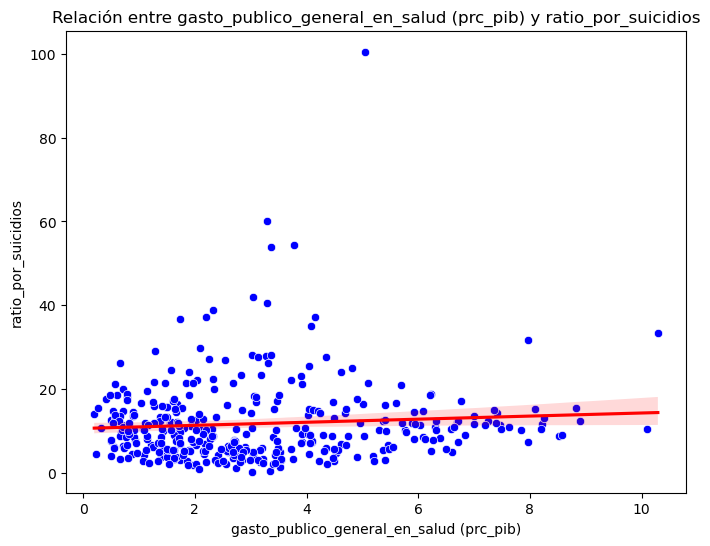

In [834]:
df_corr1 = cruzar_y_graficar(df_phs_decadas, 'gasto_publico_general_en_salud (prc_pib)', df_suicides_decadas, 'ratio_por_suicidios', on='entidad')

### Correlación 2: Gini VS Tasa de vacunación

In [845]:
# Nos aseguramos de que la columna año esté en formato numérico
df_vaccination_paises['año'] = pd.to_numeric(df_vaccination_paises['año'], errors='coerce')

# Creamos la columna década, aplicando la función "asigna_decada"
df_vaccination_paises['decada'] = df_vaccination_paises['año'].apply(asignar_decada)

In [856]:
# Filtrar desde 1990 y quitar filas con NaNs en todas las columnas de vacunas
df_vac_1990s = df_vaccination_paises[df_vaccination_paises['decada'] != 'anterior a 1990'].copy()

# Seleccionamos las columnas de vacunas (todas las columnas numéricas que no sean identificadores)
cols_vacunas = df_vac_1990s.columns.difference(['entidad', 'codigo', 'año', 'decada'])

# Eliminar filas que tengan NaNs en todas las columnas de vacunación
df_vac_1990s = df_vac_1990s.dropna(subset=cols_vacunas, how='all')

# Calcular el promedio de vacunación por fila (ignorando NaNs) y añadirlo como nueva columna
df_vac_1990s['tasa_vacunacion'] = df_vac_1990s[cols_vacunas].mean(axis=1)

# Agrupar por país y década y calcular la media total de vacunación
df_vac_total_media = df_vac_1990s.groupby(['entidad', 'decada'])['tasa_vacunacion'].mean().reset_index()

# Mostrar resultado
df_vac_total_media.head()

entidad decada  tasa_vacunacion
0  Afghanistan  1990s        26.650000
1  Afghanistan  2000s        49.236667
2  Afghanistan  2010s        67.054365
3  Afghanistan  2020s        68.888889
4      Albania  1990s        91.660000

In [857]:
# Nos aseguramos de que la columna año esté en formato numérico
df_desigualdad['año'] = pd.to_numeric(df_desigualdad['año'], errors='coerce')

# Creamos la columna década, aplicando la función "asigna_decada"
df_desigualdad['decada'] = df_desigualdad['año'].apply(asignar_decada)

# Agrupamos por entidad y decada
df_desigualdad_decadas = (
    df_desigualdad
    .groupby(['entidad', 'decada'], as_index=False)['gini']
    .mean()
)


Correlación Pearson entre gini y tasa_vacunacion:
-0.23 (p = 0.0000)


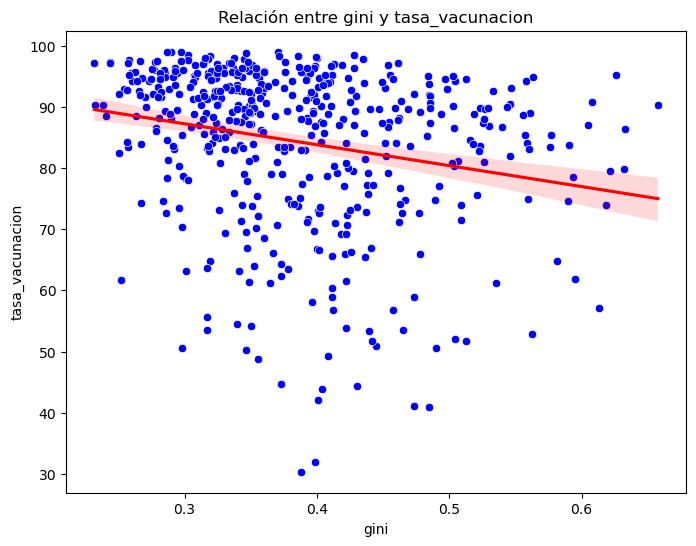

In [859]:
# Para hacer esta correlación, primero debemos calcular la tasa de vacunación
# Lo dejo para más tarde
df_corr2 = cruzar_y_graficar(df_desigualdad_decadas, 'gini', df_vac_total_media, 'tasa_vacunacion', on='entidad')

### Correlación 3: Muerte por Trasntornos maternos VS Gini

In [860]:
# Nos aseguramos de que la columna año esté en formato numérico
df_deaths_paises['año'] = pd.to_numeric(df_deaths_paises['año'], errors='coerce')

# Creamos la columna década, aplicando la función "asigna_decada"
df_deaths_paises['decada'] = df_deaths_paises['año'].apply(asignar_decada)

# Agrupamos por entidad y decada
df_deaths_decadas = (
    df_deaths_paises
    .groupby(['entidad', 'decada'], as_index=False)['transtornos_maternos']
    .mean()
)

In [861]:
# Asegúrate de que la columna año esté en formato numérico
df_desigualdad['año'] = pd.to_numeric(df_desigualdad['año'], errors='coerce')

# Creamos la columna década, aplicando la función "asigna_decada"
df_desigualdad['decada'] = df_desigualdad['año'].apply(asignar_decada)



Correlación Pearson entre gini y transtornos_maternos:
0.00 (p = 0.9354)


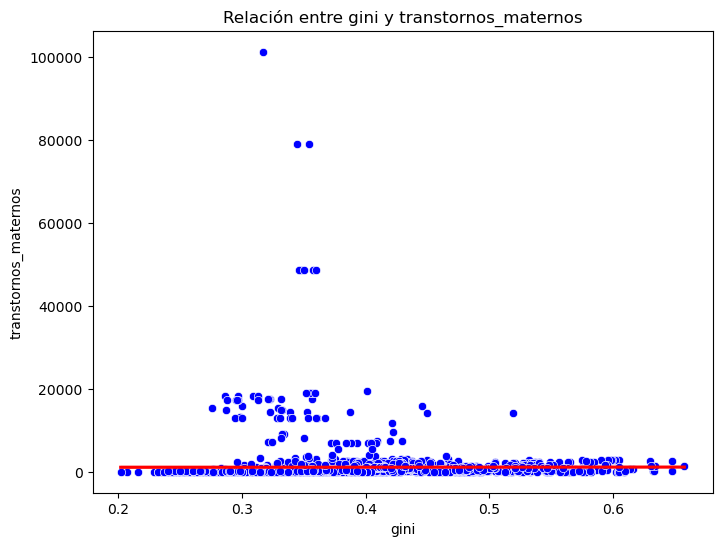

In [862]:
df_corr3 = cruzar_y_graficar(df_desigualdad, 'gini', df_deaths_decadas, 'transtornos_maternos', on='entidad')
